In [1]:
rm(list=ls())
require(tidyr)
require(ggplot2)
require(coda)

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: coda


# Estimate S using wf simulations

In [2]:
##wf simulations to just s values and simulated f2s, can input multiple ne values with multiple generations
wfs_bs_simp=function(x, ne=c(598), gen=1, smin=-1, smax=1){
    ##determine direction of maf change  to determine outliers
    f2s=replicate(100, mapply(wfs_byf1_variablene_s,  x[,2], MoreArgs = list(gen=gen, ne=ne, h=0.5, smin=-1, smax=1)))
    f2s=as.data.frame(f2s)
    snp=x[1,1]
    f2s$SNP=snp
    out=f2s
return(out)

}

# gen: the number of generations to simulate
# ne: the effective population size (in number of alleles) for each sampled generation; length(n) == gen
wfs_byf1_variablene_s <- function(f1=0.5, gen=2, ne=c(1000,10), h=0.5, smin=-1, smax=1){ 
#using bootstrapped values as f1 and f2. comparing f2 to simulated f2s. 
	# choose parameters for this simulation
		s <- runif(1, min=smin, max=smax) # selection coefficient
    ##for some reason angsd gave some bootstrapped f1s that are > 1...so round to 1. 
    if(f1>1) f1=round(f1)
	#print(paste(f1, s, thisne))
	
	p <- f1 # current allele frequency
	waa <- 1+s # relative fitness of genotype AA
	wab <- 1+s*h
	wbb <- 1
	for(i in 1:gen){
		x <- (waa*p^2 + wab*p*(1-p))/(waa*p^2 + wab*2*p*(1-p) + wbb*(1-p)^2) # probability of sampling allele A, given selection
		p <- rbinom(1,ne[i],x)/ne[i]
		#print(paste(x,p))
	}
	f2 <- p
	
	# return values
	out = c(f1,f2, s)
        return(out)
}


In [3]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:500]=simfull$count[1:500] + 1
    }
    out=c(simfull, f2bs)
return(out)
}


In [4]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    #print(NROW(f2bsvalues))
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        #print(diff)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }
    simfull$count=as.numeric(as.character(simfull$count))
   # simfull$f2bs=rep(as.vector(f2bsvalues$MAF_E),len=10001)
    out=c(simfull)
return(out)
}

In [5]:
#only need to do this for significant snps
comPvaluesChrNJNY50sig_out=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv", row.names=1)

In [6]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NJNY50_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs")
nj_files = list.files( pattern="NJ_")
NJ=lapply(nj_files, read.table, header=T)

In [7]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/mafs/NYUnoout_Bootstrapped_mafs/All_bootstrapped_mafs/Combined_mafs/")
ny_files = list.files( pattern="NY_")
NY=lapply(ny_files, read.table, header=T)

In [8]:
NJ_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NJ)
NY_sig=Filter(function(x) x[1,1] %in% comPvaluesChrNJNY50sig_out$SNP, NY)

In [9]:
lapply(NY_sig, `[`, 2, )

[[1]]
    SNP    MAF_U   MAF_E nInd_U nInd_E
2 11932 0.335778 0.78819     10     12

[[2]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 1241213 0.524043 0.743304     13     10

[[3]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 1396110 0.807491 0.129724     15     13

[[4]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 1484586 0.488114 3e-06      9     12

[[5]]
       SNP    MAF_U    MAF_E nInd_U nInd_E
2 14993622 0.860941 0.071348     12     13

[[6]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 1661413 0.160362 0.790855     10     11

[[7]]
       SNP    MAF_U MAF_E nInd_U nInd_E
2 16839644 0.722371 2e-06      8     11

[[8]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 173352 0.714167 0.038804     12     17

[[9]]
     SNP    MAF_U MAF_E nInd_U nInd_E
2 180278 0.257796 4e-06     10     14

[[10]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 1956978 0.407538 6e-06     12      9

[[11]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2043530 0.161628 0.815434      9     13

[[12]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2056629 0.414411 0.112173     12     12

[[13]]
      SNP   MAF_U MAF_E nInd_U nInd_E
2 2091046 0.85954 7e-06     11     10

[[14]]
       SNP   MAF_U   MAF_E nInd_U nInd_E
2 22649683 0.38056 0.85899     10     14

[[15]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2414078 0.090629 0.564729     10     13

[[16]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2444879 0.521957 0.756716     12      8

[[17]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2575249 0.218167 0.693099     11     12

[[18]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2586279 0.999997 0.375717      7     11

[[19]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 293372 0.518091 0.999996     15     10

[[20]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 2943933 0.077293 0.665776      9     12

[[21]]
      SNP    MAF_U   MAF_E nInd_U nInd_E
2 2966433 0.648823 0.16268     13      8

[[22]]
       SNP MAF_U    MAF_E nInd_U nInd_E
2 29962249 2e-06 0.636289      7     11

[[23]]
     SNP    MAF_U MAF_E nInd_U nInd_E
2 300331 0.378634 4e-06     10      8

[[24]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 3065399 4e-06 0.999994      8     11

[[25]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 3229647 1e-06 0.696138      8     13

[[26]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 3311579 0.728755 0.149672      8     11

[[27]]
      SNP    MAF_U   MAF_E nInd_U nInd_E
2 3445677 0.917389 0.18439      8     11

[[28]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 3508435 0.511904 0.761442      7      9

[[29]]
      SNP   MAF_U    MAF_E nInd_U nInd_E
2 3522450 0.05345 0.675028     11      9

[[30]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 3561000 5e-06 0.263829      8      9

[[31]]
     SNP MAF_U   MAF_E nInd_U nInd_E
2 365354 2e-06 0.56722      7     10

[[32]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 384336 0.749564 0.374826      6     12

[[33]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 3921142 0.538423 0.084432     11     11

[[34]]
      SNP    MAF_U    MAF_E nInd_U nInd_E
2 4091453 0.773352 0.135838      9     12

[[35]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 4124241 0.770467 5e-06     11      8

[[36]]
      SNP    MAF_U MAF_E nInd_U nInd_E
2 4401152 0.541433 3e-06     10      9

[[37]]
       SNP    MAF_U MAF_E nInd_U nInd_E
2 46534125 0.440553 3e-06     12     10

[[38]]
     SNP MAF_U    MAF_E nInd_U nInd_E
2 496908 1e-06 0.843932      9     10

[[39]]
     SNP   MAF_U    MAF_E nInd_U nInd_E
2 514067 0.67832 0.149278     11     12

[[40]]
     SNP    MAF_U   MAF_E nInd_U nInd_E
2 525210 0.241261 0.53918     10     11

[[41]]
      SNP MAF_U    MAF_E nInd_U nInd_E
2 5556309 6e-06 0.492978      7     13

[[42]]
     SNP    MAF_U MAF_E nInd_U nInd_E
2 593841 0.694377 3e-06     12     11

[[43]]
    SNP    MAF_U    MAF_E nInd_U nInd_E
2 60325 0.731741 0.081448      9     10

[[44]]
    SNP    MAF_U    MAF_E nInd_U nInd_E
2 60326 0.663131 0.335531      9     10

[[45]]
     SNP    MAF_U    MAF_E nInd_U nInd_E
2 612532 0.203538 0.664194     13     13

[[46]]
     SNP

In [10]:
head(NY_sig[7])

[[1]]
         SNP    MAF_U    MAF_E nInd_U nInd_E
1   16839644 0.642422 0.083863      8     11
2   16839644 0.722371 0.000002      8     11
3   16839644 0.751581 0.153481      8     11
4   16839644 0.999996 0.314141      8     11
5   16839644 0.736438 0.077841      8     11
6   16839644 0.725314 0.165657      8     11
7   16839644 0.793464 0.096927      8     11
8   16839644 0.834622 0.089101      8     11
9   16839644 0.673634 0.263007      8     11
10  16839644 0.909517 0.388060      8     11
11  16839644 0.889931 0.089101      8     11
12  16839644 0.648761 0.168434      8     11
13  16839644 0.783922 0.267807      8     11
14  16839644 0.919679 0.159507      8     11
15  16839644 0.916426 0.177582      8     11
16  16839644 0.916198 0.360629      8     11
17  16839644 0.912650 0.257959      8     11
18  16839644 0.575379 0.166037      8     11
19  16839644 0.816450 0.079012      8     11
20  16839644 0.581038 0.286320      8     11
21  16839644 0.590367 0.168907      8     11
22  16839644 0.838155 0.071255      8     11
23  16839644 0.999998 0.463346      8     11
24  16839644 0.756918 0.072567      8     11
25  16839644 0.999999 0.403661      8     11
26  16839644 0.999998 0.150931      8     11
27  16839644 0.742416 0.204421      8     11
28  16839644 0.517578 0.178564      8     11
29  16839644 0.715513 0.185115      8     11
30  16839644 0.917976 0.272366      8     11
31  16839644 0.771052 0.169386      8     11
32  16839644 0.769435 0.156468      8     11
33  16839644 0.850198 0.265493      8     11
34  16839644 0.823730 0.159375      8     11
35  16839644 0.916426 0.165658      8     11
36  16839644 0.905128 0.079195      8     11
37  16839644 0.815238 0.159375      8     11
38  16839644 0.914338 0.249209      8     11
39  16839644 0.802294 0.161892      8     11
40  16839644 0.777856 0.073595      8     11
41  16839644 0.662103 0.156938      8     11
42  16839644 0.732700 0.548578      8     11
43  16839644 0.811972 0.160189      8     11
44  16839644 0.667850 0.000002      8     11
45  16839644 0.695184 0.403666      8     11
46  16839644 0.999997 0.138635      8     11
47  16839644 0.914338 0.000003      8     11
48  16839644 0.905129 0.162671      8     11
49  16839644 0.914580 0.077682      8     11
50  16839644 0.912651 0.156265      8     11
51  16839644 0.722379 0.283723      8     11
52  16839644 0.912650 0.071382      8     11
53  16839644 0.798669 0.000002      8     11
54  16839644 0.816675 0.196350      8     11
55  16839644 0.830506 0.178473      8     11
56  16839644 0.627458 0.148076      8     11
57  16839644 0.841537 0.162671      8     11
58  16839644 0.783512 0.156468      8     11
59  16839644 0.642422 0.083863      8     11
60  16839644 0.909232 0.343176      8     11
61  16839644 0.794947 0.067813      8     11
62  16839644 0.906606 0.263006      8     11
63  16839644 0.825126 0.497393      8     11
64  16839644 0.496880 0.074982      8     11
65  16839644 0.890432 0.165350      8     11
66  16839644 0.999998 0.070119      8     11
67  16839644 0.690819 0.395878      8     11
68  16839644 0.820994 0.161942      8     11
69  16839644 0.758002 0.143189      8     11
70  16839644 0.922698 0.281995      8     11
71  16839644 0.999996 0.271163      8     11
72  16839644 0.610121 0.071285      8     11
73  16839644 0.903121 0.000001      8     11
74  16839644 0.898476 0.168588      8     11
75  16839644 0.529401 0.000002      8     11
76  16839644 0.916198 0.063626      8     11
77  16839644 0.653531 0.185018      8     11
78  16839644 0.999999 0.068994      8     11
79  16839644 0.638413 0.079179      8     11
80  16839644 0.917976 0.175776      8     11
81  16839644 0.999998 0.342266      8     11
82  16839644 0.772950 0.068879      8     11
83  16839644 0.904629 0.074956      8     11
84  16839644 0.717374 0.067803      8     11
85  16839644 0.803771 0.079195      8     11
86  16839644 0.999999 0.067813      8     11
87  16839644 0.642408 0.178564      8     11
88  16839644 0.999998 0.174712    

In [11]:
NJ_f2s=lapply(NJ_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NJ_f2s=lapply(NJ_f2s, t)
NJ_f2s=lapply(NJ_f2s, as.data.frame)
tNJ_f2s=lapply(NJ_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [12]:
lapply(tNJ_f2s, `[`, 2, )

[[1]]
      V1 V2        V3   SNP
V2 4e-06  0 -0.827061 11932

[[2]]
         V1         V2         V3     SNP
V2 0.123058 0.09121622 -0.2246203 1241213

[[3]]
         V1        V2        V3     SNP
V2 0.511393 0.5540541 0.1489207 1396110

[[4]]
         V1        V2         V3     SNP
V2 0.922377 0.8885135 -0.4524535 1484586

[[5]]
         V1       V2         V3      SNP
V2 0.729449 0.597973 -0.5484972 14993622

[[6]]
         V1         V2         V3     SNP
V2 0.072784 0.07432432 -0.1041644 1661413

[[7]]
         V1        V2        V3      SNP
V2 0.573947 0.7466216 0.5735004 16839644

[[8]]
         V1        V2         V3    SNP
V2 0.440419 0.1925676 -0.7644266 173352

[[9]]
        V1        V2         V3    SNP
V2 0.66369 0.5067568 -0.3752136 180278

[[10]]
         V1        V2         V3     SNP
V2 0.600015 0.3851351 -0.5054304 1956978

[[11]]
      V1 V2         V3     SNP
V2 5e-06  0 0.06971157 2043530

[[12]]
         V1 V2        V3     SNP
V2 0.999995  1 0.2612184 2056629

[[13]]
         V1        V2        V3     SNP
V2 0.865085 0.9155405 0.4806814 2091046

[[14]]
      V1 V2        V3      SNP
V2 6e-06  0 0.9598642 22649683

[[15]]
         V1         V2         V3     SNP
V2 0.100268 0.08108108 0.08510882 2414078

[[16]]
         V1        V2        V3     SNP
V2 0.080374 0.0777027 0.1174221 2444879

[[17]]
      V1 V2        V3     SNP
V2 2e-06  0 0.7075629 2575249

[[18]]
        V1        V2         V3     SNP
V2 0.37799 0.3006757 -0.5134076 2586279

[[19]]
      V1 V2        V3    SNP
V2 7e-06  0 0.6276757 293372

[[20]]
      V1 V2        V3     SNP
V2 5e-06  0 0.4258726 2943933

[[21]]
        V1        V2        V3     SNP
V2 0.82407 0.8614865 0.2872689 2966433

[[22]]
         V1        V2         V3      SNP
V2 0.198156 0.1655405 -0.2666171 29962249

[[23]]
         V1        V2         V3    SNP
V2 0.774022 0.3513514 -0.8533292 300331

[[24]]
      V1 V2        V3     SNP
V2 5e-06  0 0.3578478 3065399

[[25]]
         V1        V2        V3     SNP
V2 0.290021 0.3243243 0.2668232 3229647

[[26]]
        V1        V2        V3     SNP
V2 0.91776 0.6317568 -0.720616 3311579

[[27]]
         V1        V2        V3     SNP
V2 0.462924 0.1418919 -0.855041 3445677

[[28]]
         V1        V2          V3     SNP
V2 0.235618 0.2297297 0.009250741 3508435

[[29]]
         V1         V2         V3     SNP
V2 0.069174 0.04391892 -0.6732496 3522450

[[30]]
      V1 V2         V3     SNP
V2 2e-06  0 0.05157342 3561000

[[31]]
      V1 V2         V3    SNP
V2 8e-06  0 -0.1759856 365354

[[32]]
         V1        V2         V3    SNP
V2 0.772591 0.6621622 -0.3321374 384336

[[33]]
         V1        V2         V3     SNP
V2 0.922707 0.4898649 -0.8966534 3921142

[[34]]
         V1       V2         V3     SNP
V2 0.898162 0.597973 -0.7844052 4091453

[[35]]
         V1        V2        V3     SNP
V2 0.701939 0.8006757 0.5852099 4124241

[[36]]
         V1        V2         V3     SNP
V2 0.762847 0.4594595 -0.7311229 4401152

[[37]]
         V1        V2        V3      SNP
V2 0.628173 0.7162162 0.3939759 46534125

[[38]]
         V1    V2         V3    SNP
V2 0.231982 0.125 -0.6338968 496908

[[39]]
         V1        V2         V3    SNP
V2 0.612497 0.3277027 -0.7107812 514067

[[40]]
         V1         V2        V3    SNP
V2 0.055965 0.08108108 0.7912993 525210

[[41]]
      V1 V2        V3     SNP
V2 3e-06  0 0.3733829 5556309

[[42]]
         V1       V2        V3    SNP
V2 0.692663 0.777027 0.5982232 593841

[[43]]
        V1        V2        V3   SNP
V2 0.68422 0.7837838 0.5093108 60325

[[44]]
         V1        V2        V3   SNP
V2 0.800492 0.8581081 0.9681095 60326

[[45]]
      V1 V2        V3    SNP
V2 3e-06  0 0.2577438 612532

[[46]]
        V1        V2        V3    SNP
V2 0.16738 0.2331081 0.7185679 617822

[[47]]
         V1        V2        V3    SNP
V2 0.622693 0.7533784 0.8279479 626424

[[48]]
         V1        V2        V3    SNP
V2 0.085359 0.1114865 0.6366822 665407

[[49]]
         V1 

In [13]:
#f1s and simulated f2s for 2056629
head(tNJ_f2s[12])

[[1]]
                 V1           V2            V3     SNP
V1     9.999970e-01 1.000000e+00 -3.522838e-01 2056629
V2     9.999950e-01 1.000000e+00  2.612184e-01 2056629
V3     9.999950e-01 1.000000e+00  1.439186e-01 2056629
V4     9.999920e-01 1.000000e+00 -2.100281e-01 2056629
V5     9.999970e-01 1.000000e+00 -2.241300e-01 2056629
V6     9.999980e-01 1.000000e+00  5.938930e-01 2056629
V7     9.999980e-01 1.000000e+00 -7.848942e-02 2056629
V8     9.999970e-01 1.000000e+00  1.374358e-01 2056629
V9     9.999990e-01 1.000000e+00  3.760883e-01 2056629
V10    9.999970e-01 1.000000e+00 -8.668148e-01 2056629
V11    9.999960e-01 1.000000e+00 -1.464262e-01 2056629
V12    9.999980e-01 1.000000e+00  5.168948e-01 2056629
V13    9.999960e-01 1.000000e+00 -5.036516e-01 2056629
V14    9.999960e-01 1.000000e+00 -1.339520e-02 2056629
V15    9.999970e-01 1.000000e+00 -5.603651e-01 2056629
V16    9.999980e-01 1.000000e+00 -7.004731e-01 2056629
V17    9.999970e-01 1.000000e+00  6.967257e-01 2056629
V18    9.999990e-01 1.000000e+00  3.914864e-01 2056629
V19    9.999990e-01 1.000000e+00 -2.102723e-01 2056629
V20    9.999970e-01 1.000000e+00 -4.019930e-01 2056629
V21    9.999970e-01 1.000000e+00 -1.696210e-01 2056629
V22    9.999980e-01 1.000000e+00  6.789362e-01 2056629
V23    9.999990e-01 1.000000e+00  8.763931e-01 2056629
V24    9.999990e-01 1.000000e+00 -1.323234e-01 2056629
V25    9.999980e-01 1.000000e+00  2.179669e-01 2056629
V26    9.999960e-01 1.000000e+00 -6.095625e-01 2056629
V27    9.999980e-01 1.000000e+00 -4.230011e-01 2056629
V28    9.999960e-01 1.000000e+00  8.406195e-01 2056629
V29    9.999960e-01 1.000000e+00 -6.512576e-01 2056629
V30    9.999970e-01 1.000000e+00 -4.439625e-01 2056629
V31    9.999970e-01 1.000000e+00  8.245746e-01 2056629
V32    9.999990e-01 1.000000e+00 -3.348399e-02 2056629
V33    9.999980e-01 1.000000e+00  7.415411e-01 2056629
V34    9.999950e-01 1.000000e+00 -3.649473e-01 2056629
V35    9.999970e-01 1.000000e+00 -5.727902e-01 2056629
V36    9.999990e-01 1.000000e+00  3.525953e-01 2056629
V37    9.999970e-01 1.000000e+00 -5.237416e-01 2056629
V38    9.999970e-01 1.000000e+00  9.874431e-01 2056629
V39    9.999970e-01 1.000000e+00 -4.116183e-01 2056629
V40    9.999970e-01 1.000000e+00 -7.031113e-01 2056629
V41    9.999990e-01 1.000000e+00  5.301609e-01 2056629
V42    9.999920e-01 1.000000e+00 -4.856065e-01 2056629
V43    9.999960e-01 1.000000e+00 -7.575594e-01 2056629
V44    9.999980e-01 1.000000e+00  1.669934e-01 2056629
V45    9.999960e-01 1.000000e+00 -2.865248e-01 2056629
V46    9.999960e-01 1.000000e+00 -6.770209e-01 2056629
V47    9.999990e-01 1.000000e+00 -3.892192e-01 2056629
V48    9.999980e-01 1.000000e+00  4.005543e-01 2056629
V49    9.999980e-01 1.000000e+00  1.645127e-01 2056629
V50    9.999980e-01 1.000000e+00  6.002342e-01 2056629
V51    9.999960e-01 1.000000e+00  4.485246e-01 2056629
V52    9.999980e-01 1.000000e+00 -8.553777e-01 2056629
V53    9.999970e-01 1.000000e+00 -7.041620e-01 2056629
V54    9.999960e-01 1.000000e+00  5.130930e-01 2056629
V55    9.999960e-01 1.000000e+00 -2.362625e-01 2056629
V56    9.999980e-01 1.000000e+00  3.622116e-01 2056629
V57    9.999970e-01 1.000000e+00  3.469594e-01 2056629
V58    9.999950e-01 1.000000e+00  5.644174e-01 2056629
V59    9.999970e-01 1.000000e+00  4.662578e-01 2056629
V60    9.999970e-01 1.000000e+00 -3.309781e-01 2056629
V61    9.999960e-01 1.000000e+00  9.083924e-01 2056629
V62    9.999920e-01 1.000000e+00 -3.582221e-02 2056629
V63    9.999960e-01 1.000000e+00  4.133325e-01 2056629
V64    9.999980e-01 1.000000e+00 -4.403169e-01 2056629
V65    9.999980e-01 1.000000e+00  3.425784e-01 2056629
V66    9.999980e-01 1.000000e+00  7.949541e-01 2056629
V67    9.999990e-01 1.000000e+00 -9.758851e-01 2056629
V68    9.999960e-01 1.000000e+00  1.089521e-02 2056629
V69    9.999980e-01 1.000000e+00  4.232514e-01 2056629
V70    9.999990e-01 1.000000e+00 -5.852440e-01 2056629
V71    9.999970e-01 1.000000e+00 -2.776121e-01 2056629
V72    9.999960e-01 1.000000e+00  

In [14]:
#simulated f2s for SNp 11932
#head(tNJ_f2scount[1])

In [15]:
NY_f2s=lapply(NY_sig, wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [16]:
#Add count column and count up number of times a simulated f2 is in the top 1k closest to a given bootstrapped f2. 
NY_f2scount=mapply(wfs_bs_s_count, NY_sig, tNY_f2s, SIMPLIFY=FALSE)
NJ_f2scount=mapply(wfs_bs_s_count, NJ_sig, tNJ_f2s, SIMPLIFY=FALSE)

In [17]:
#sample based on count data produced to get 1000 s values 
sNJ=lapply(NJ_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})
sNY=lapply(NY_f2scount, function(x){sample(x$V3, 1000, replace = FALSE, prob = x$count)})

Doesnt work when f1 is 0 or 1. 

In [18]:
max(sNY[[7]])


[1] 0.2229987

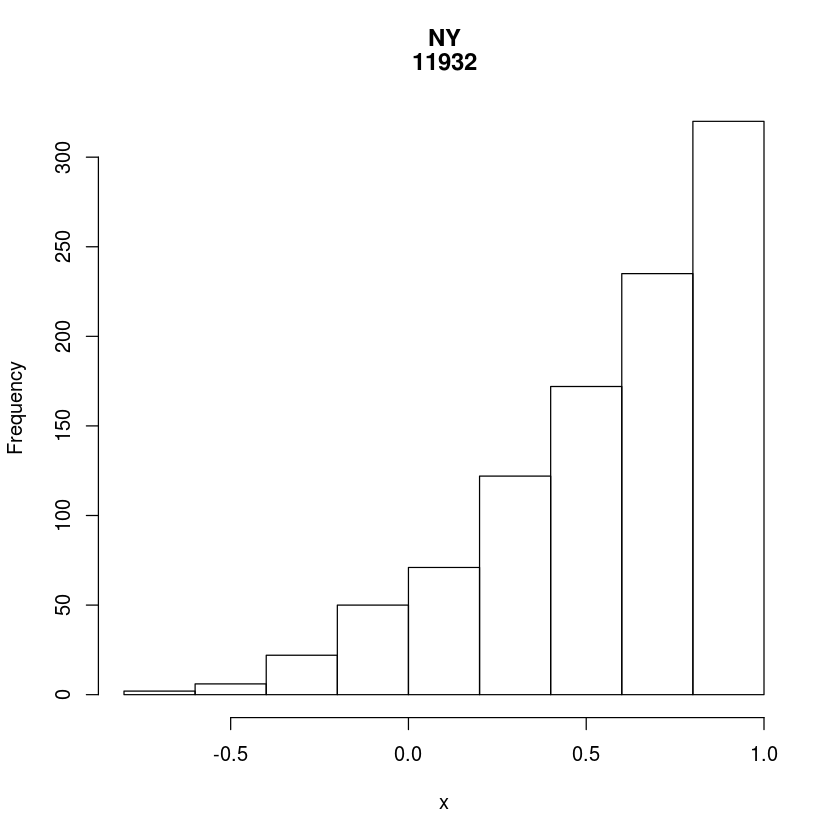

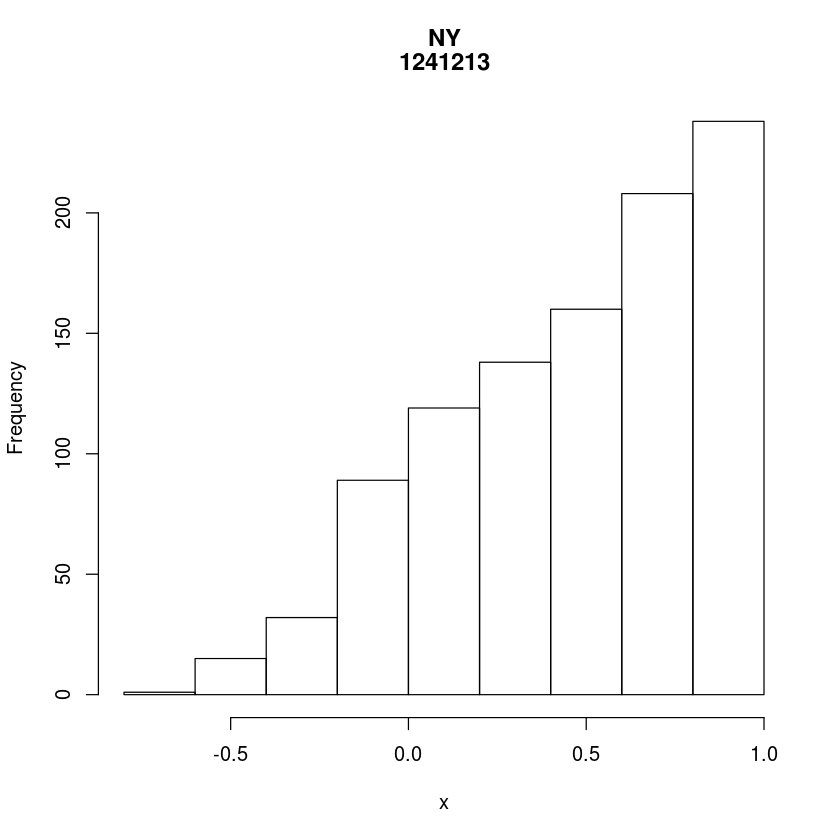

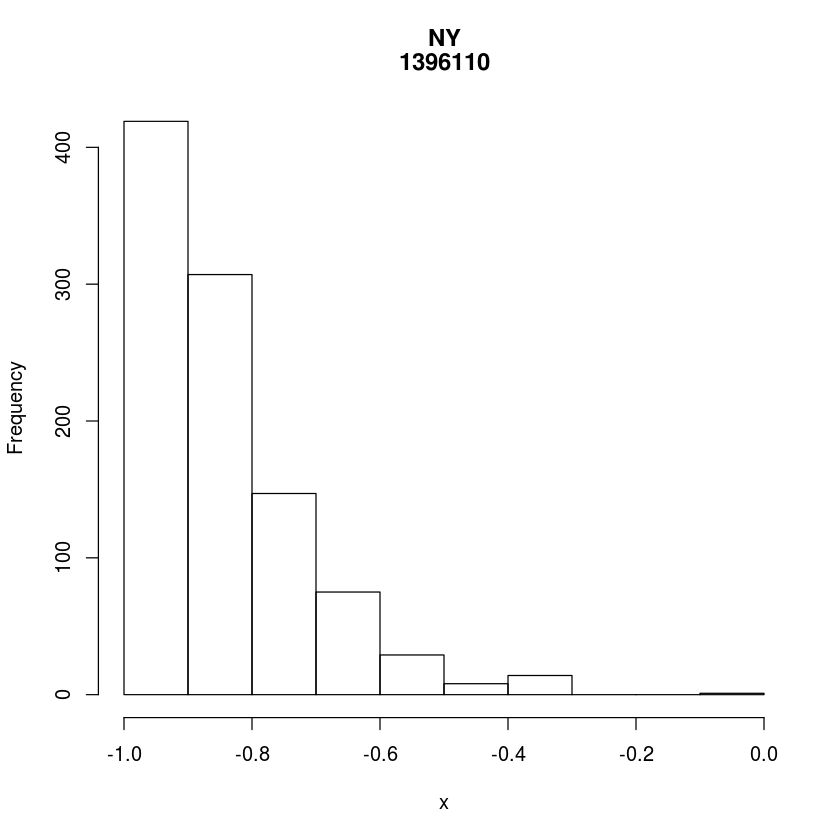

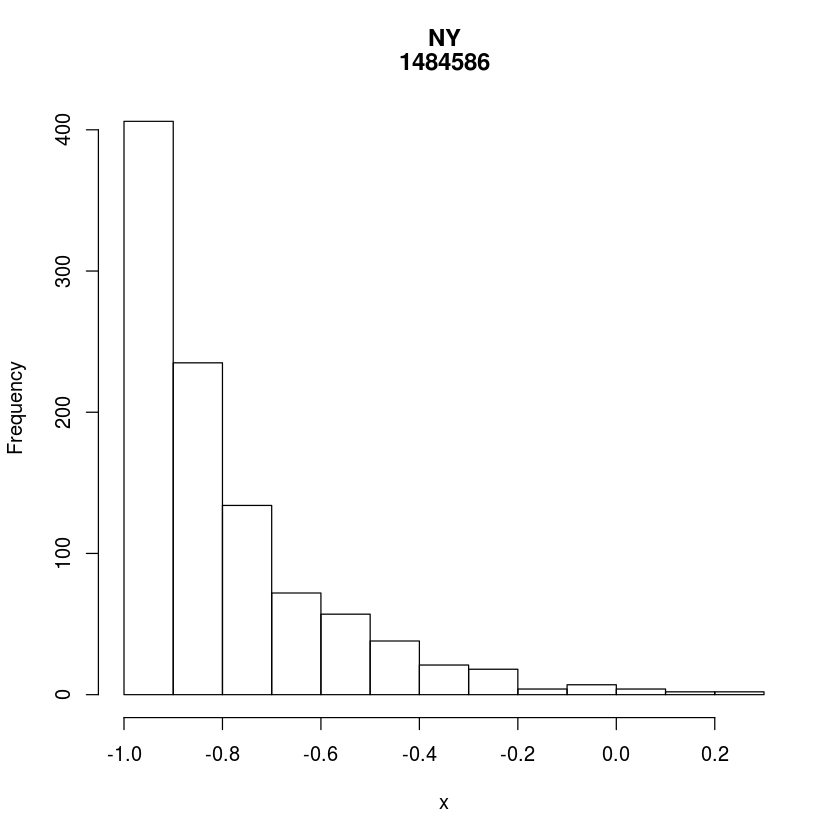

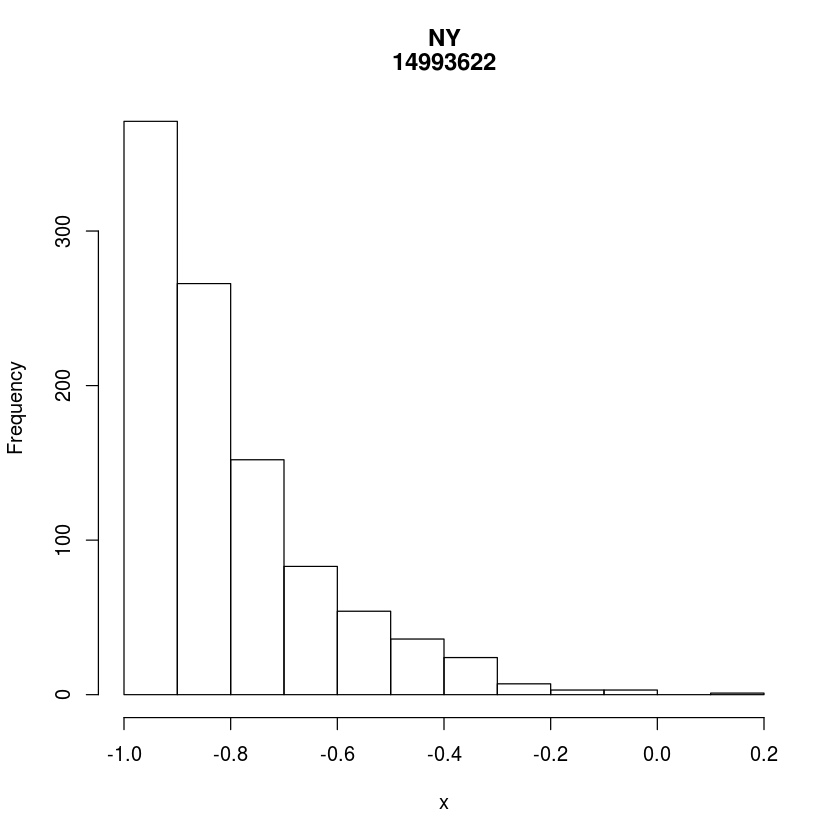

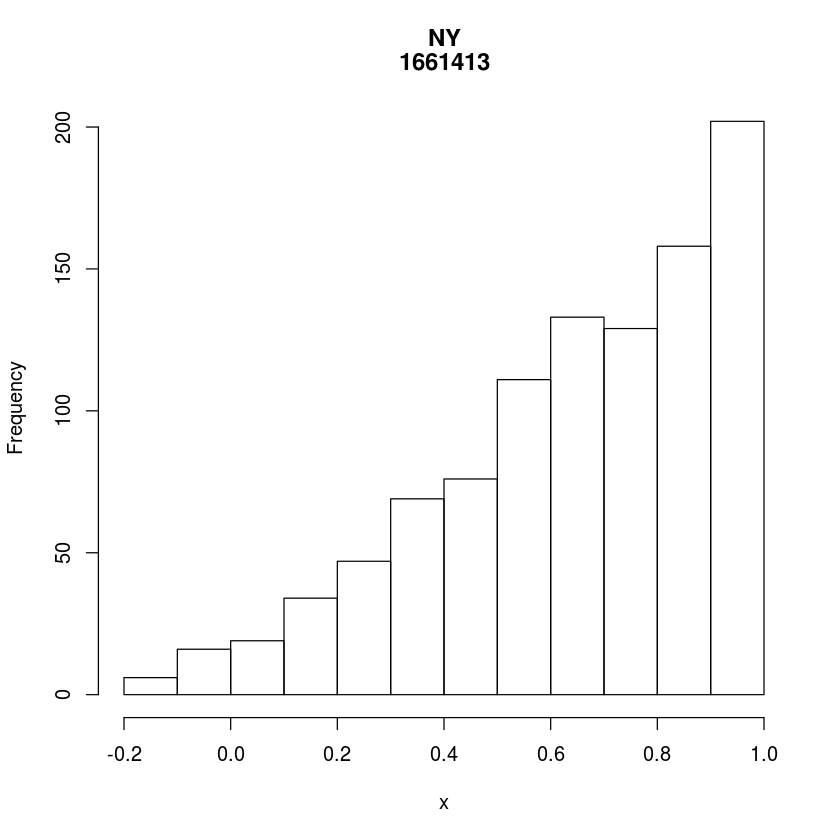

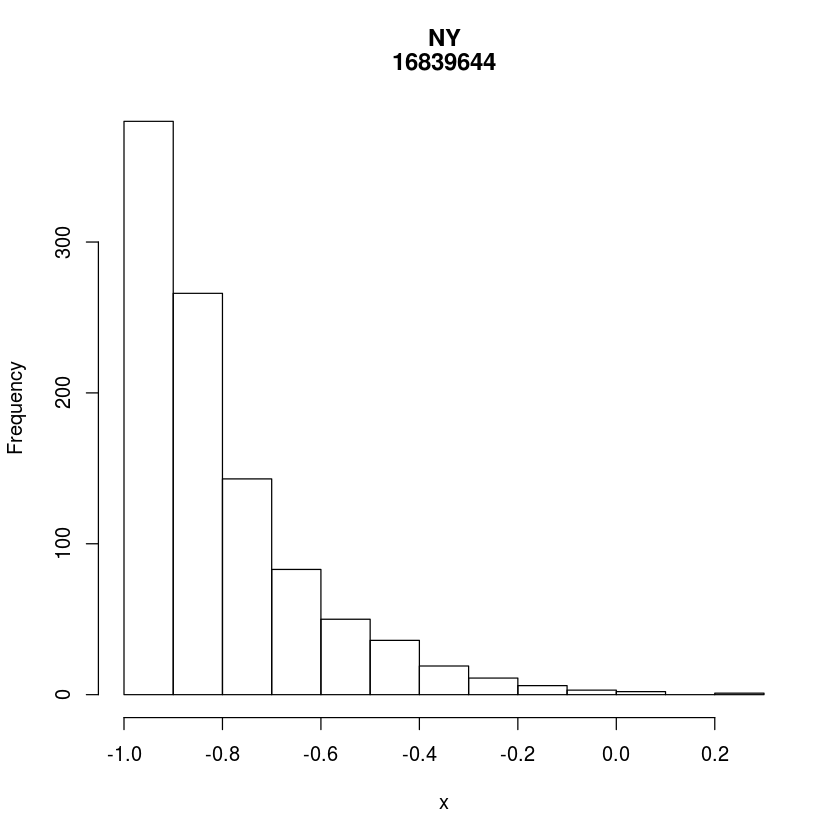

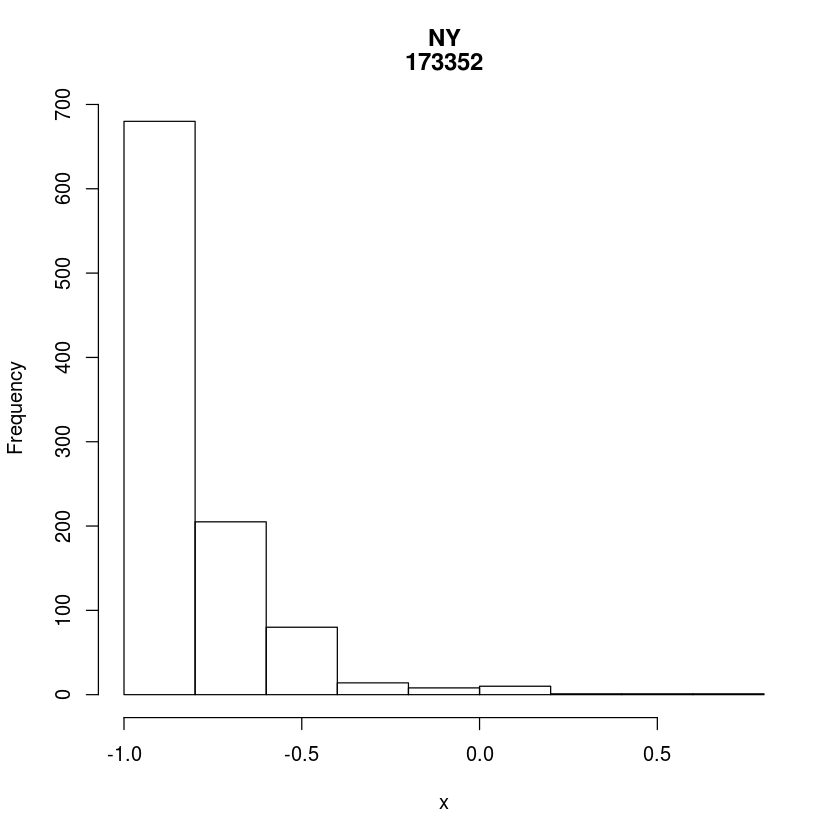

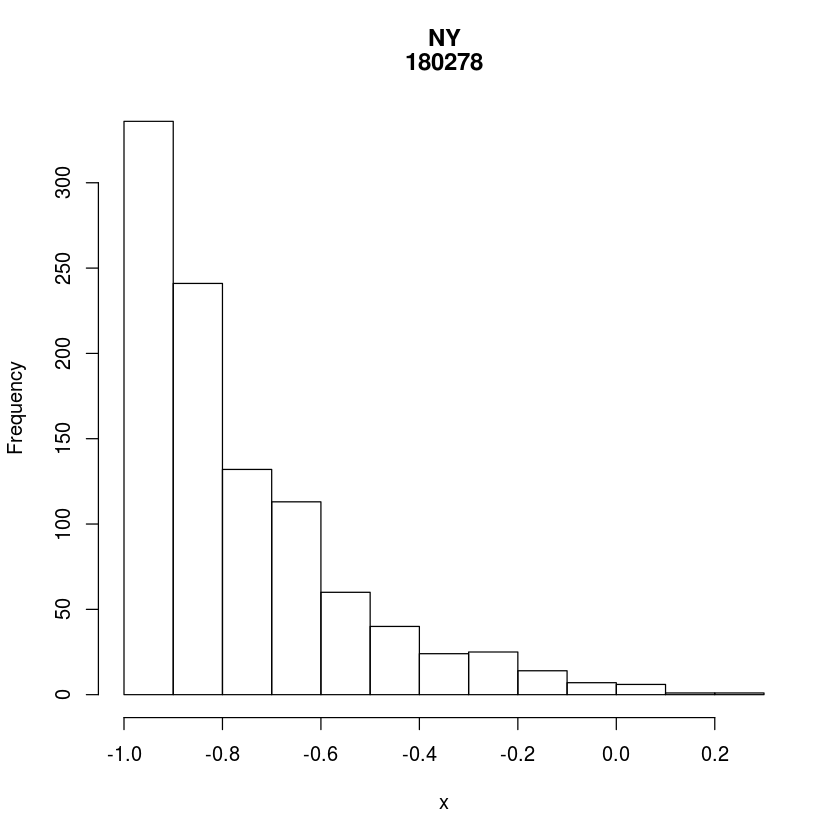

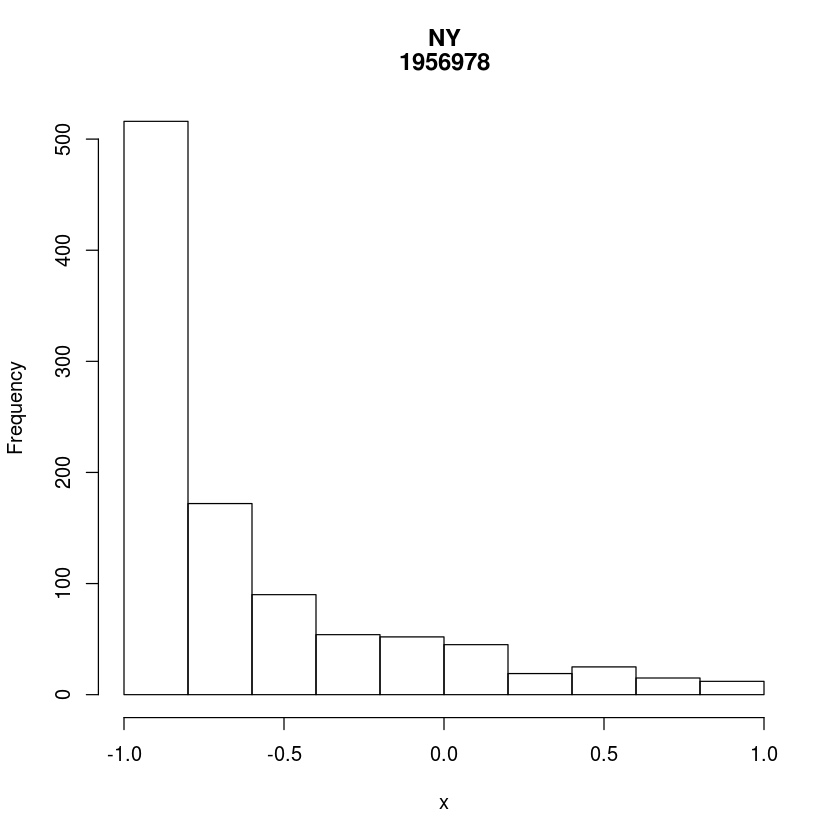

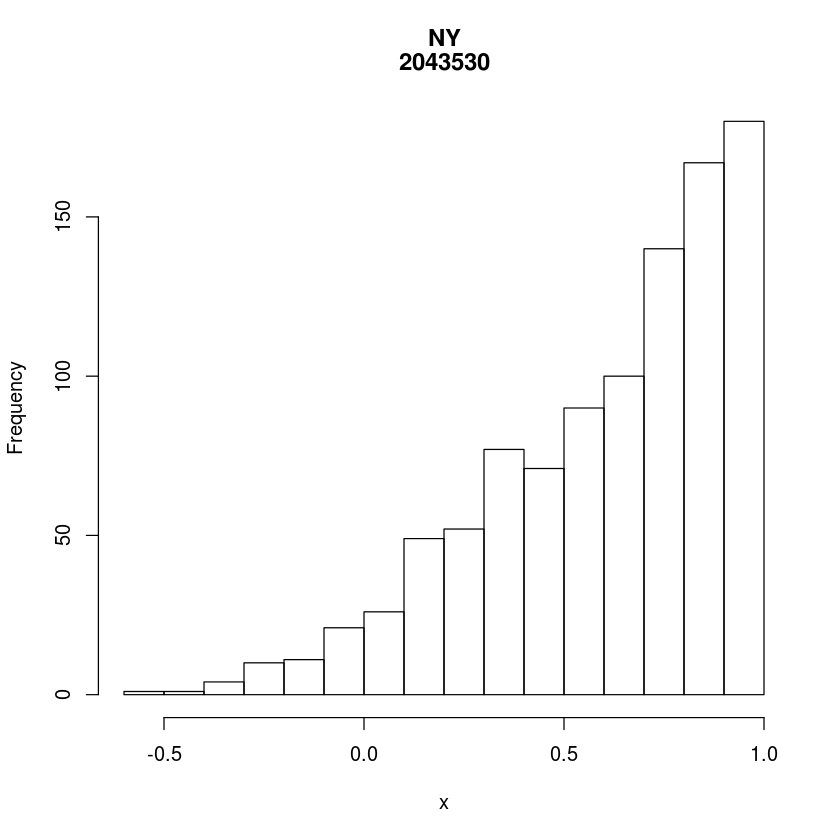

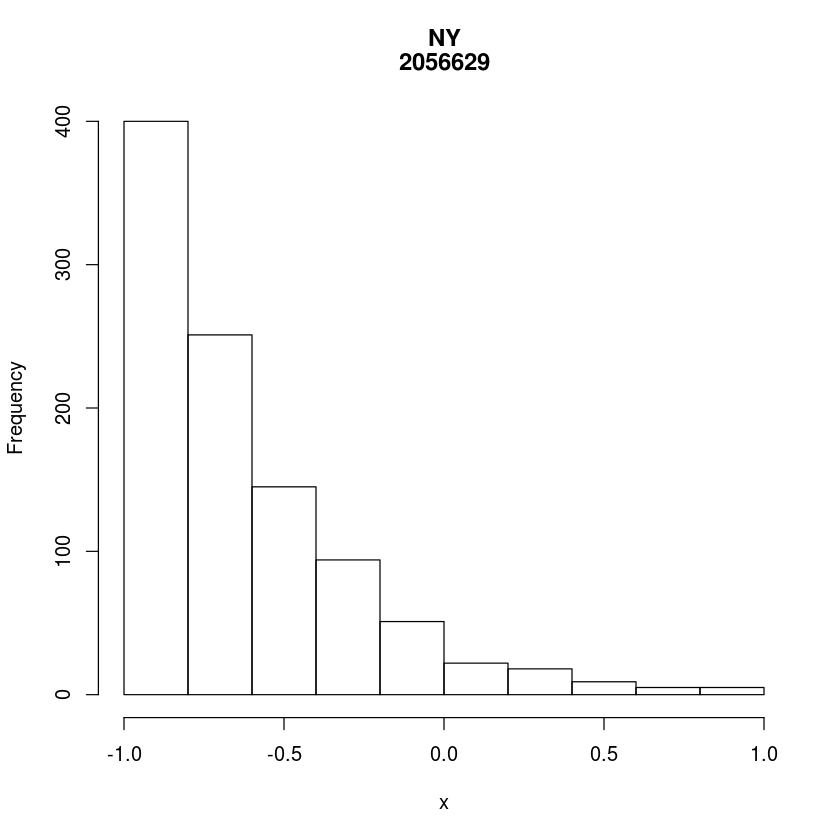

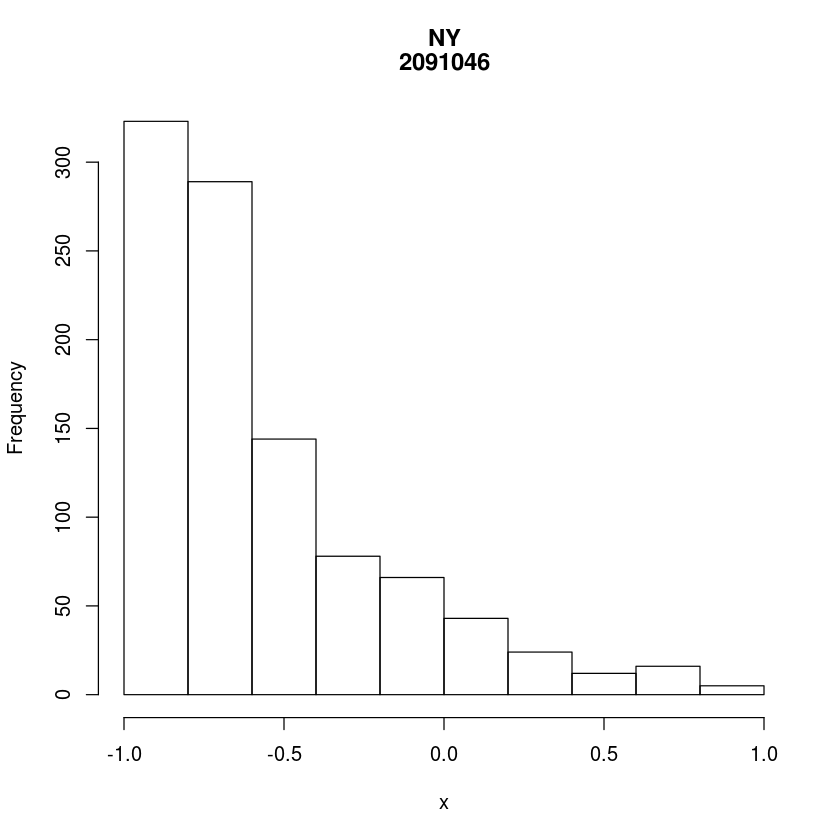

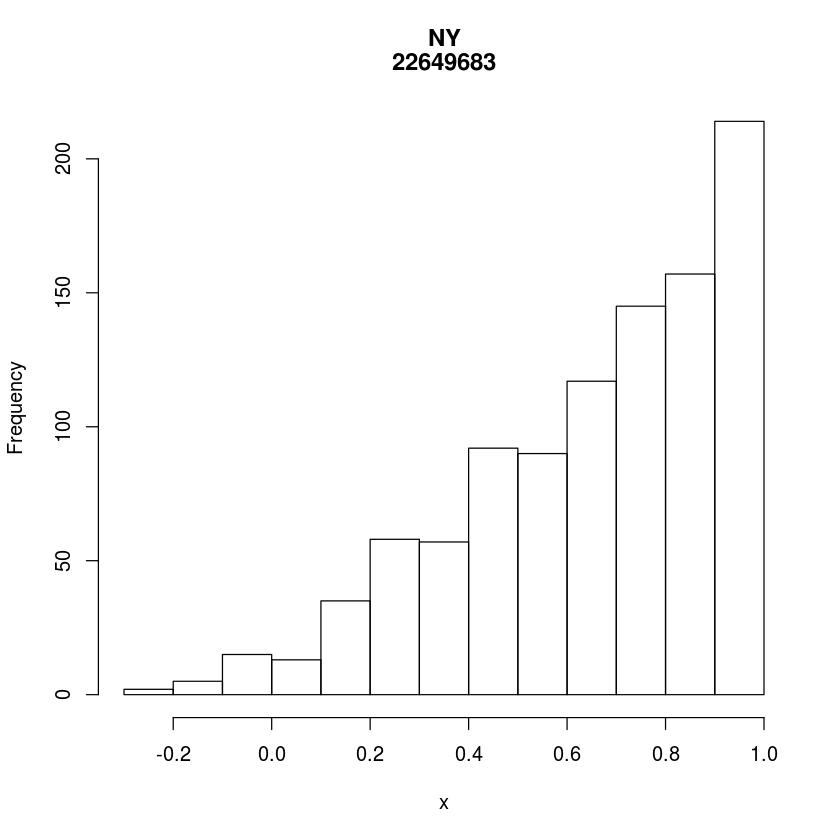

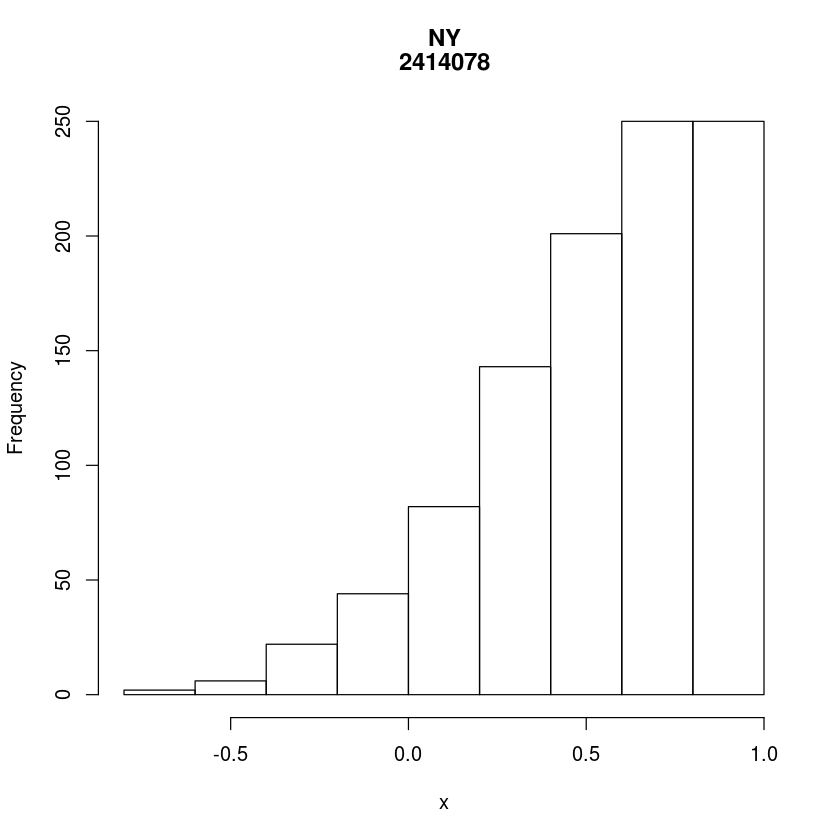

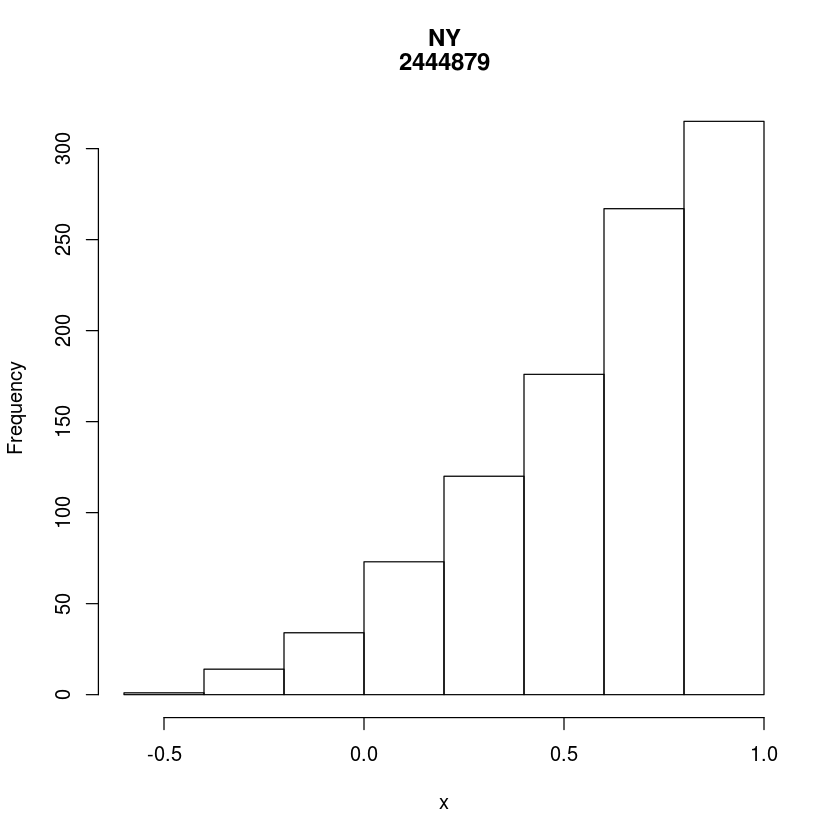

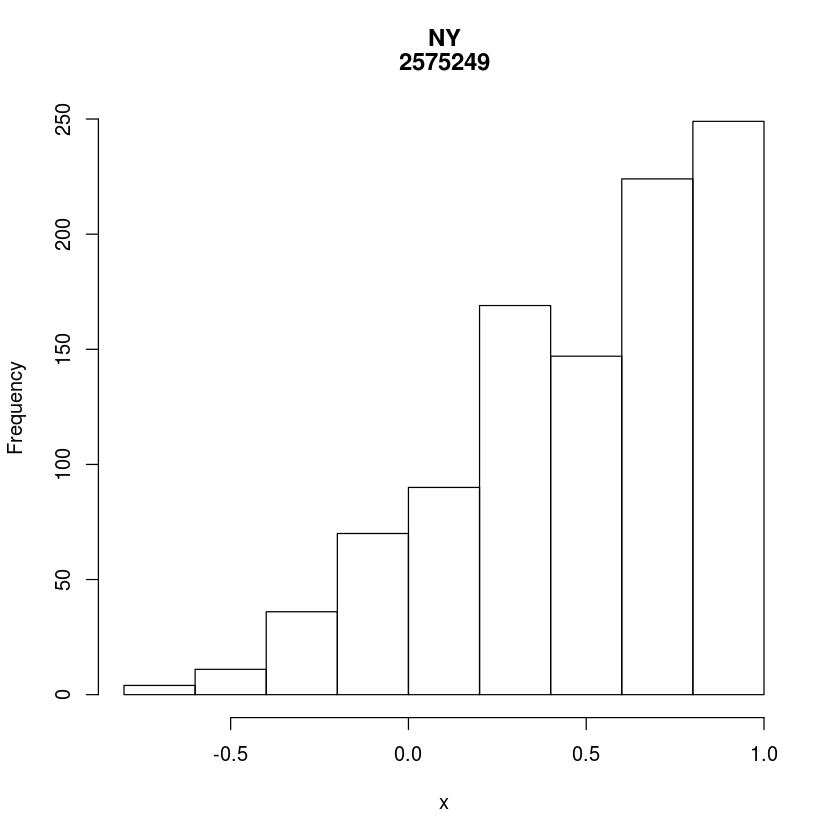

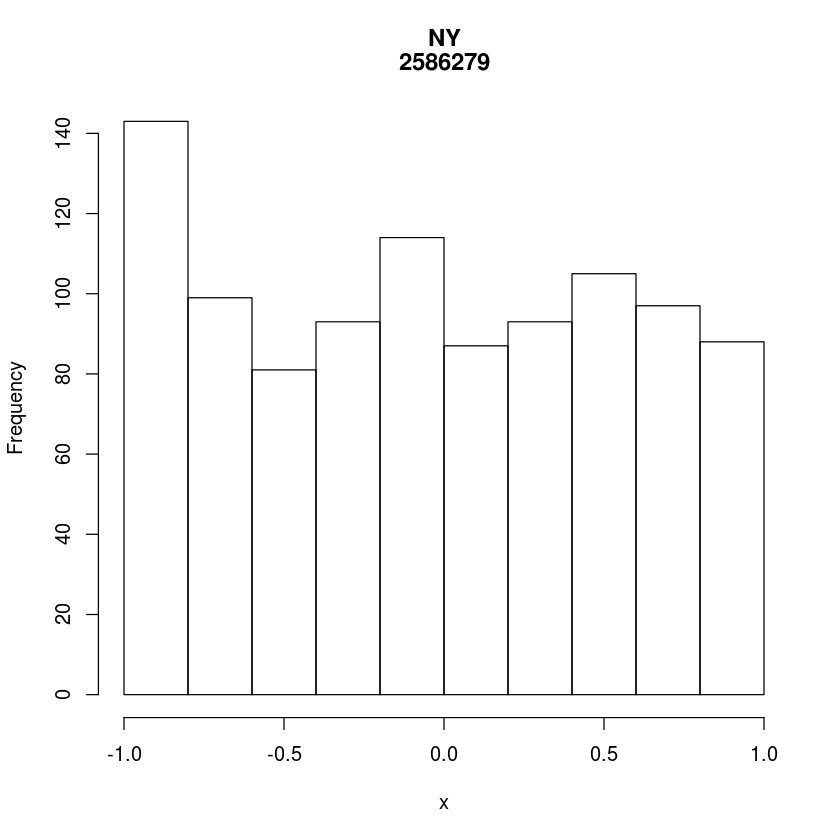

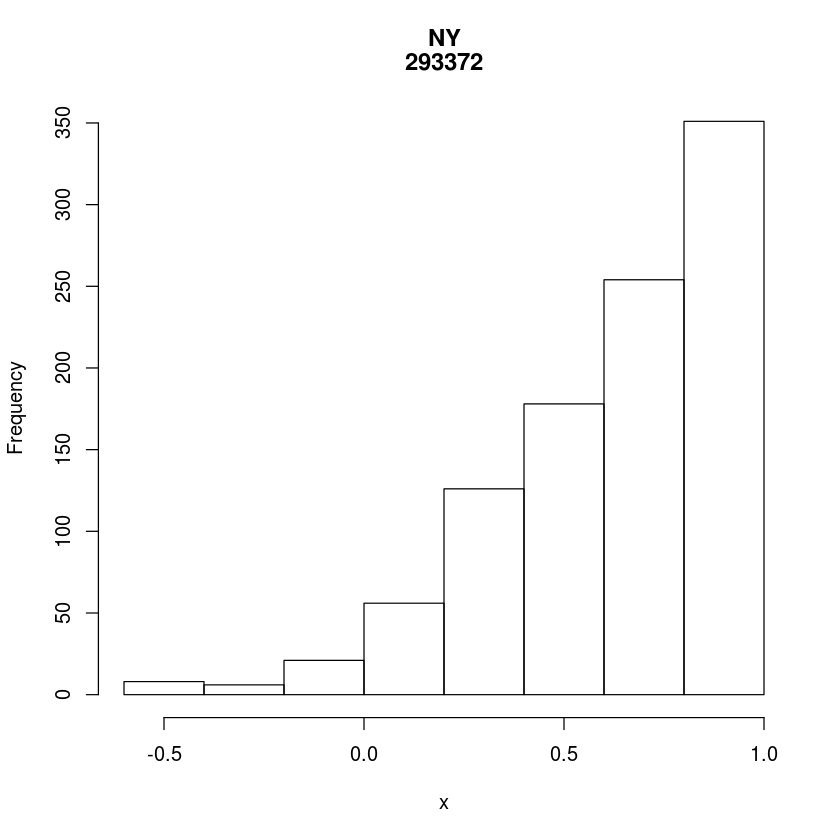

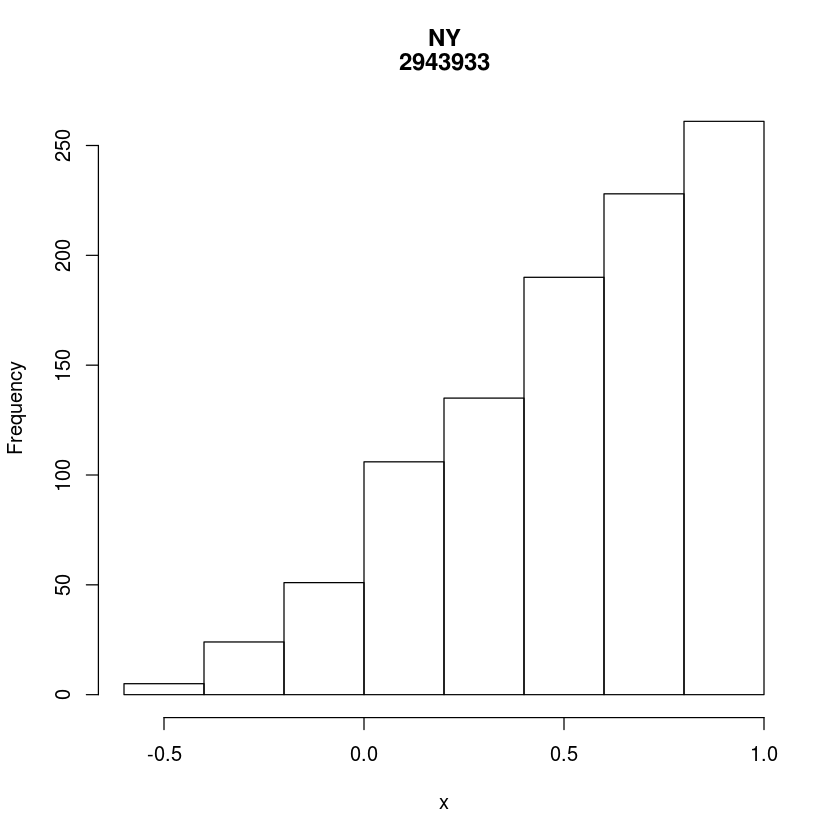

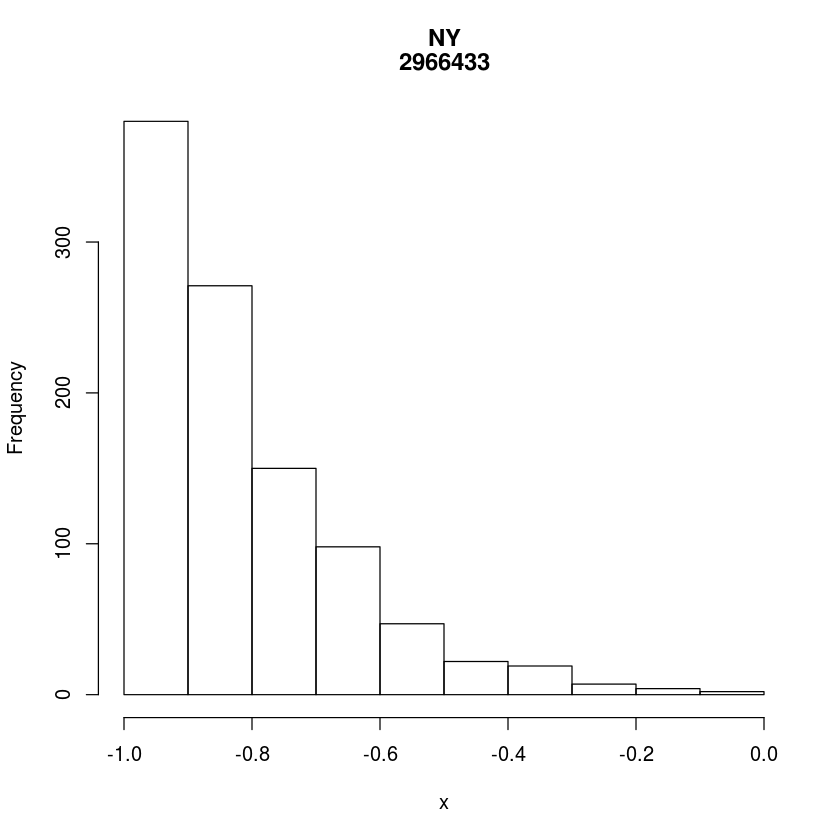

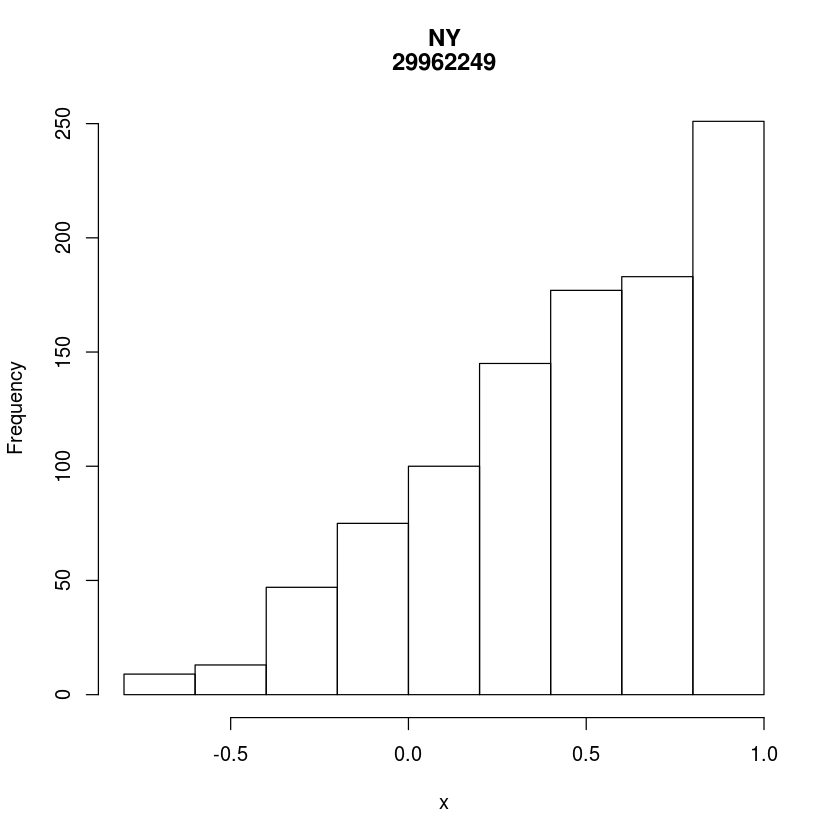

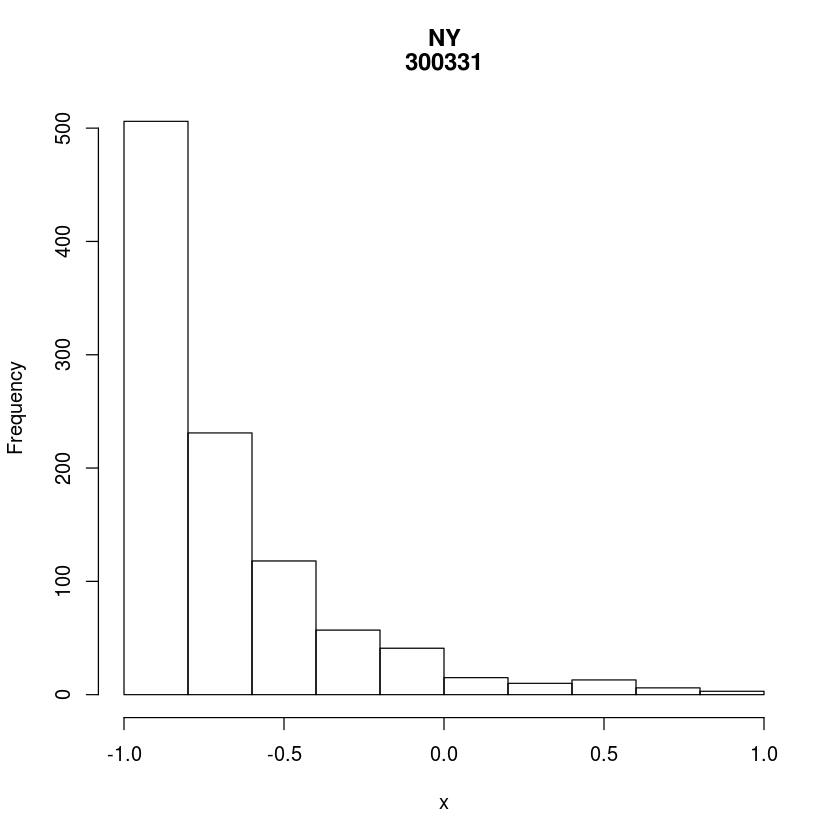

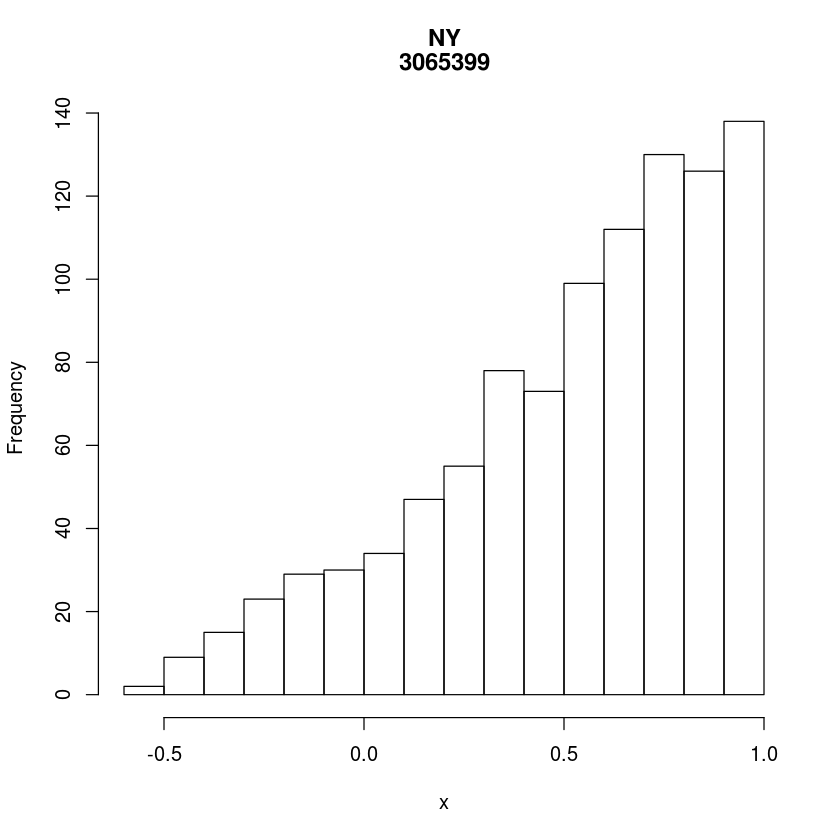

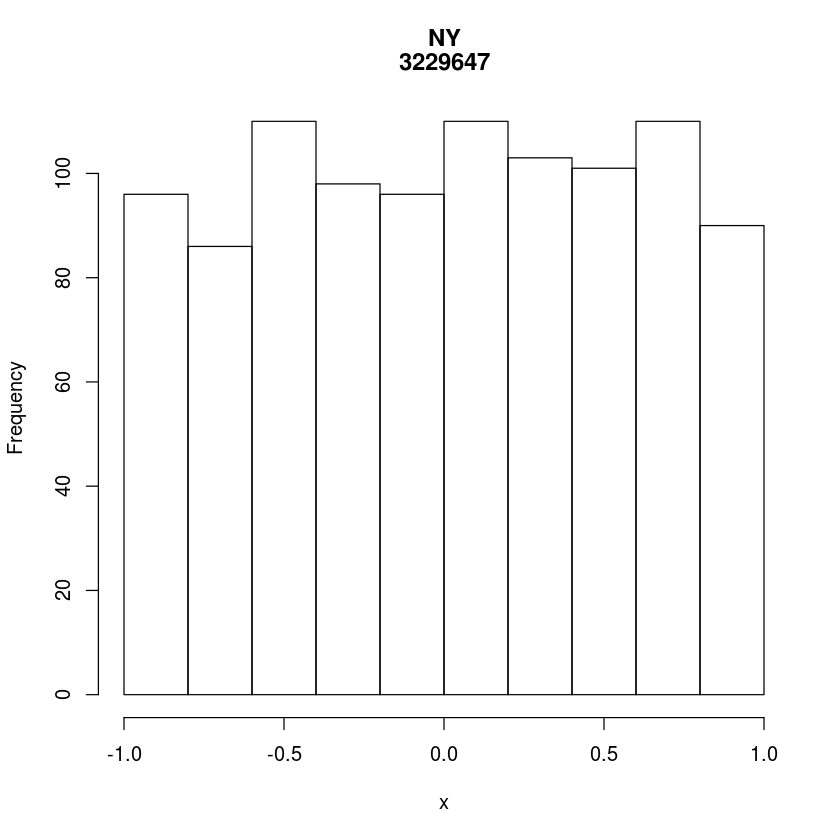

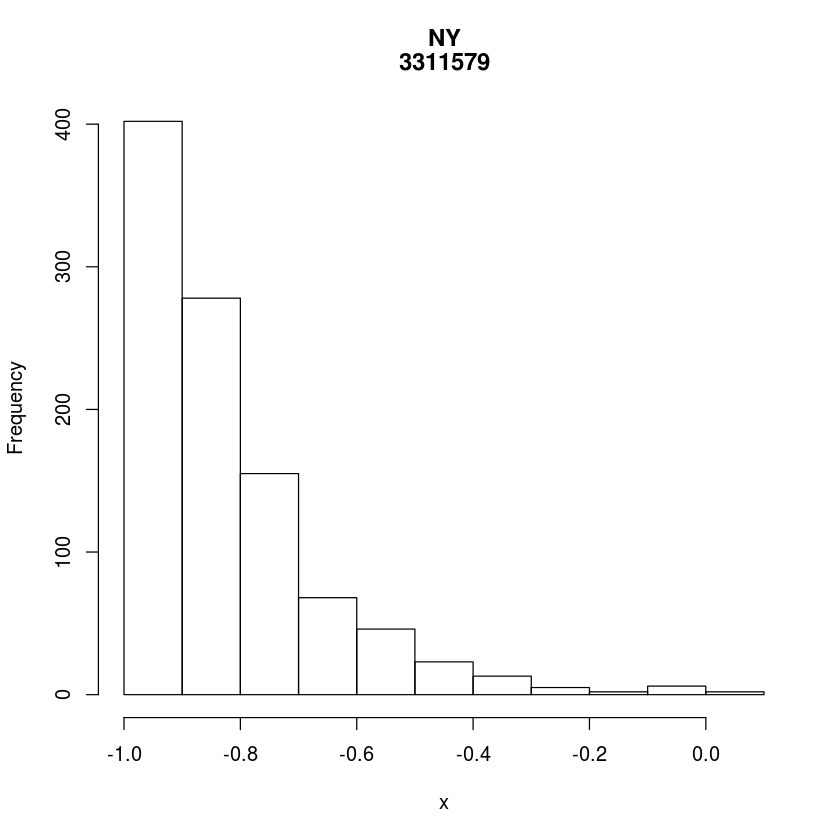

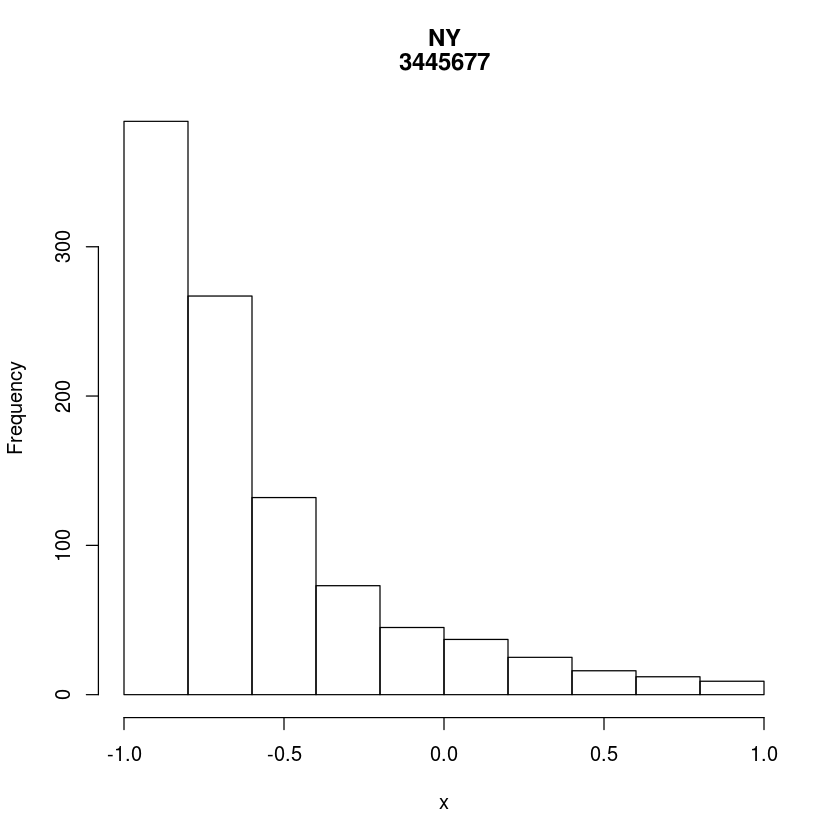

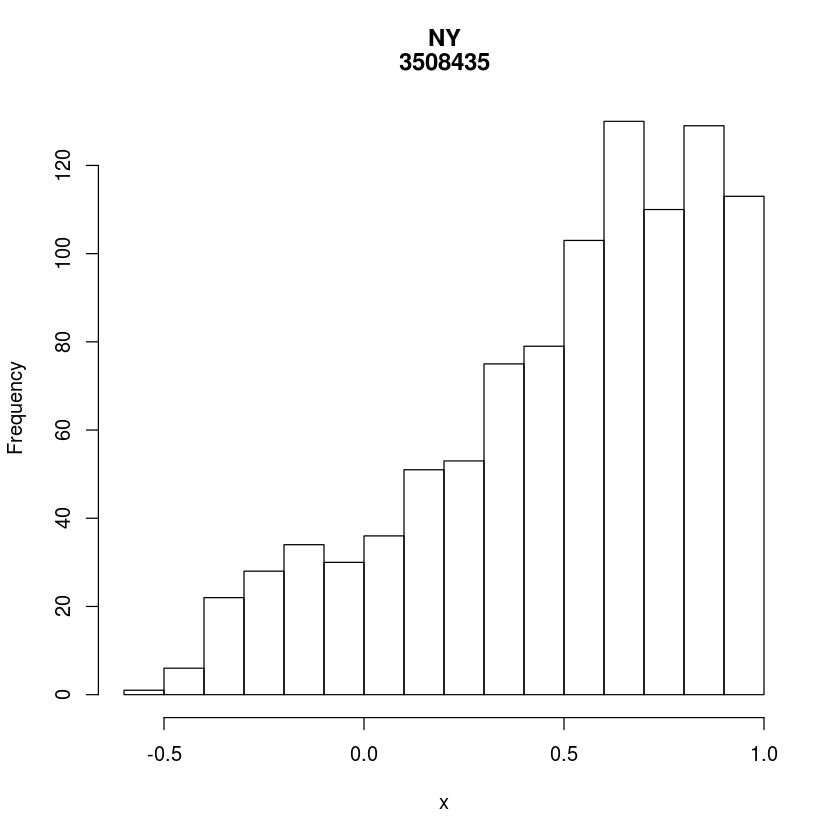

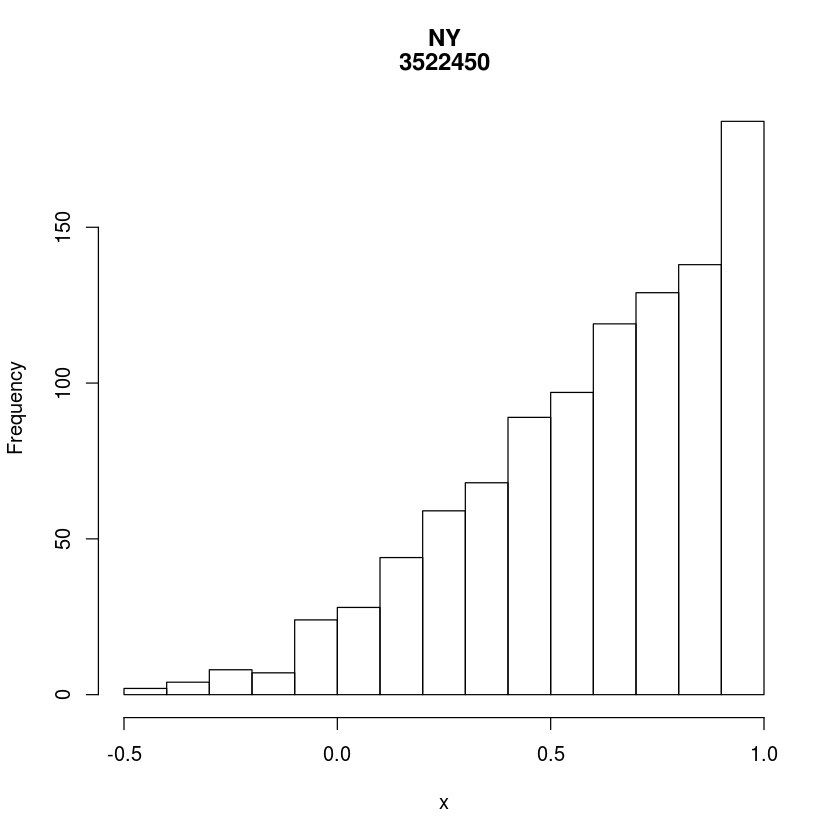

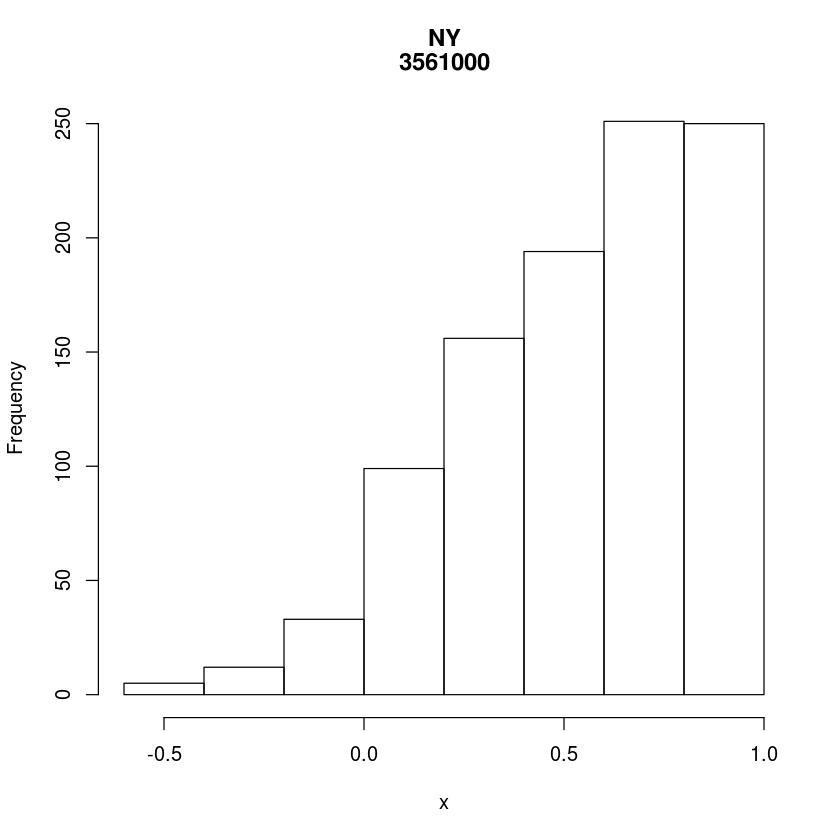

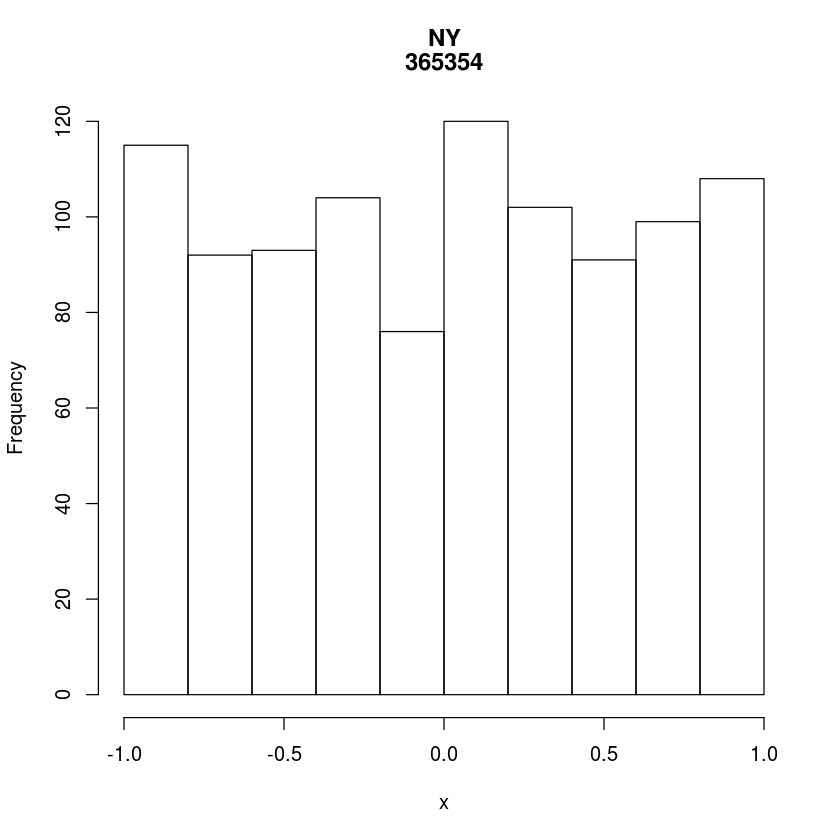

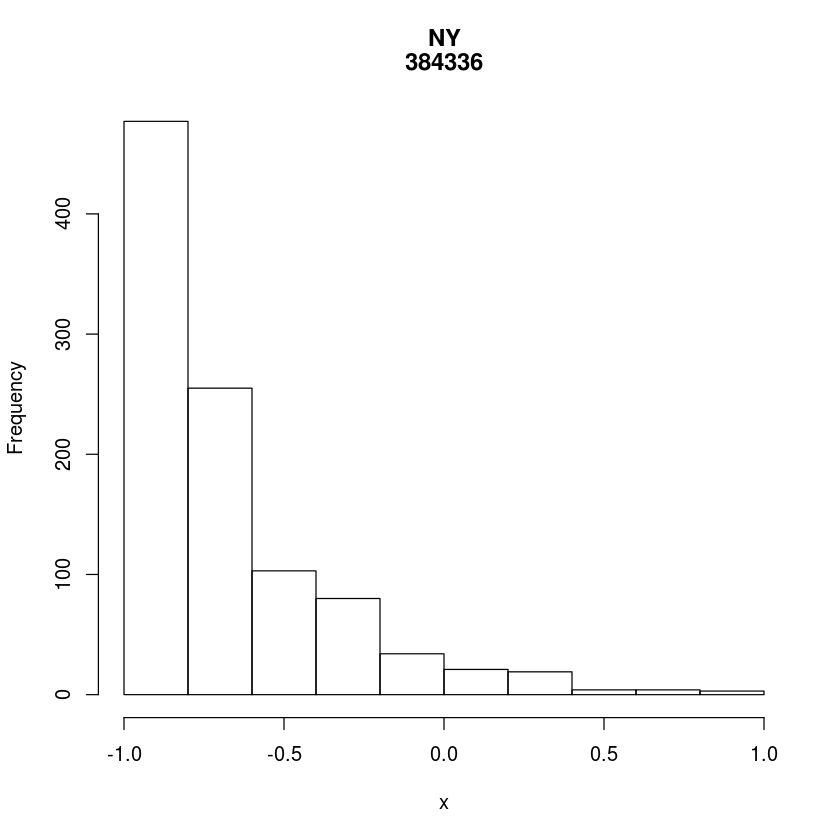

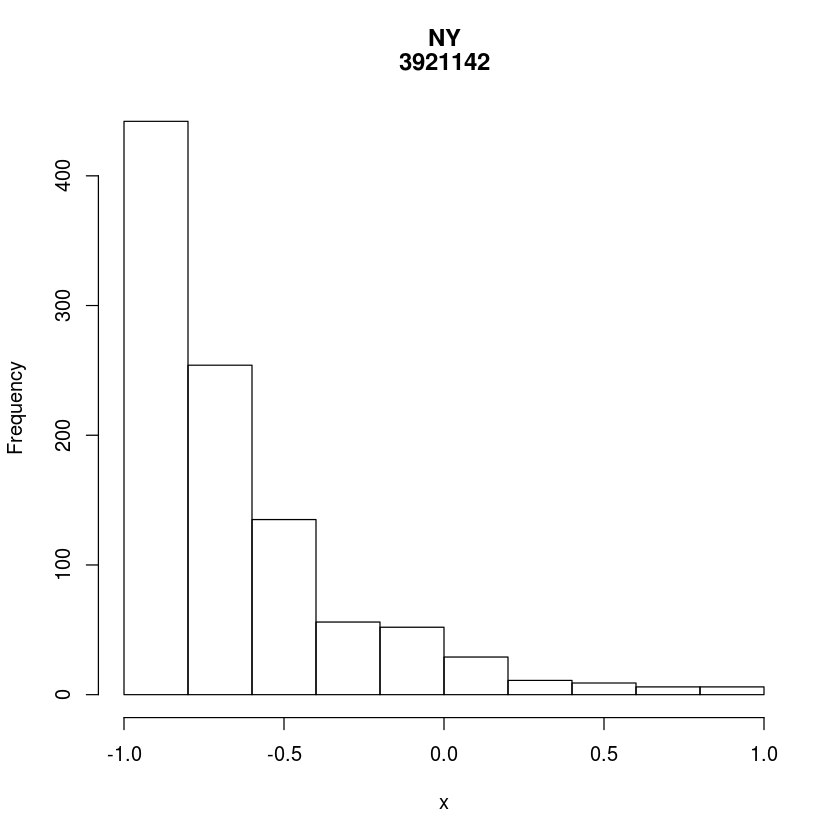

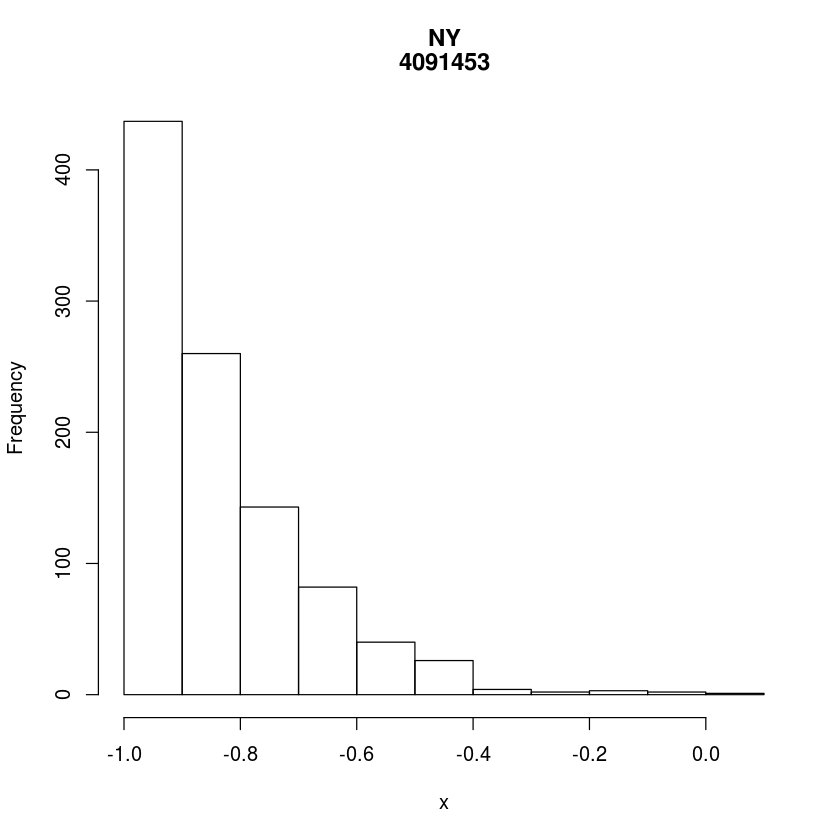

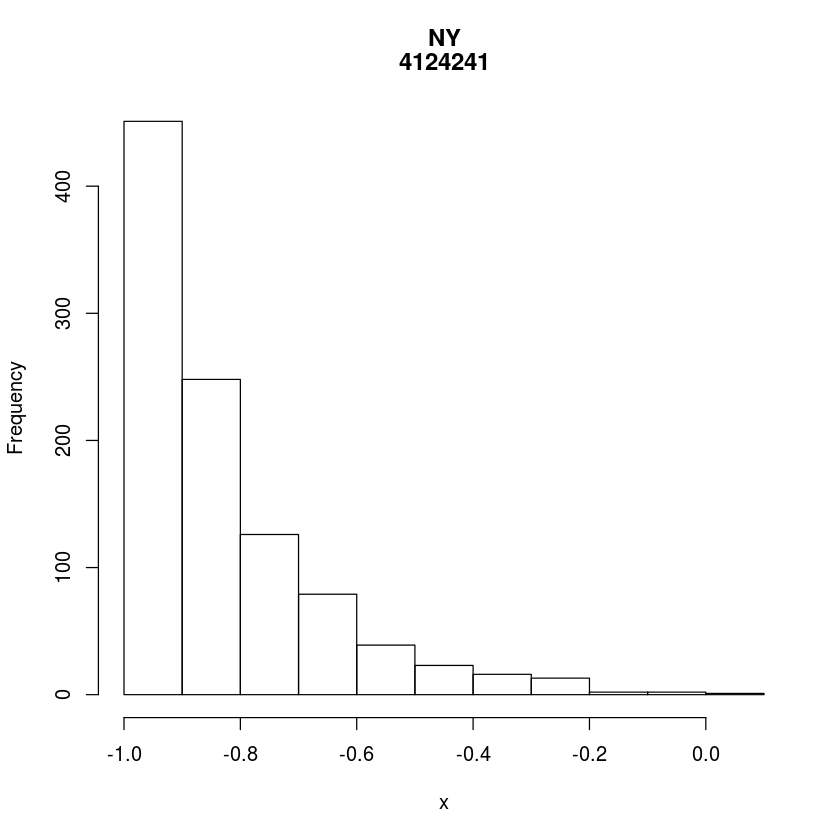

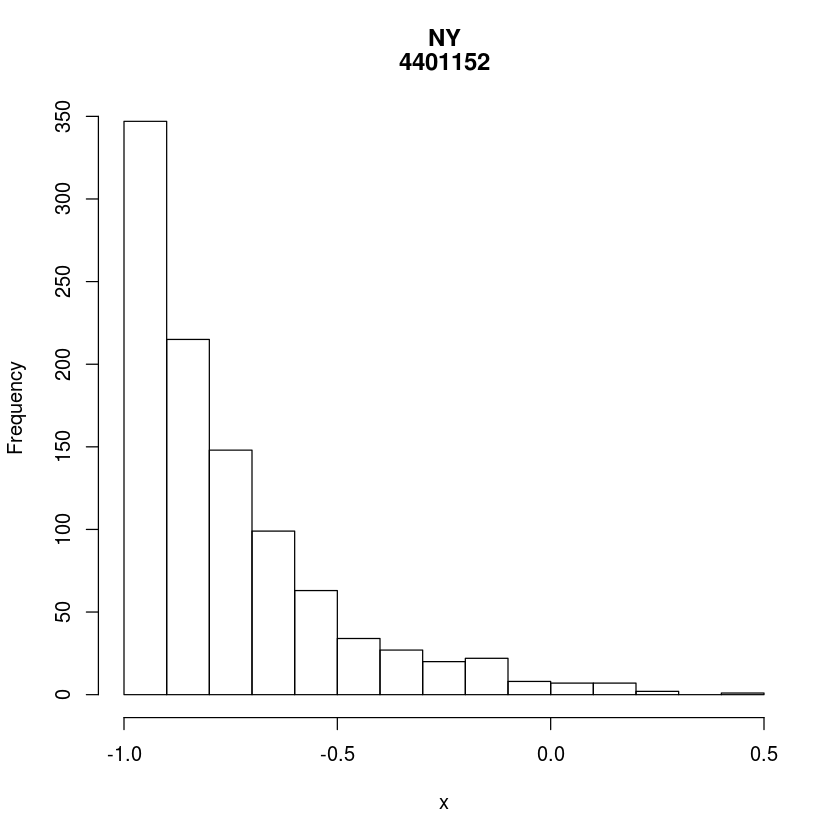

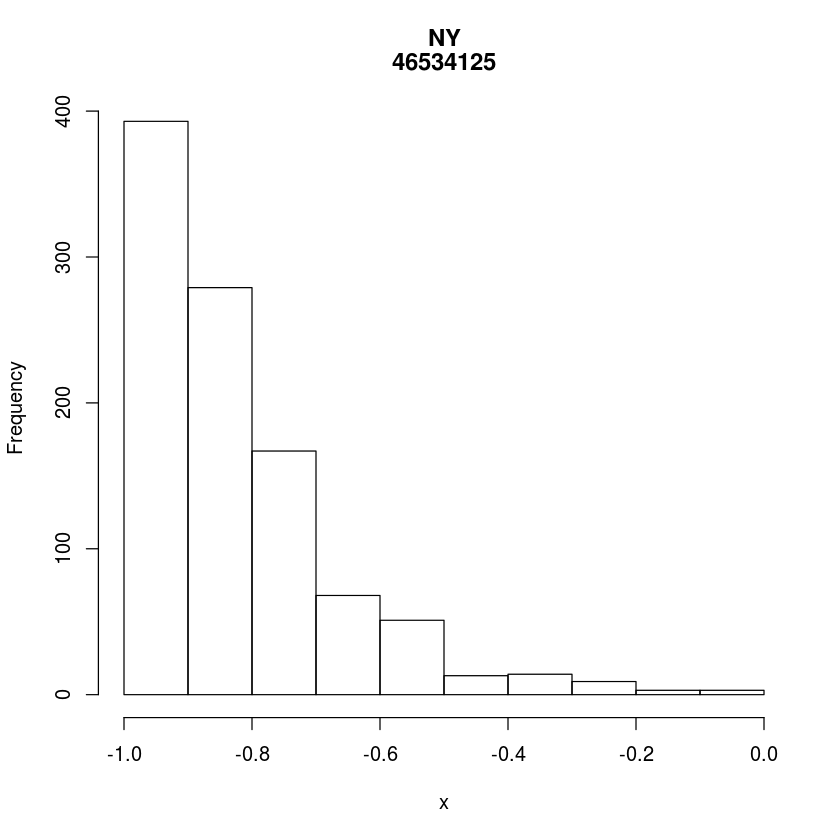

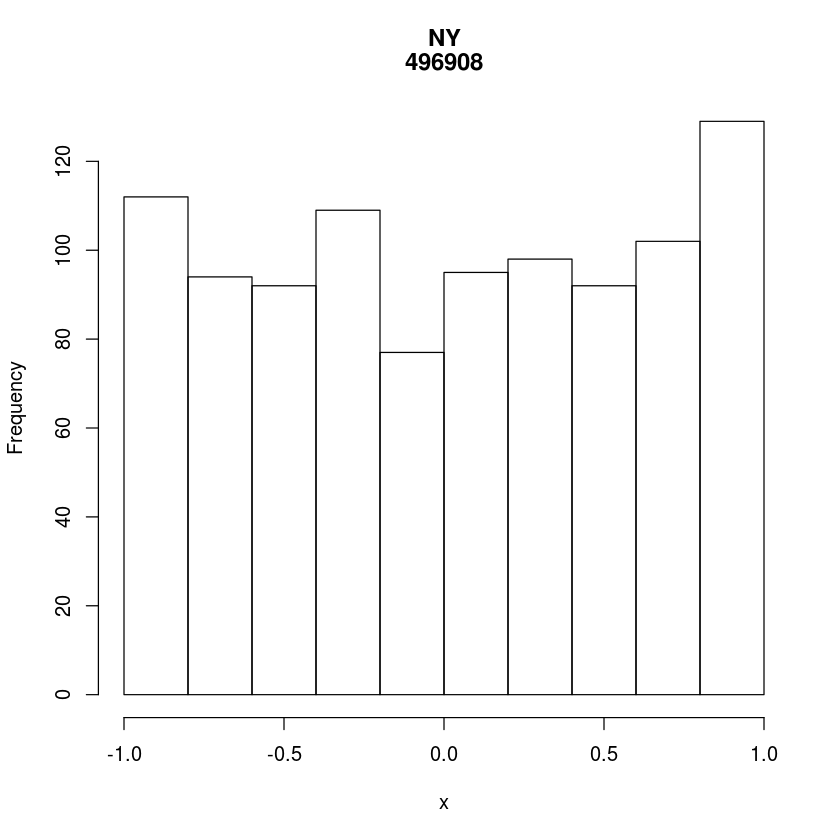

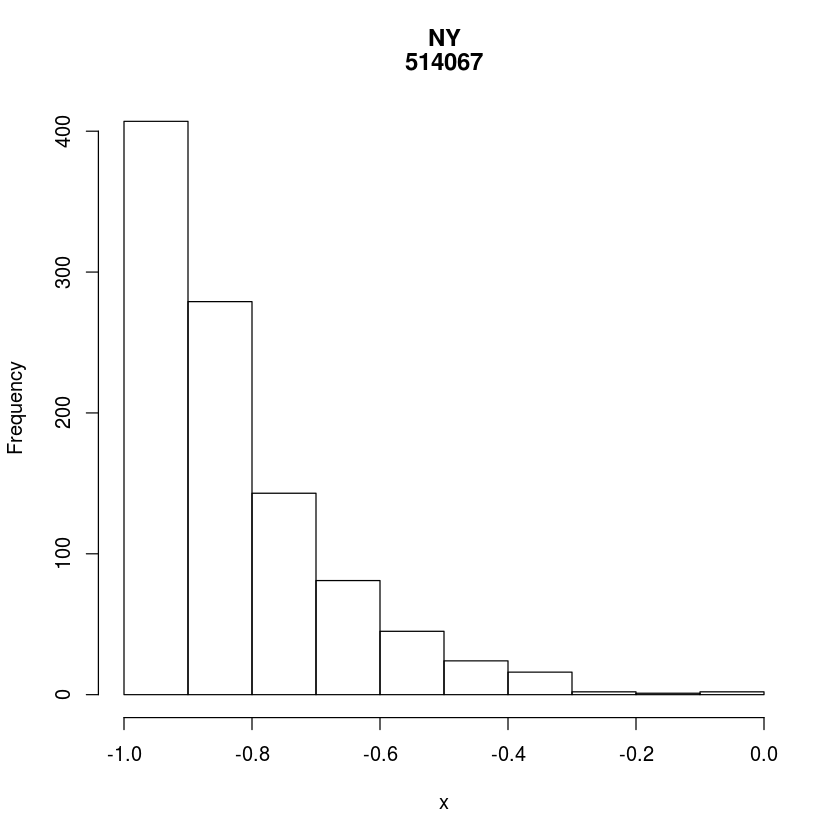

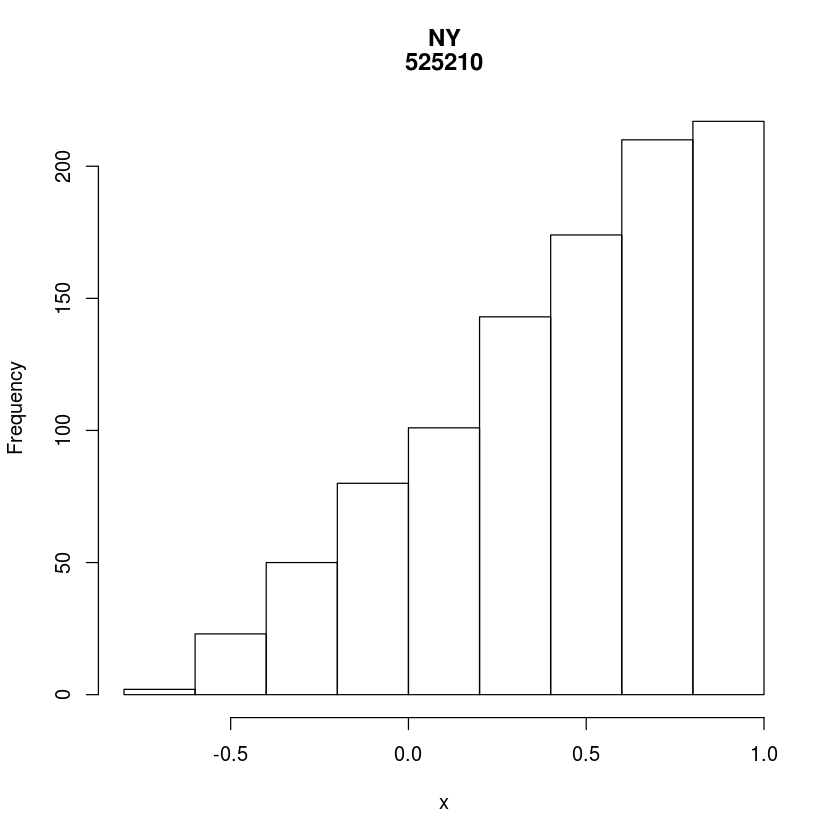

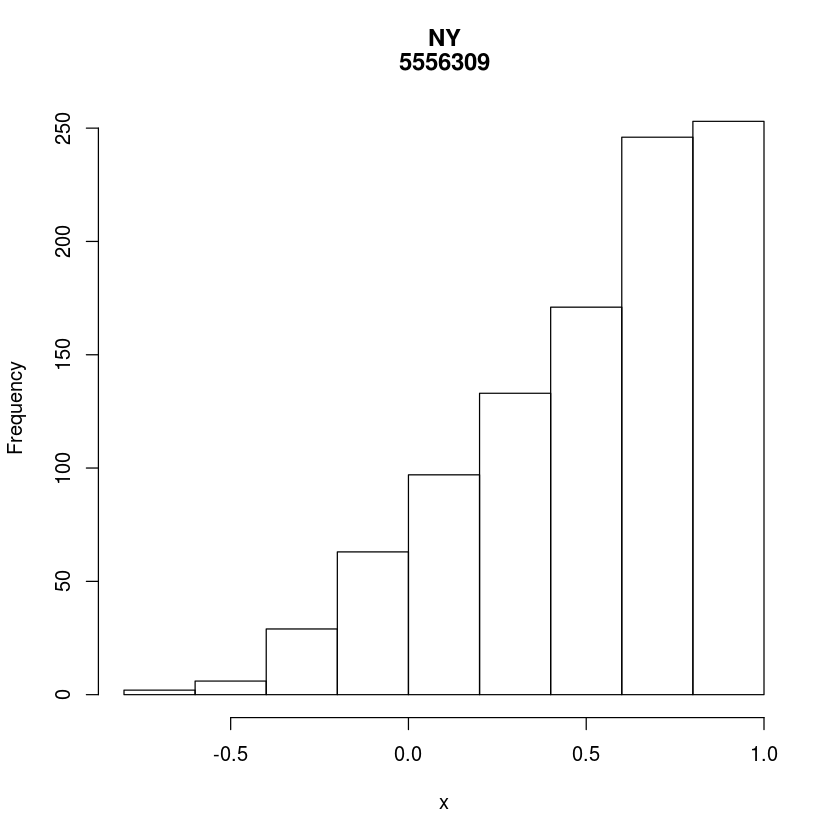

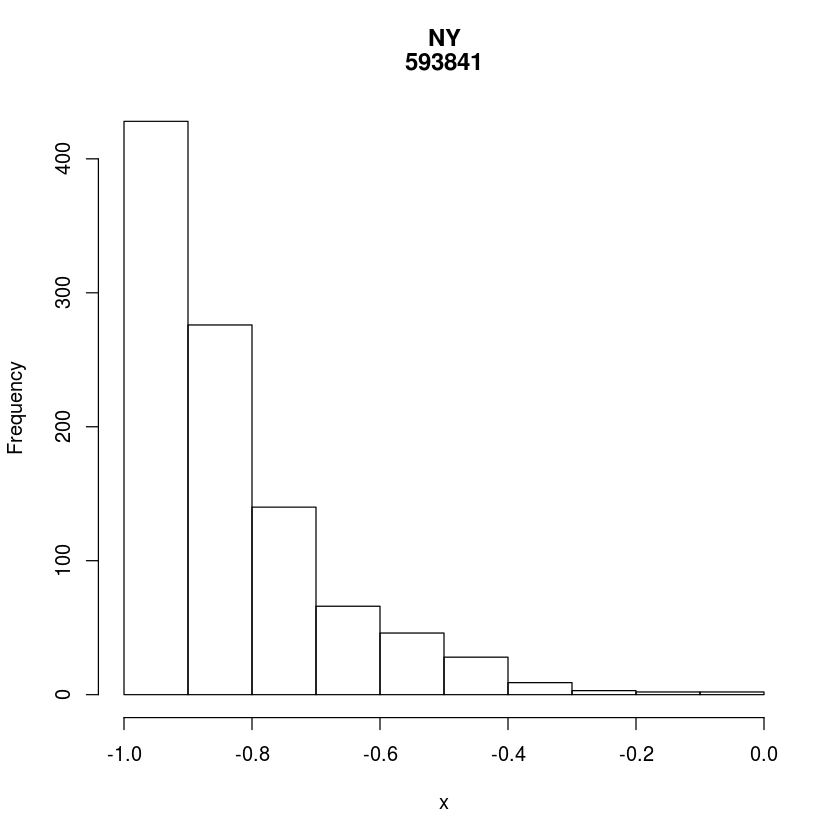

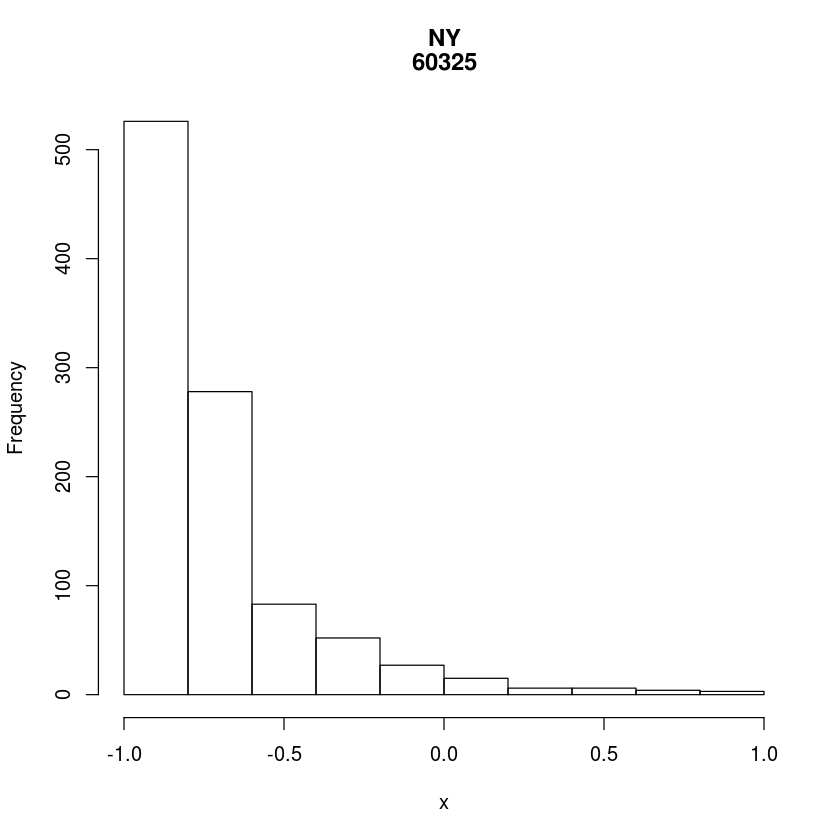

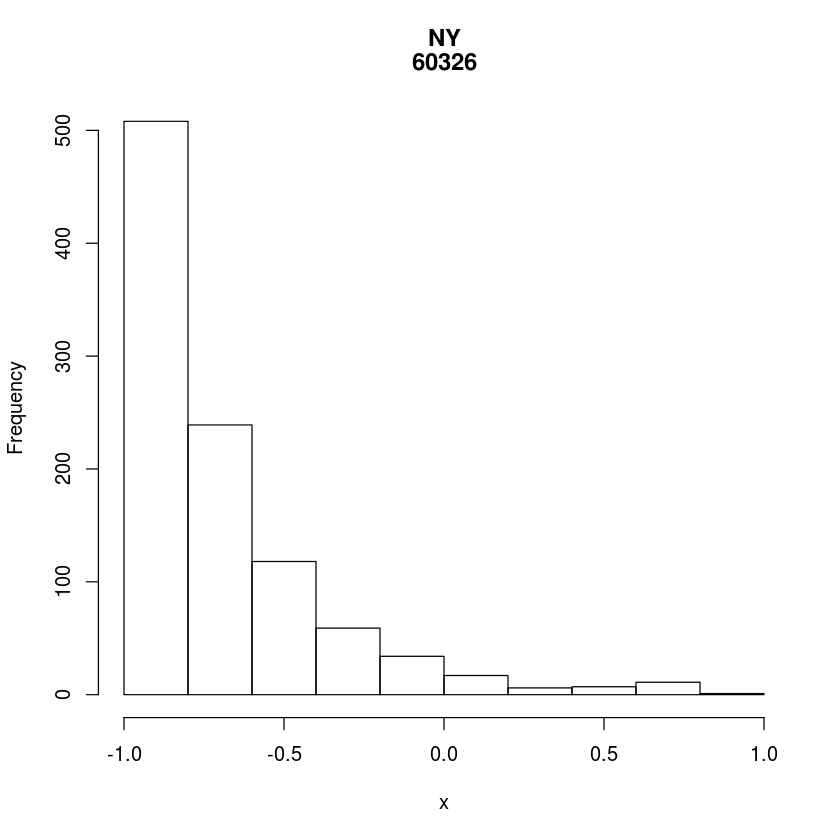

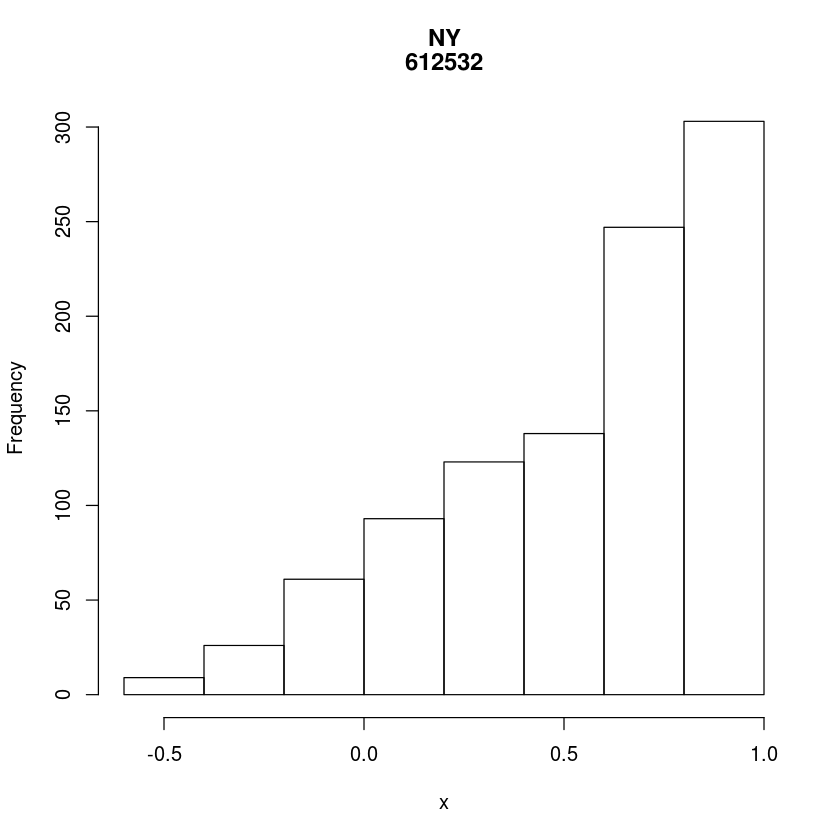

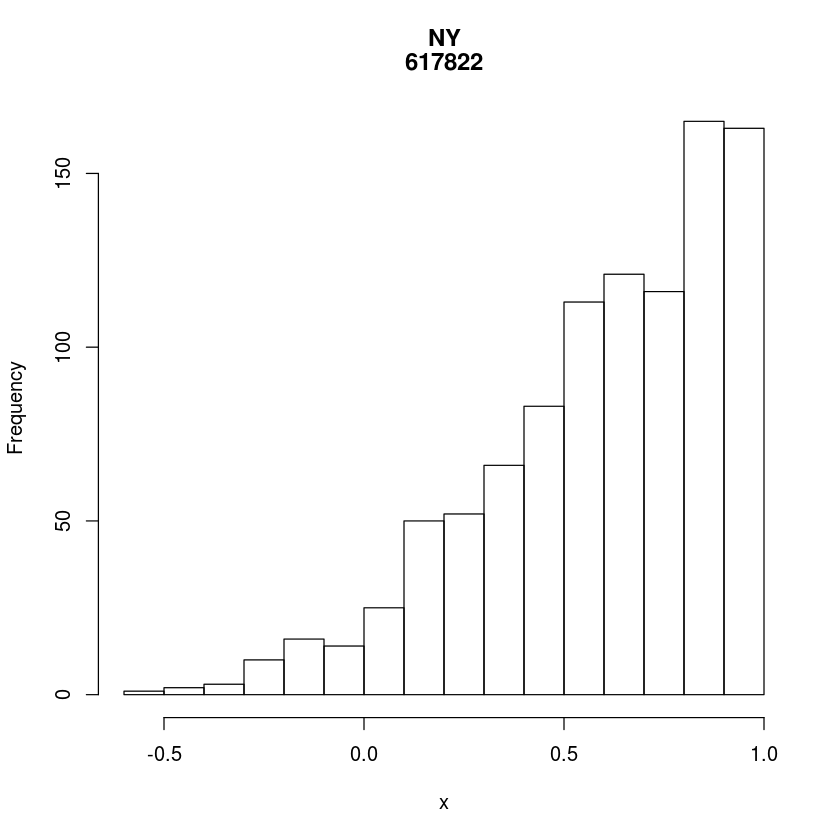

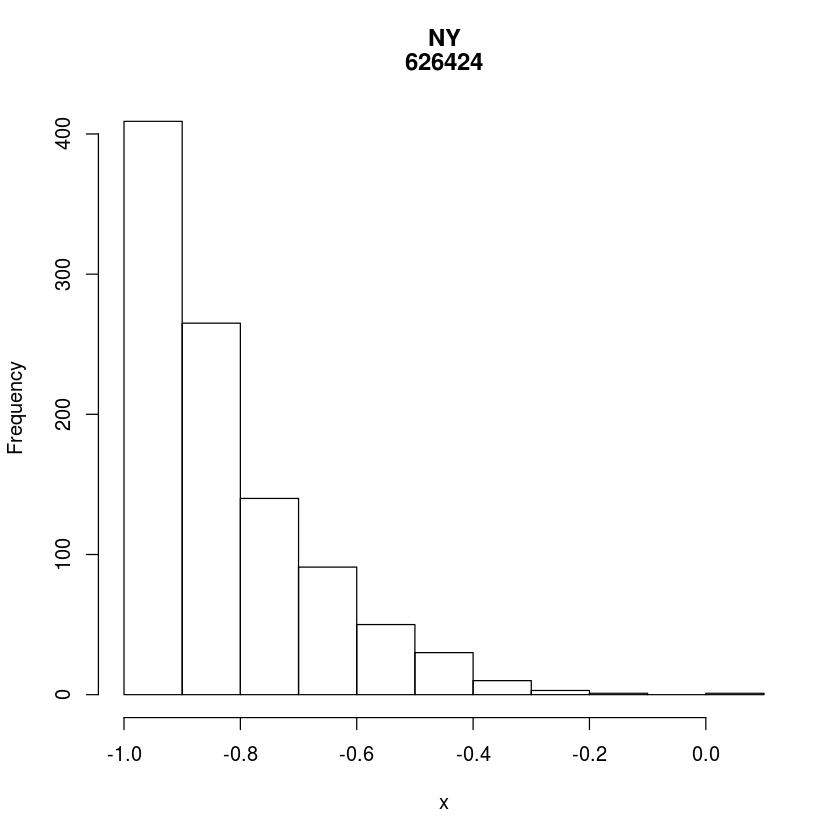

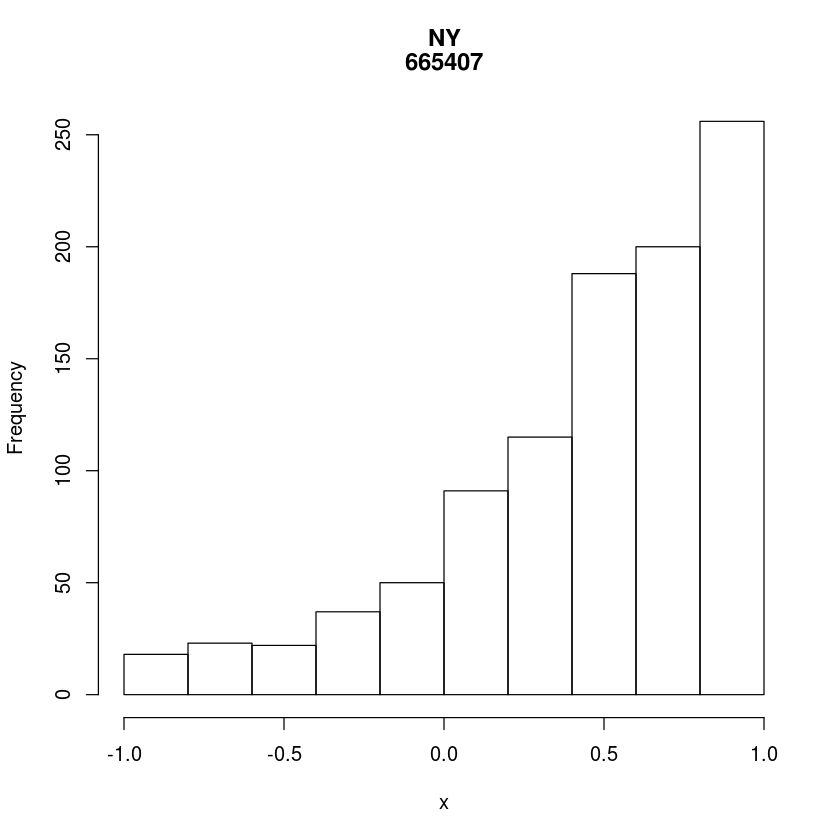

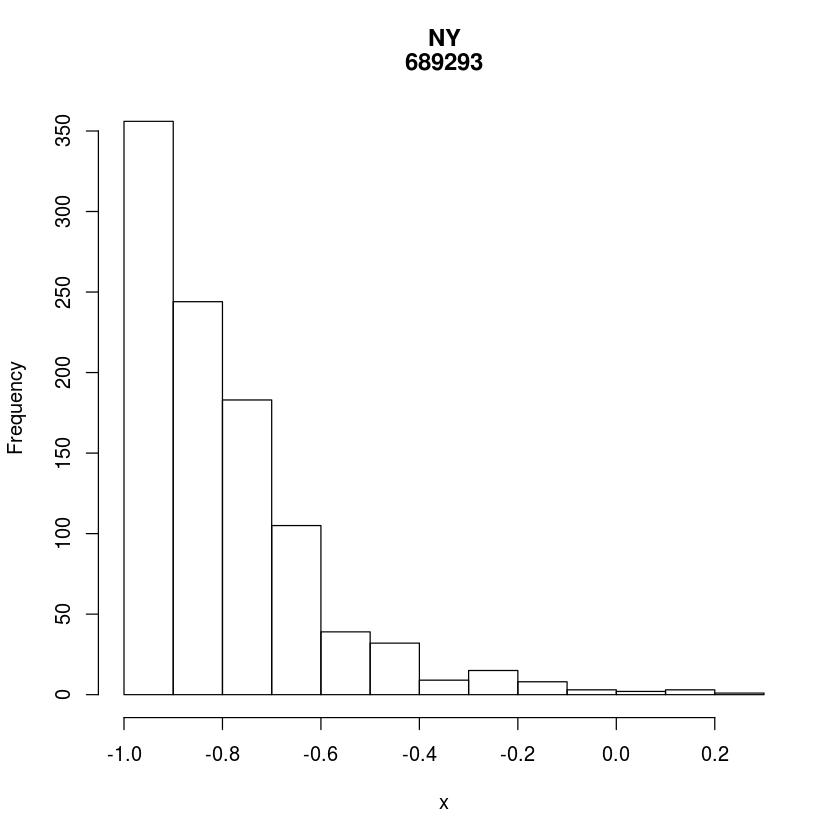

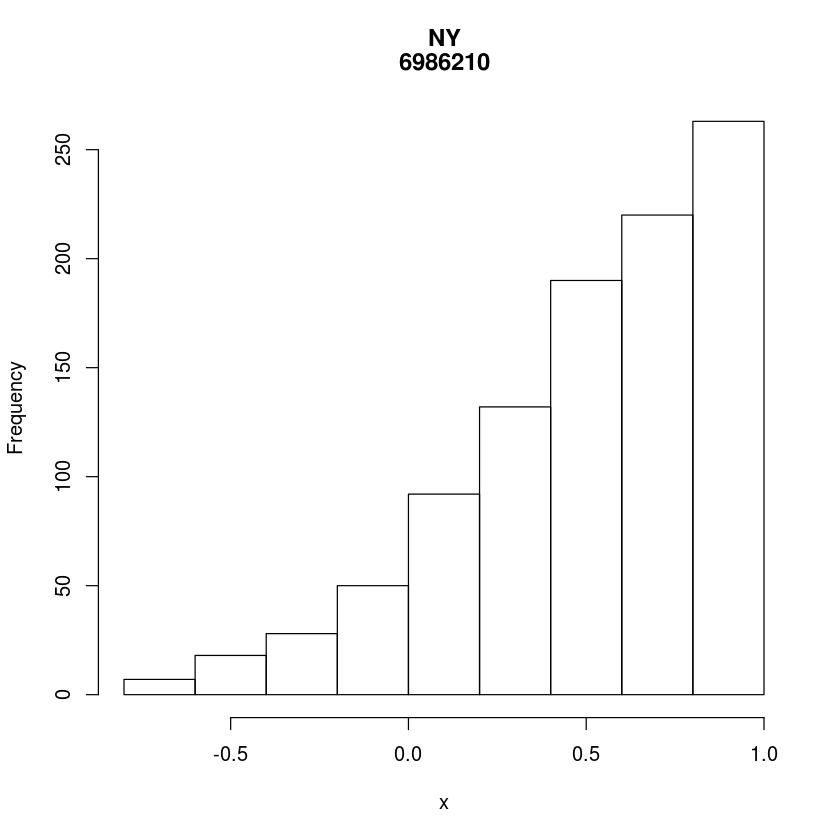

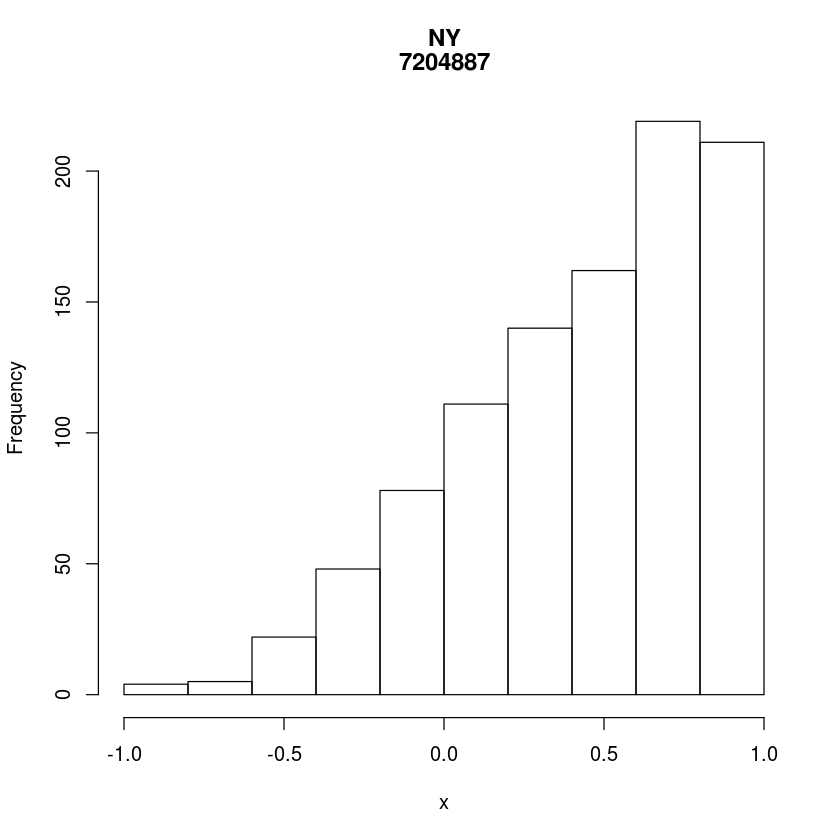

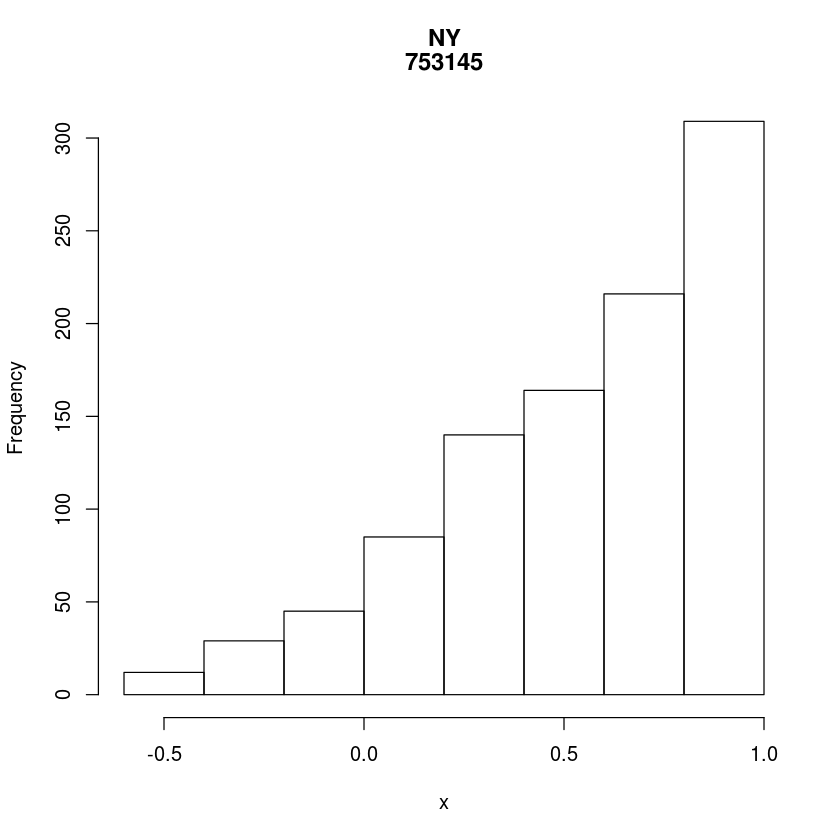

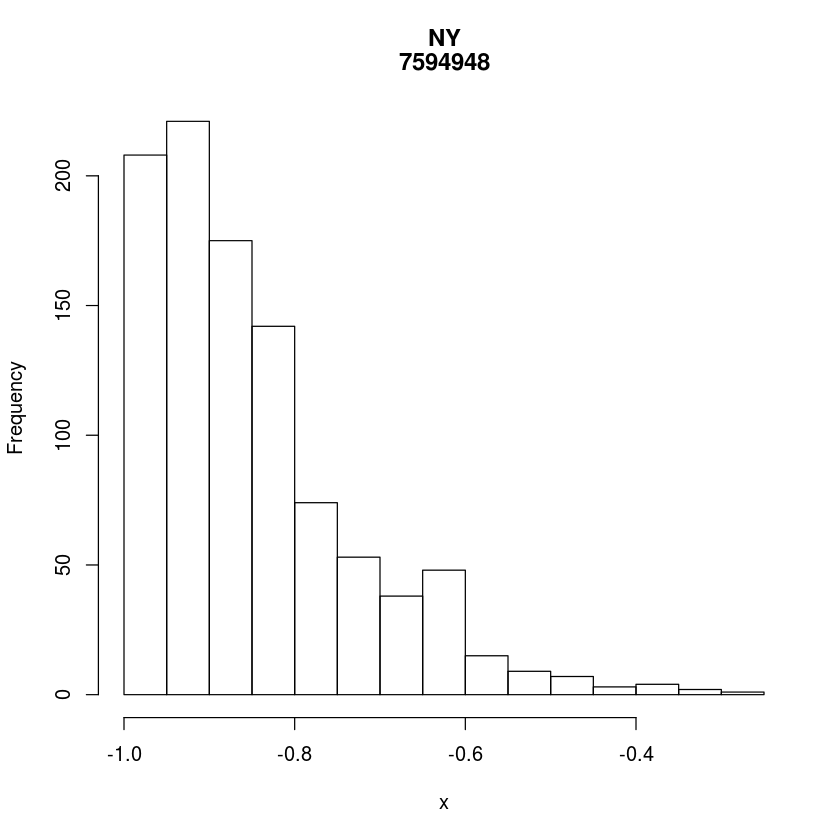

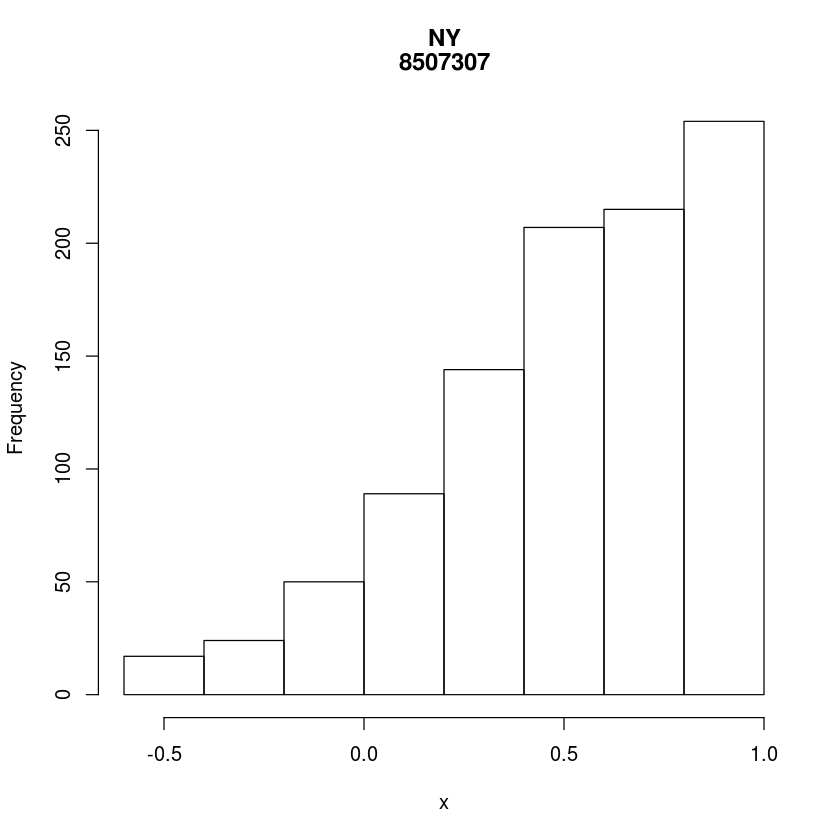

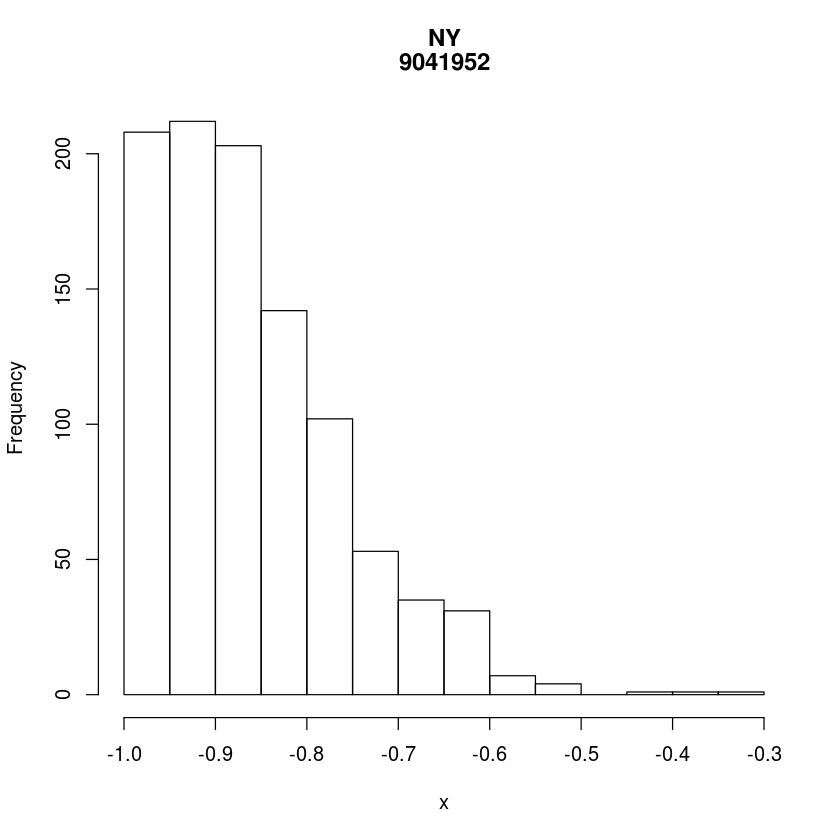

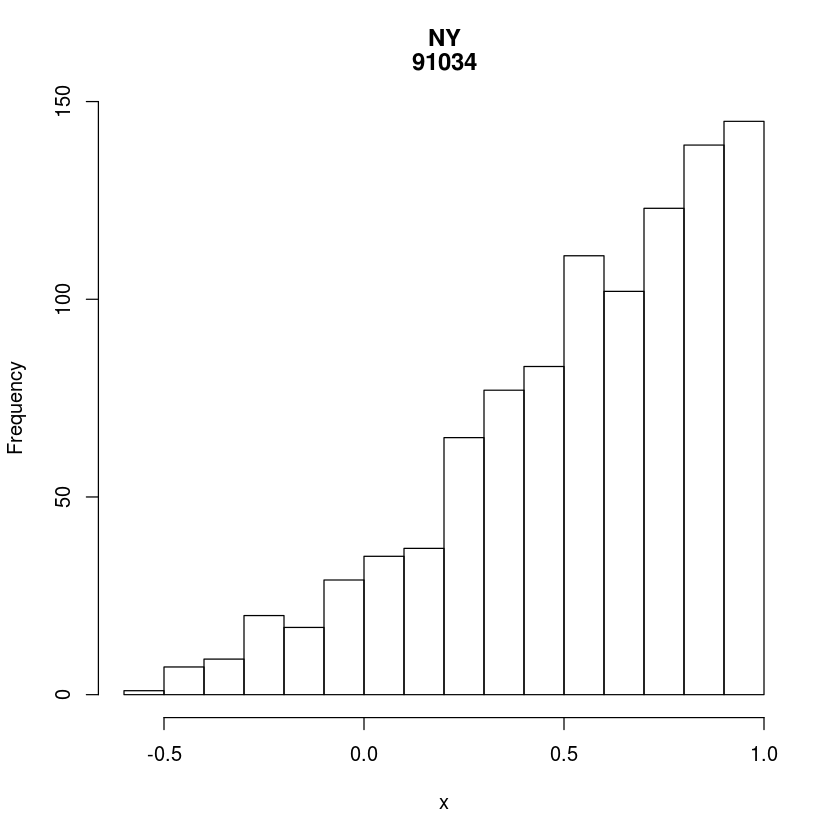

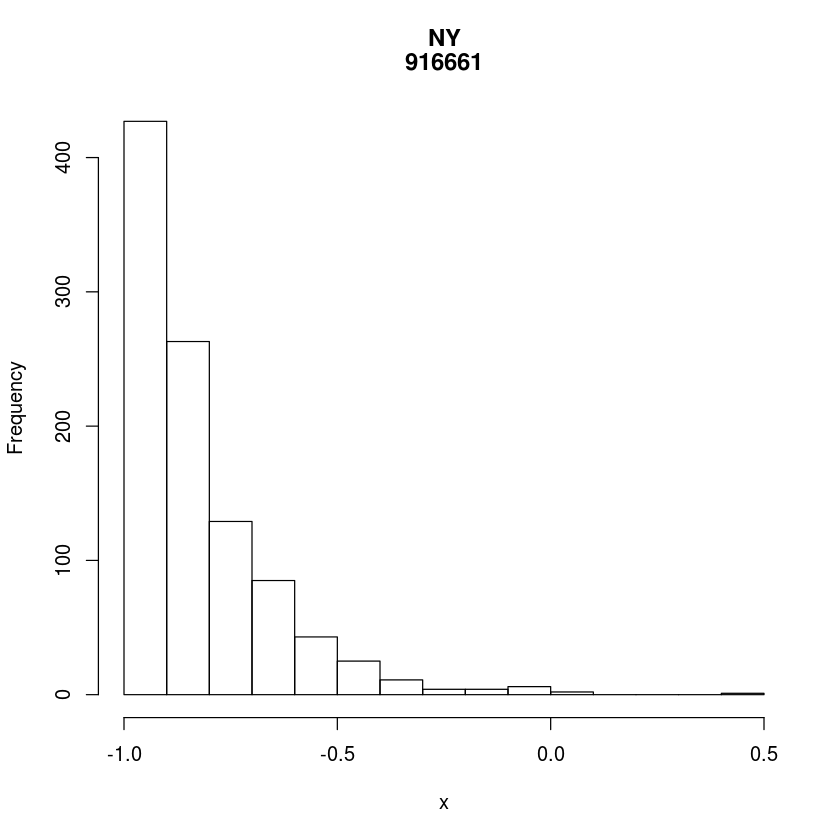

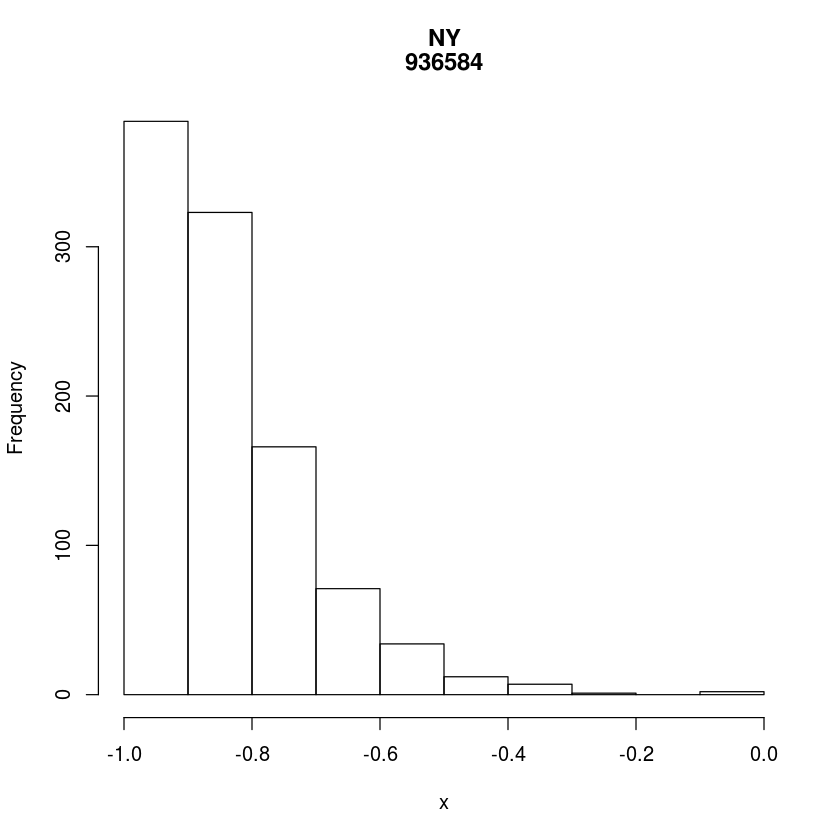

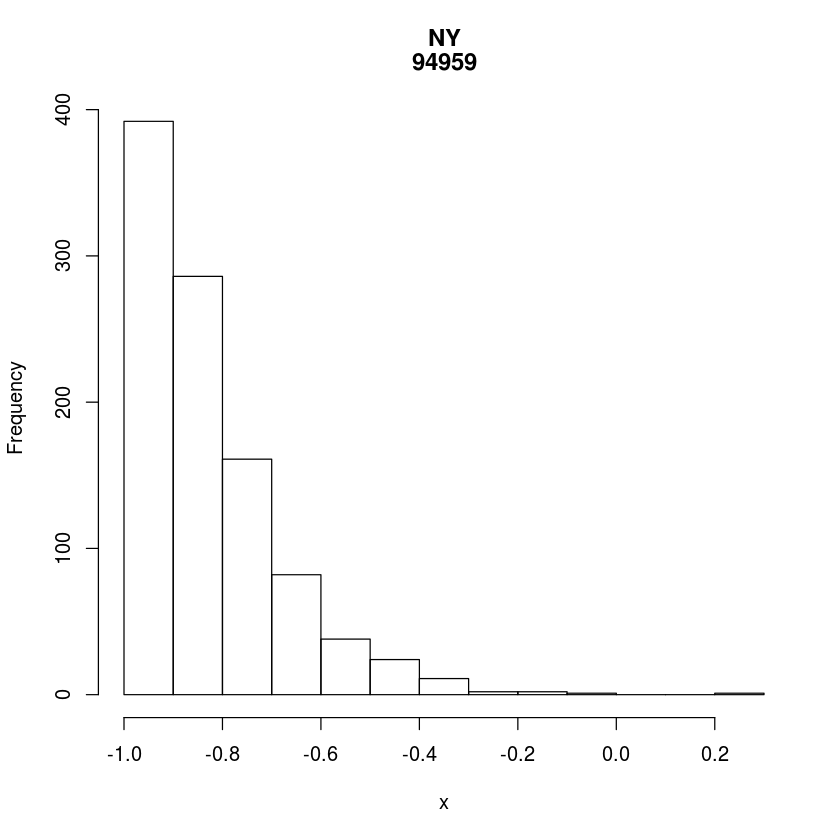

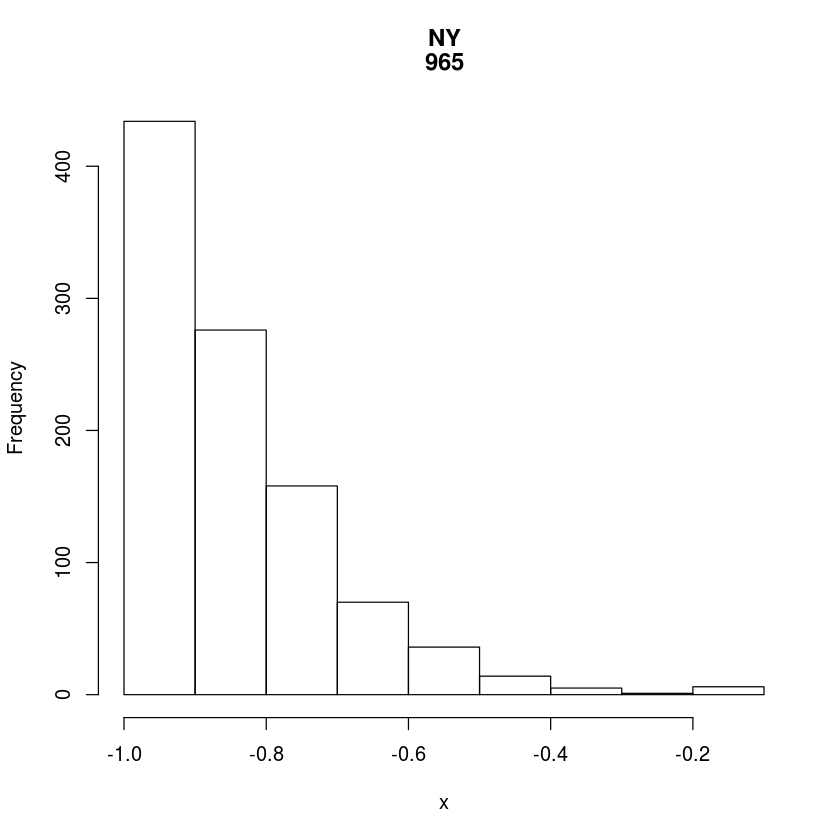

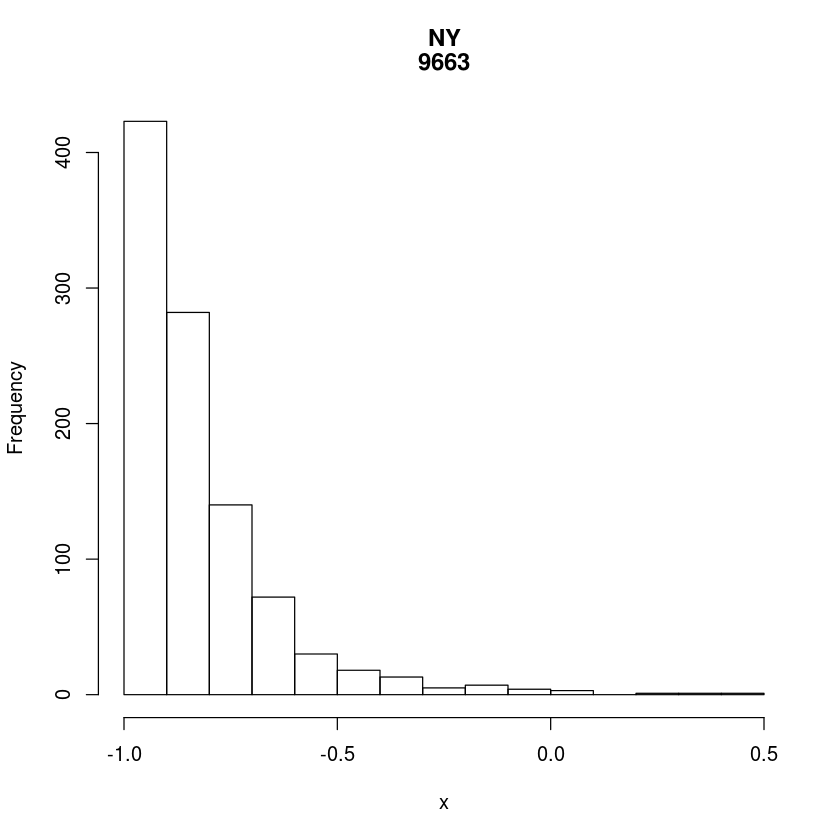

[,1]                                                         
breaks   -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0         
counts   2, 6, 22, 50, 71, 122, 172, 235, 320                         
density  0.010, 0.030, 0.110, 0.250, 0.355, 0.610, 0.860, 1.175, 1.600
mids     -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9              
xname    x                                                            
equidist TRUE                                                         
         [,2]                                                         
breaks   -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0         
counts   1, 15, 32, 89, 119, 138, 160, 208, 238                       
density  0.005, 0.075, 0.160, 0.445, 0.595, 0.690, 0.800, 1.040, 1.190
mids     -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9              
xname    x                                                            
equidist TRUE                                                         
         [,3]                                                                
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0     
counts   419, 307, 147, 75, 29, 8, 14, 0, 0, 1                               
density  4.19, 3.07, 1.47, 0.75, 0.29, 0.08, 0.14, 0.00, 0.00, 0.01          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05
xname    x                                                                   
equidist TRUE                                                                
         [,4]                                                                                  
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3        
counts   406, 235, 134, 72, 57, 38, 21, 18, 4, 7, 4, 2, 2                                      
density  4.06, 2.35, 1.34, 0.72, 0.57, 0.38, 0.21, 0.18, 0.04, 0.07, 0.04, 0.02, 0.02          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25
xname    x                                                                                     
equidist TRUE                                                                                  
         [,5]                                                                            
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2       
counts   371, 266, 152, 83, 54, 36, 24, 7, 3, 3, 0, 1                                    
density  3.71, 2.66, 1.52, 0.83, 0.54, 0.36, 0.24, 0.07, 0.03, 0.03, 0.00, 0.01          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15
xname    x                                                                               
equidist TRUE                                                                            
         [,6]                                                                    
breaks   -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0       
counts   6, 16, 19, 34, 47, 69, 76, 111, 133, 129, 158, 202                      
density  0.06, 0.16, 0.19, 0.34, 0.47, 0.69, 0.76, 1.11, 1.33, 1.29, 1.58, 2.02  
mids     -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                       
equidist TRUE                                                                    
         [,7]                                                                                  
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3        
counts   380, 266, 143, 83, 50, 36, 19, 11, 6, 3, 2, 0, 1                                      
density  3.80, 2.66, 1.43, 0.83, 0.50, 0.36, 0.19, 0.11, 0.06, 0.03, 0.02, 0.00, 0.01          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25
xname    x                                                                                     
equidist TRUE    

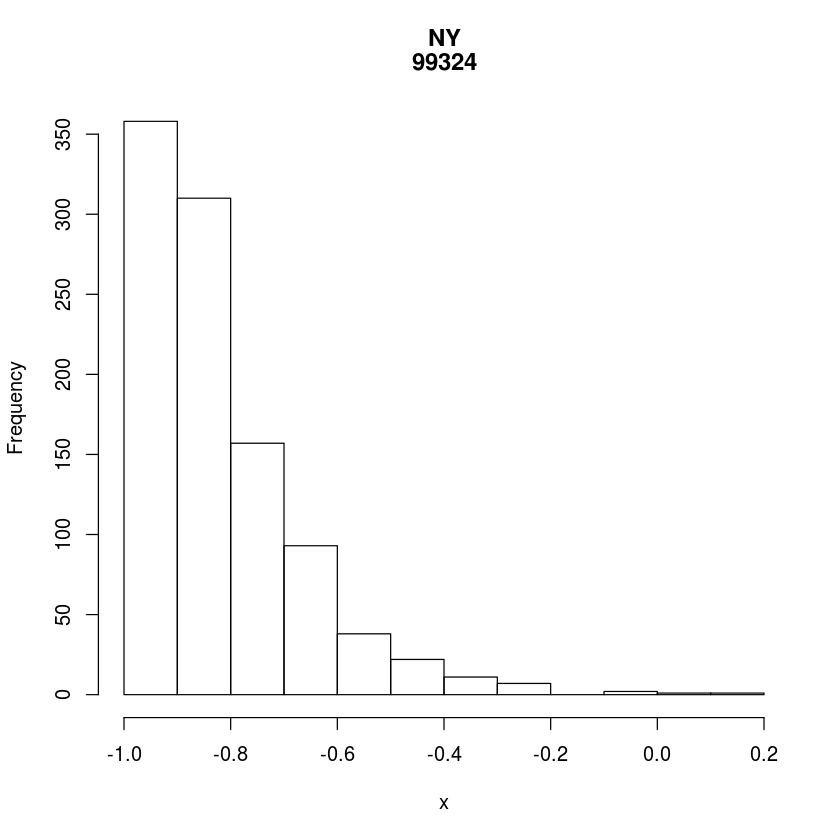

In [19]:
mapply(function(x, y) {
hist(x, main=c("NY", y[[1,4]]))}, sNY, tNY_f2s)


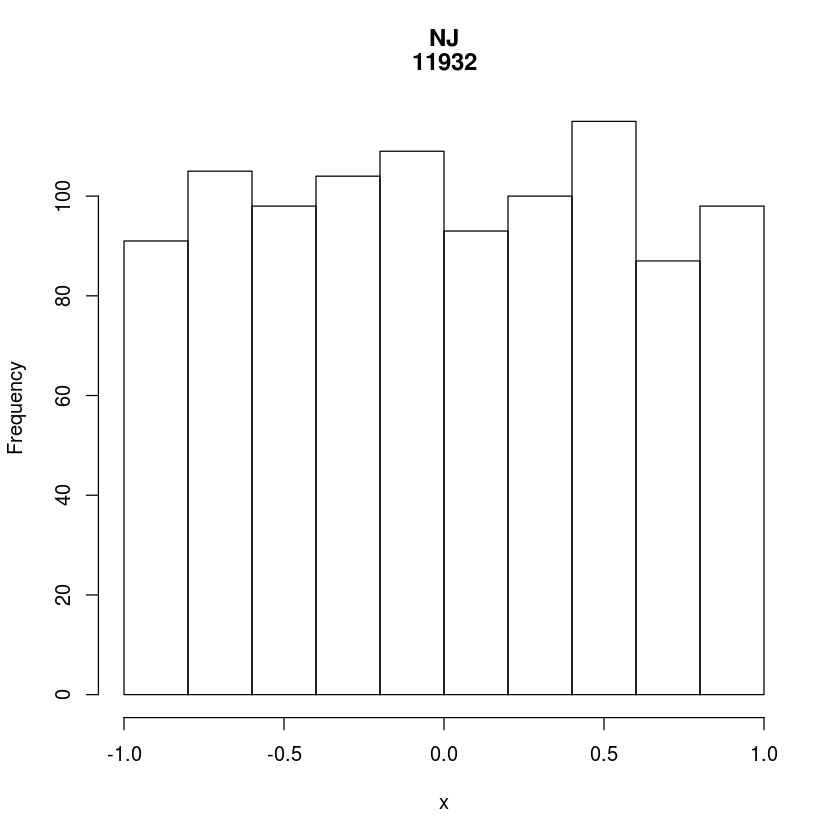

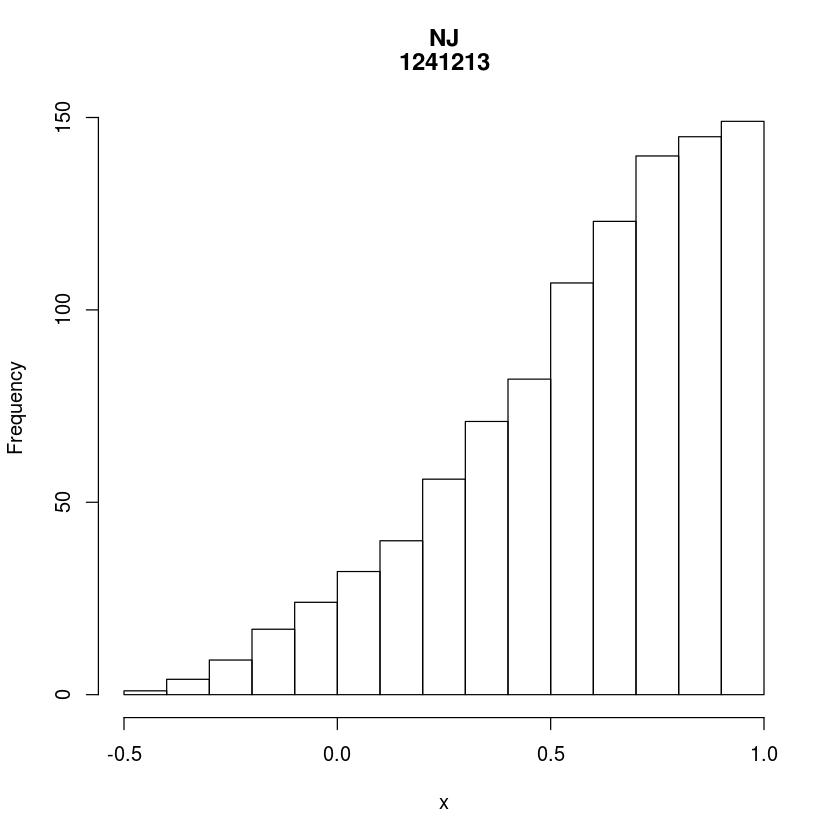

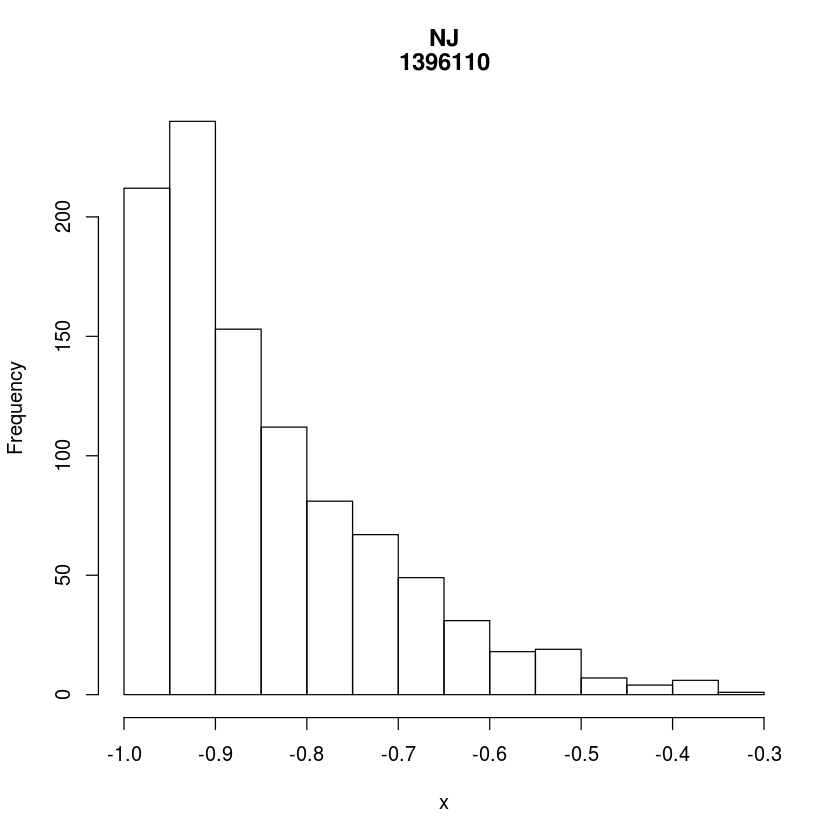

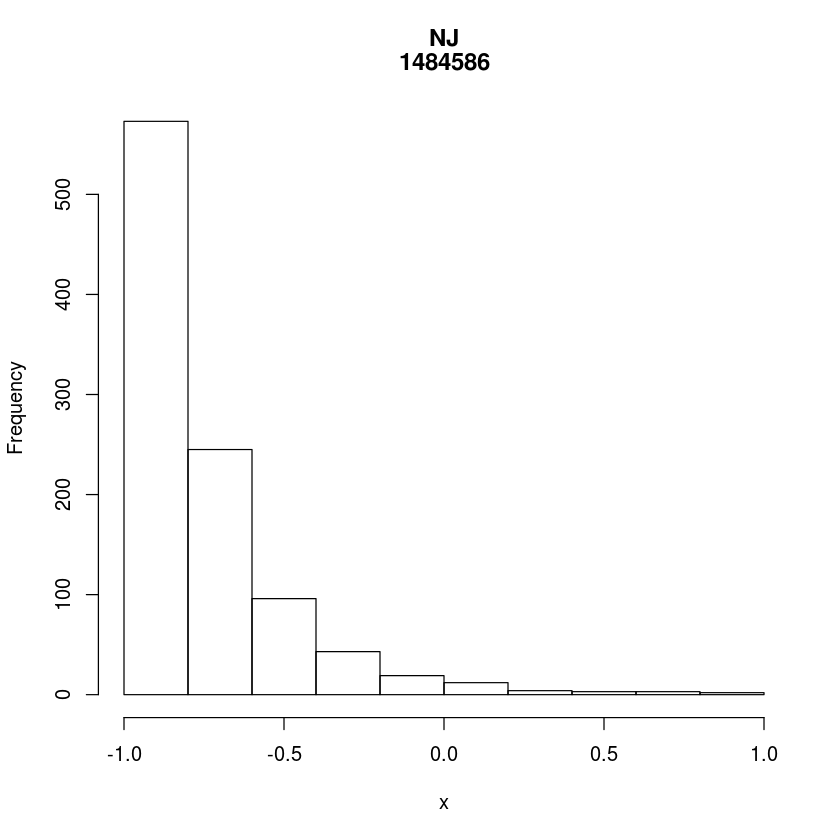

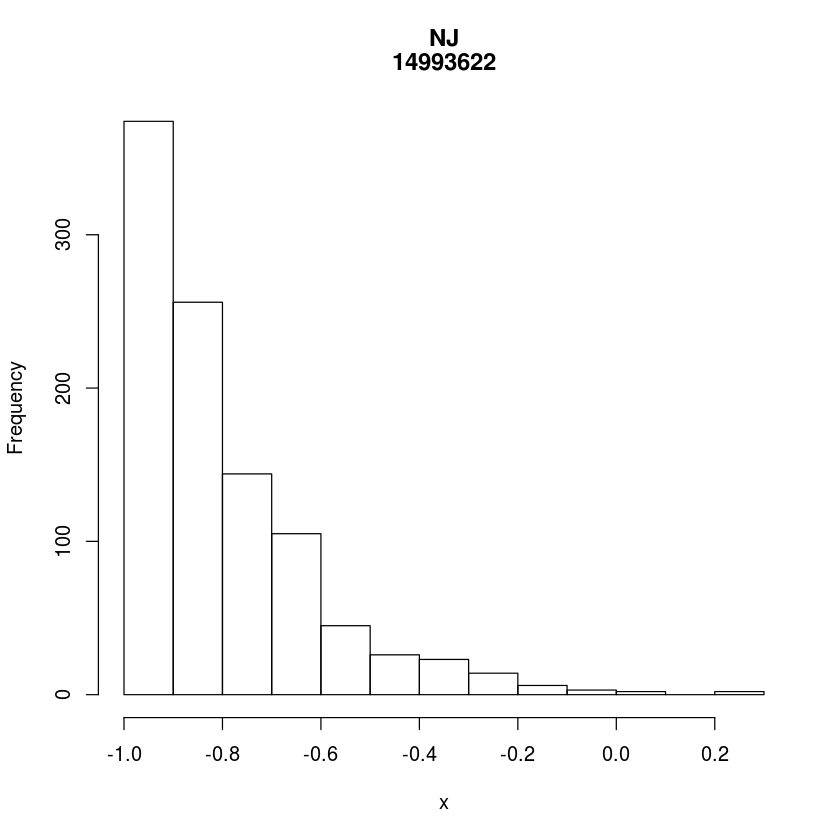

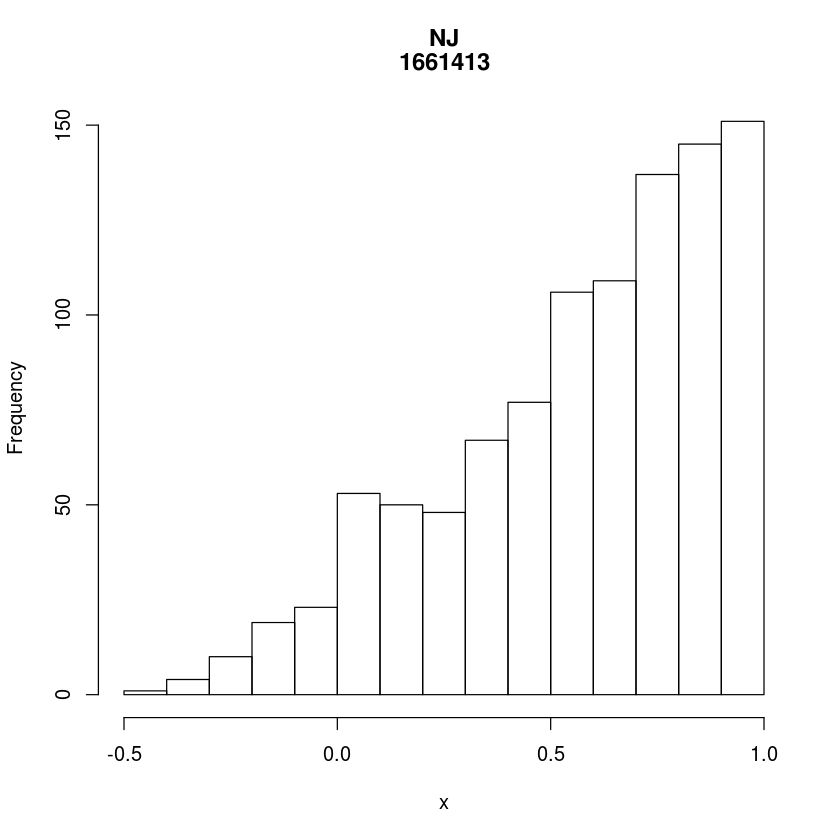

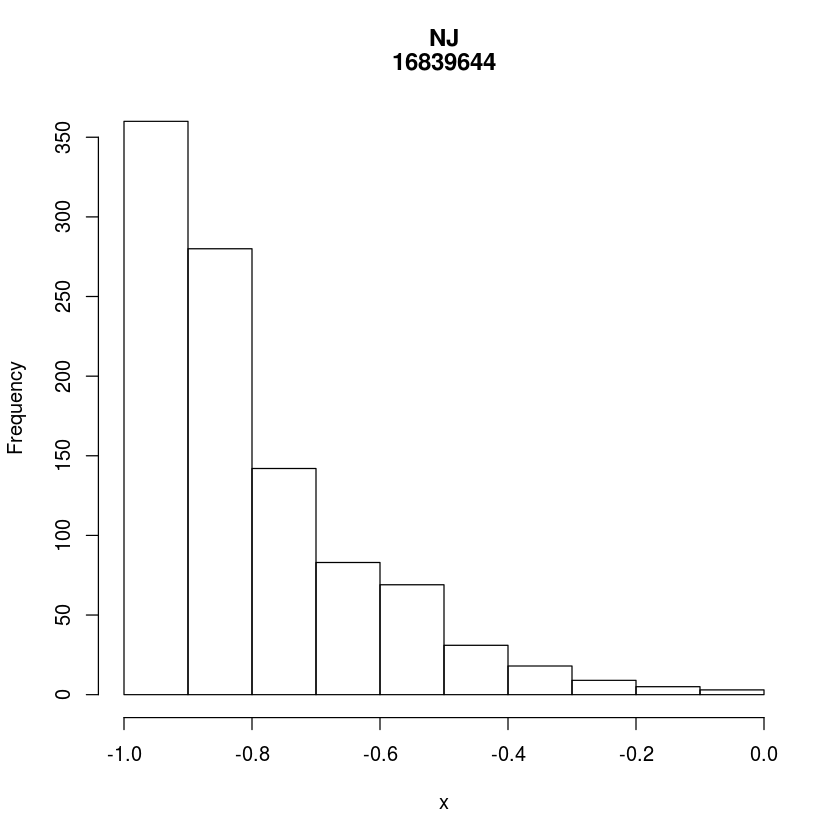

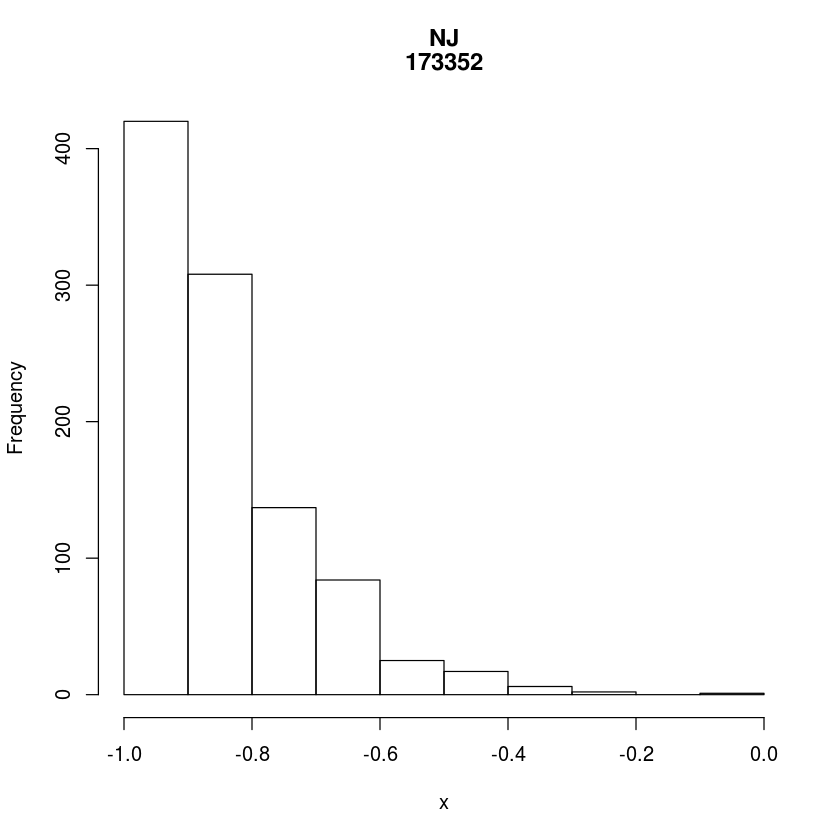

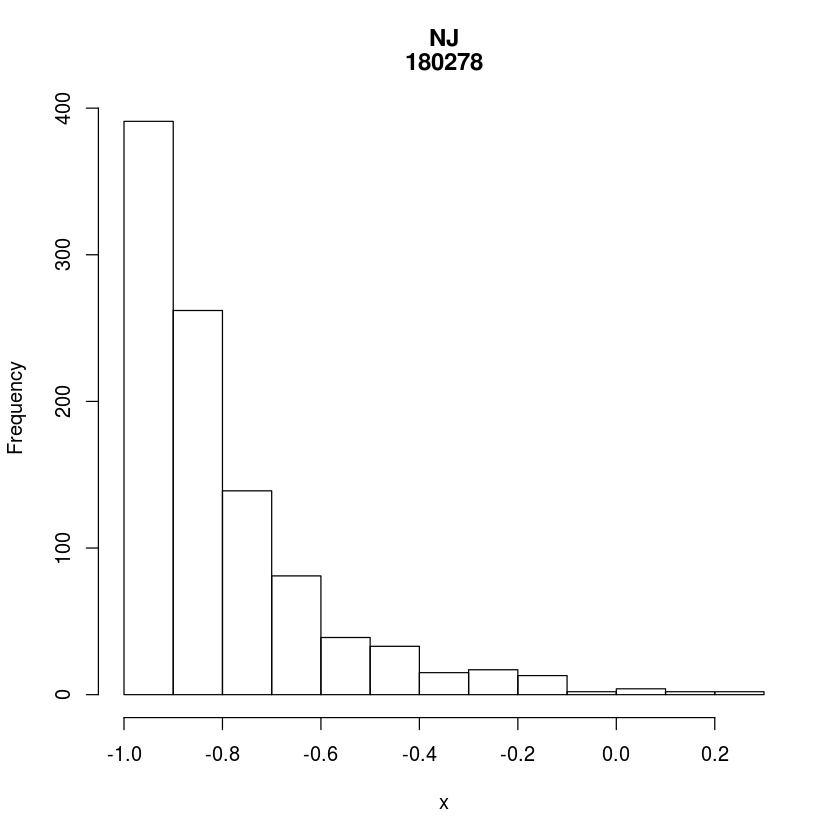

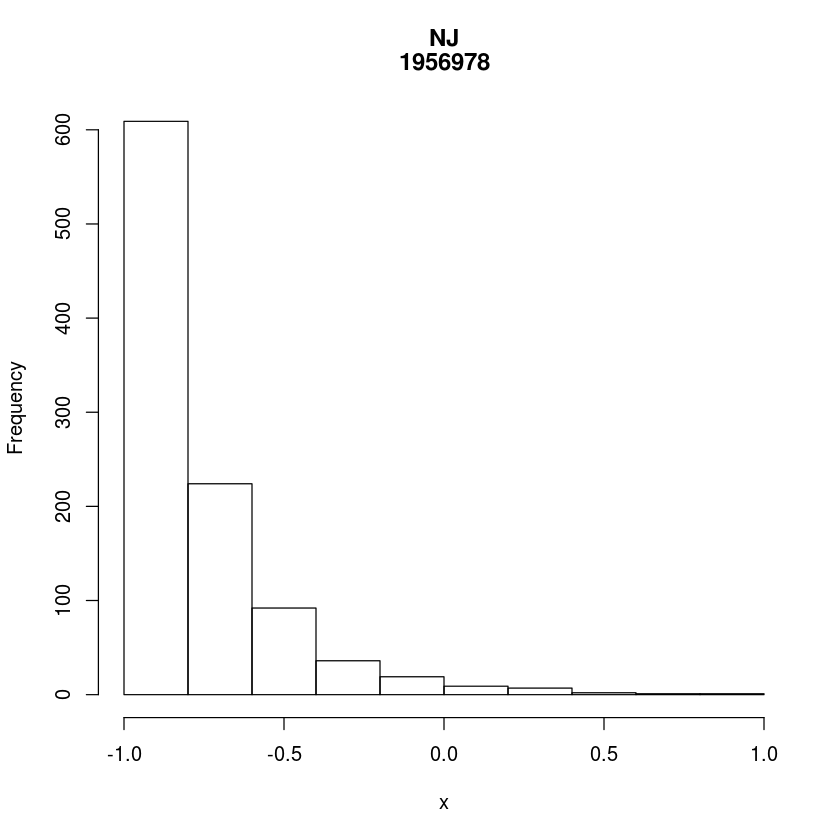

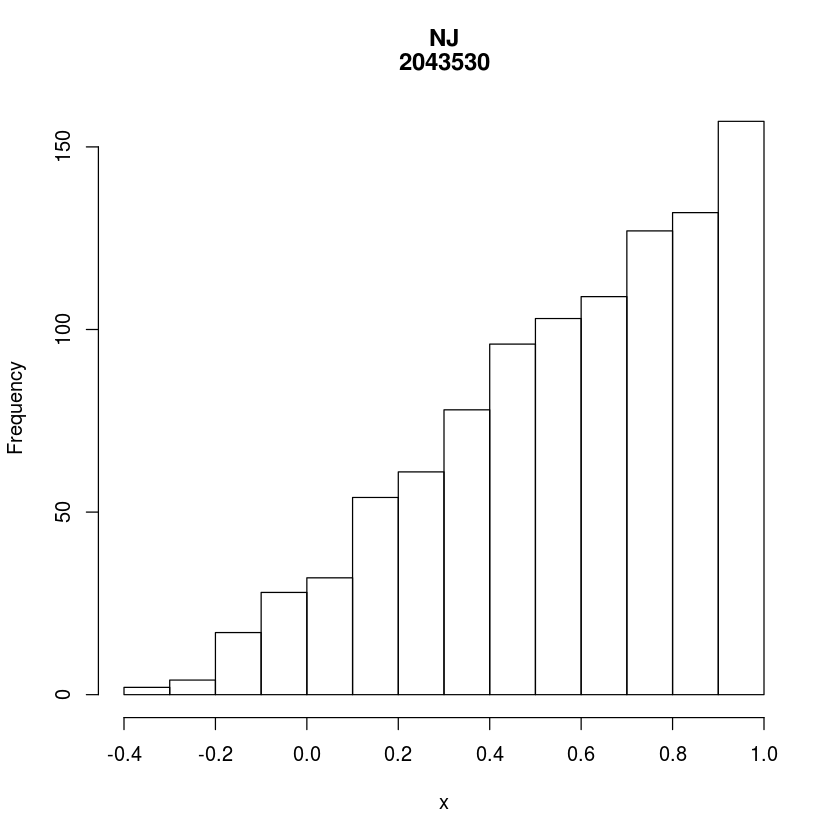

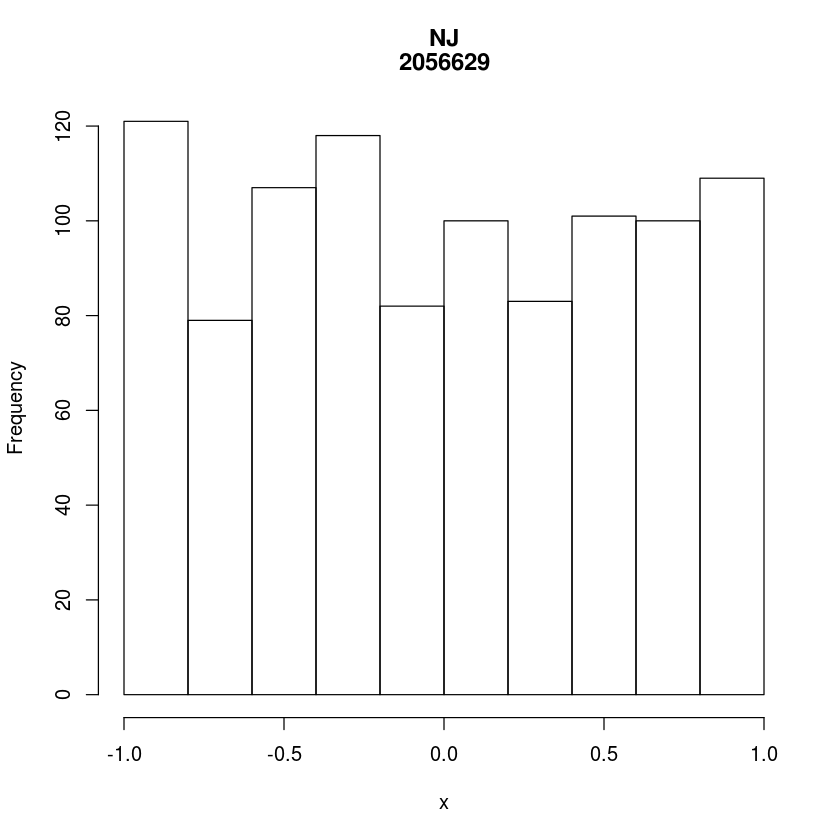

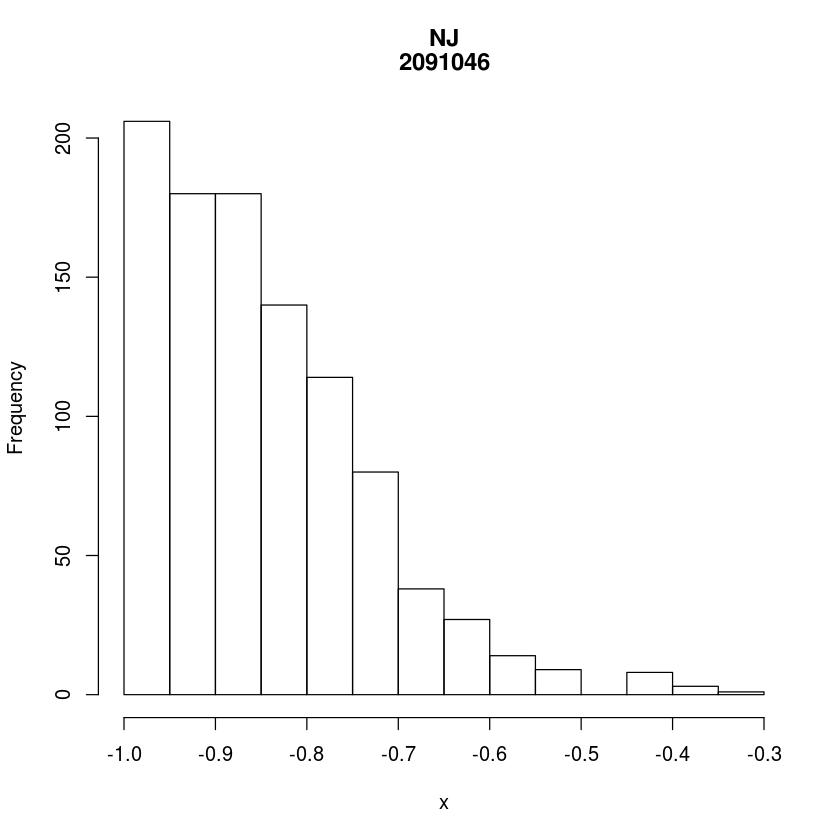

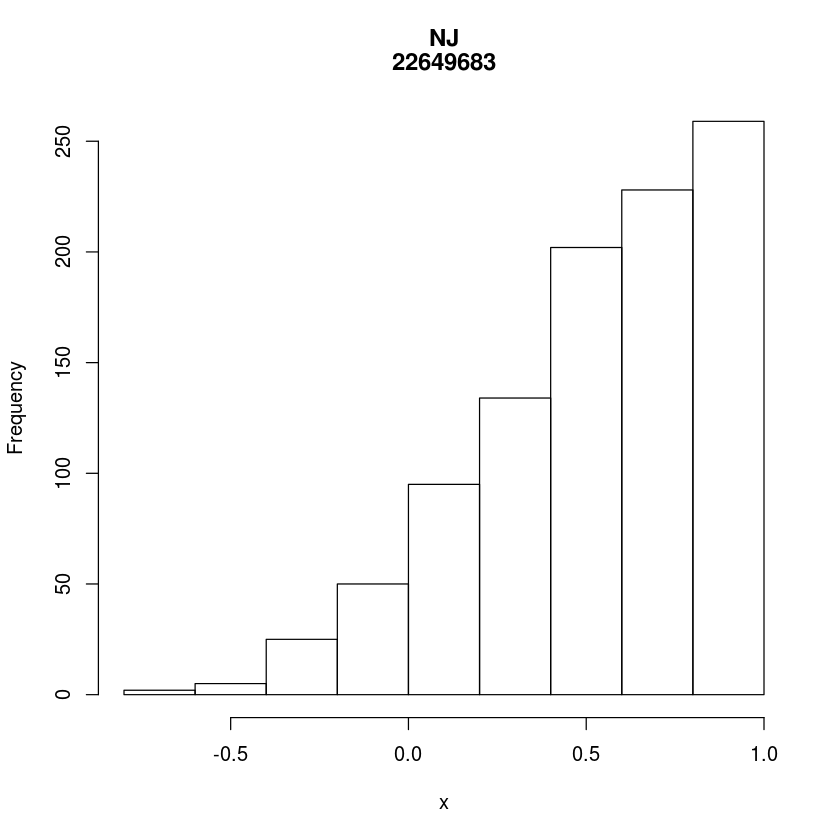

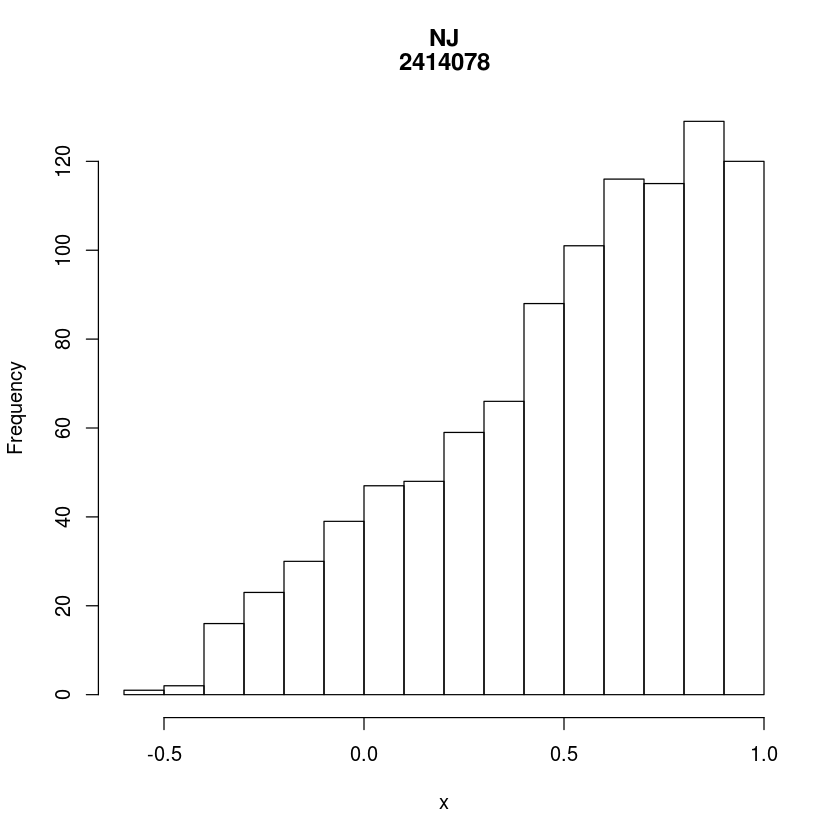

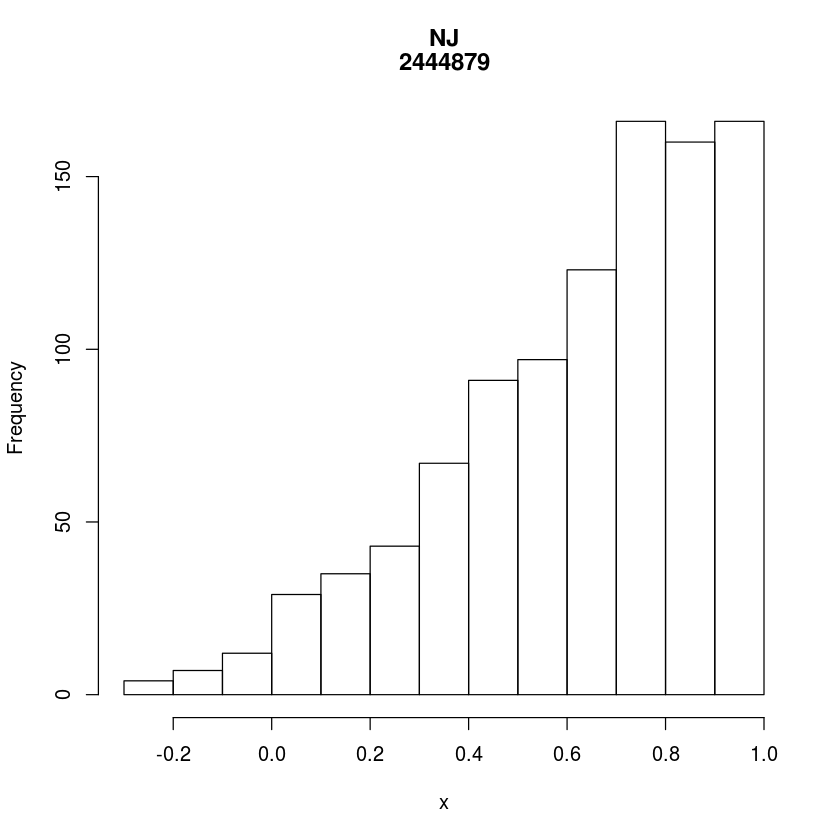

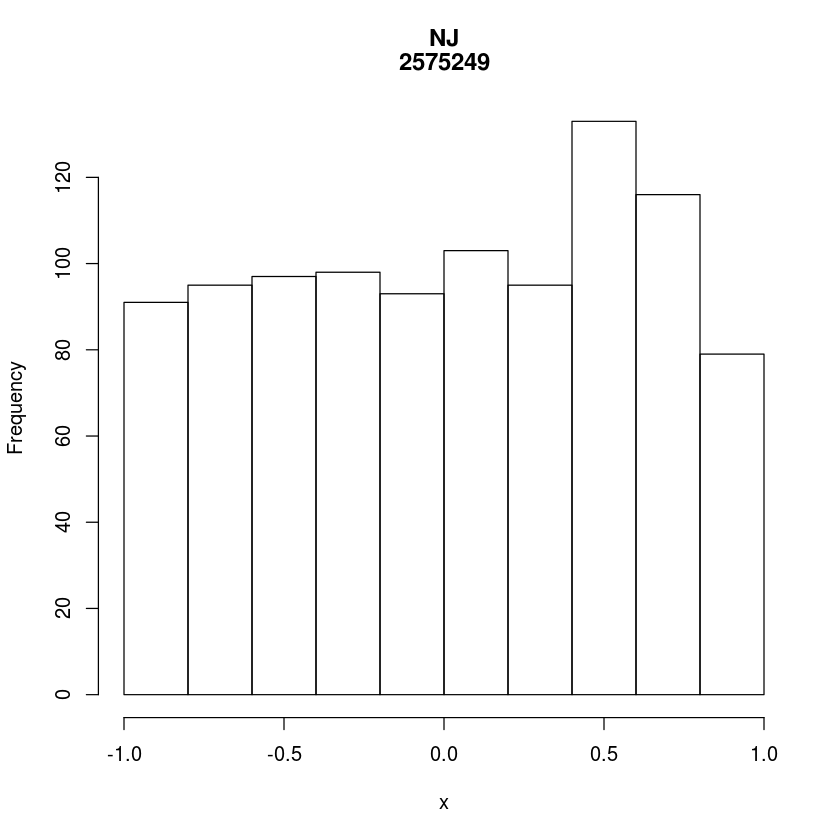

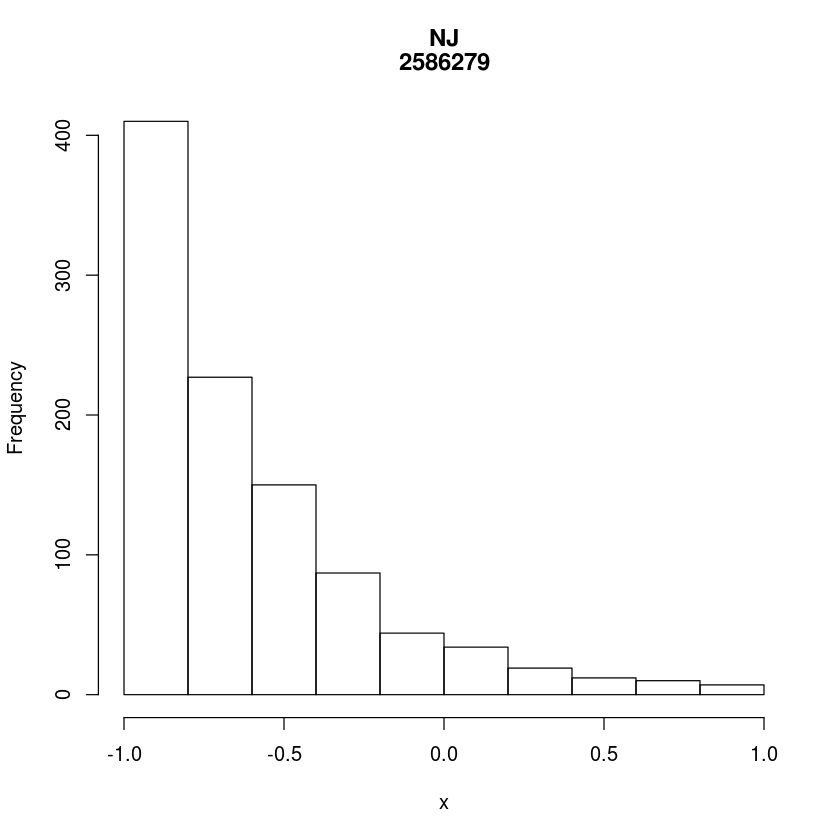

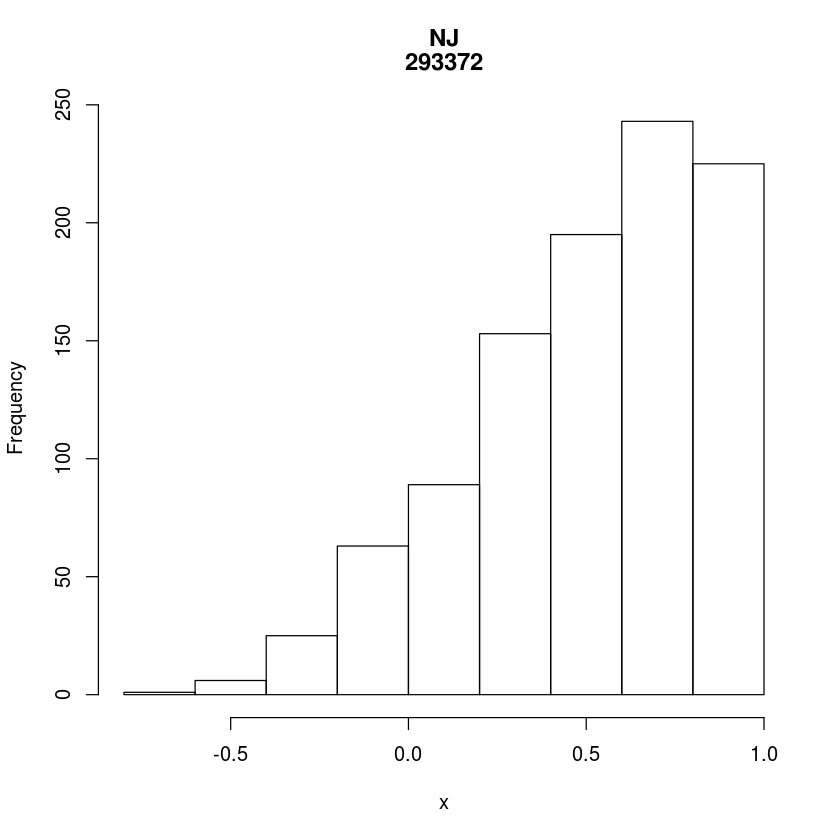

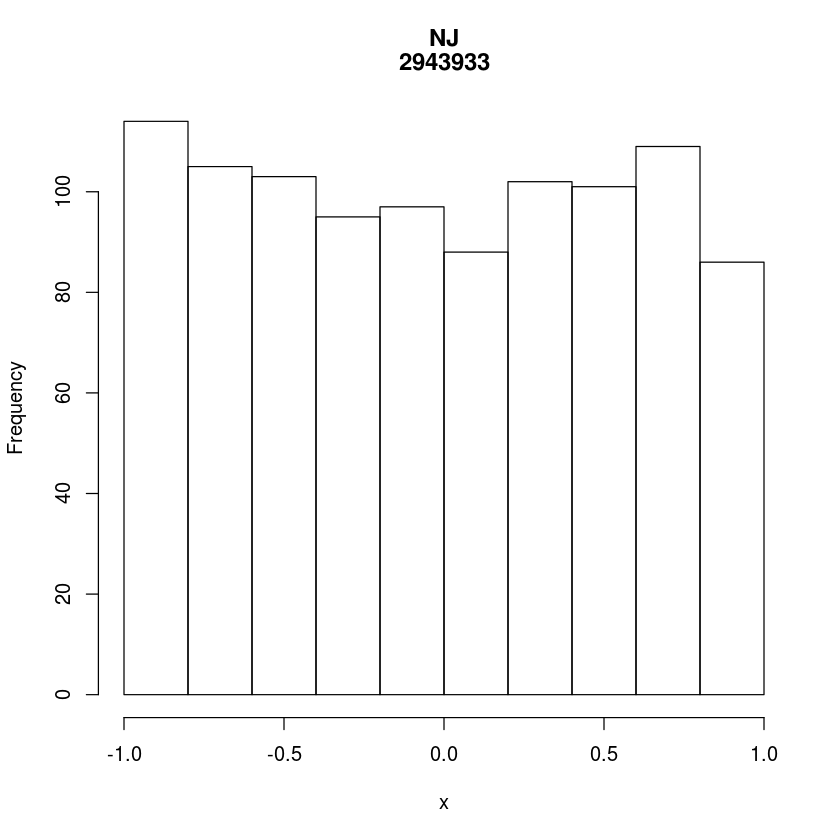

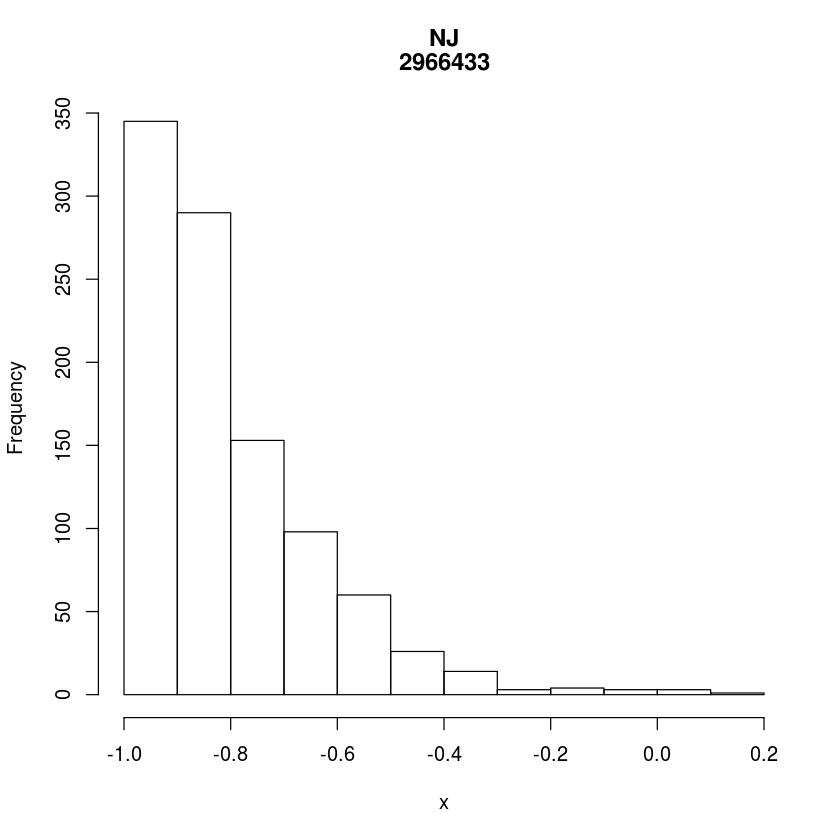

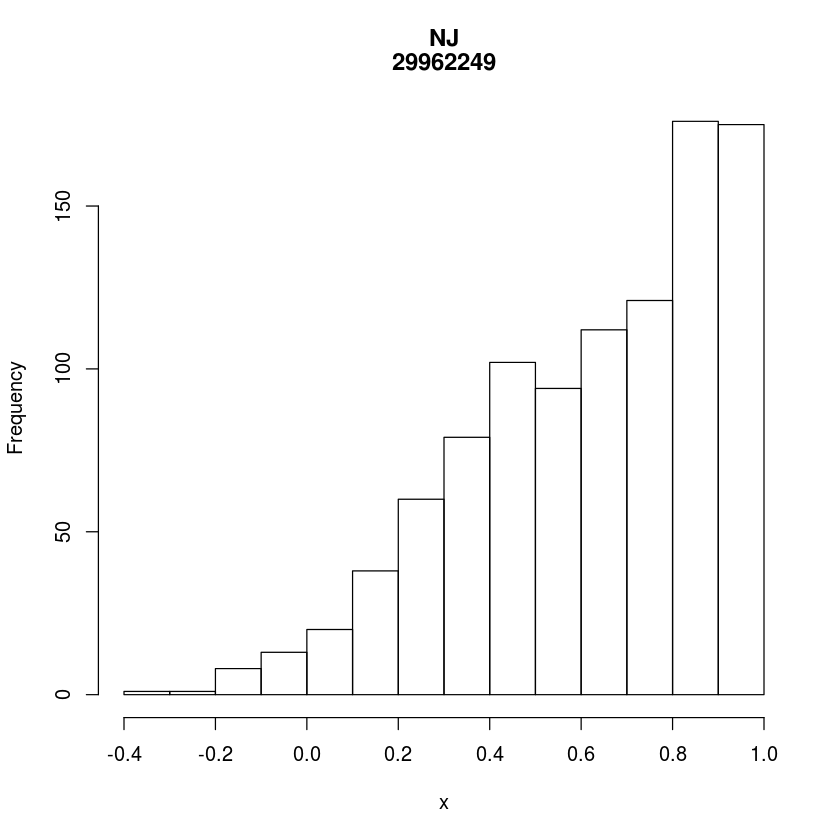

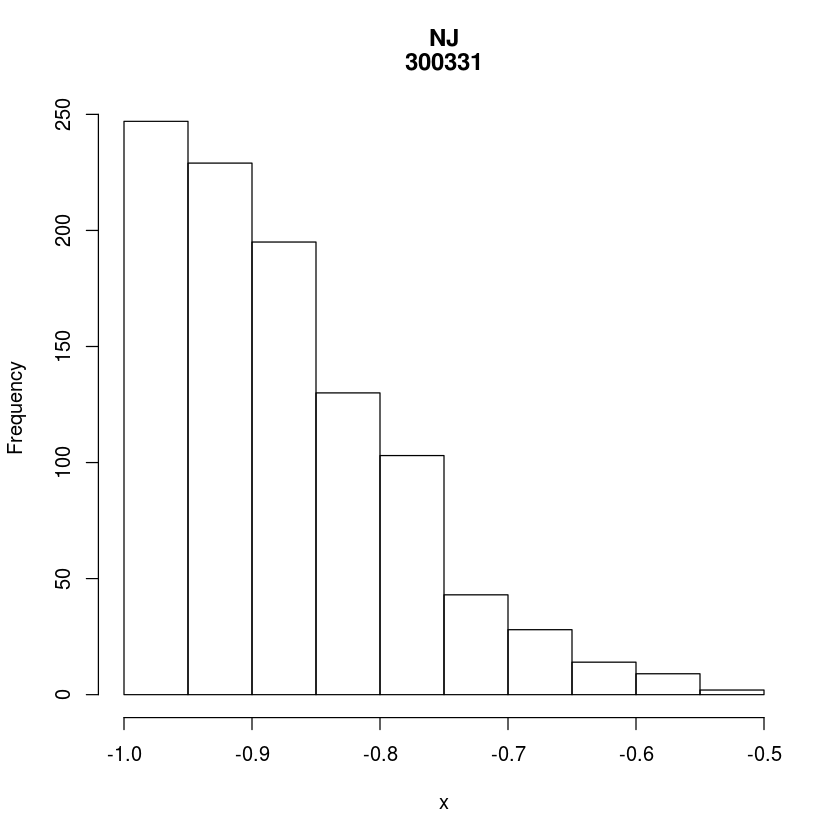

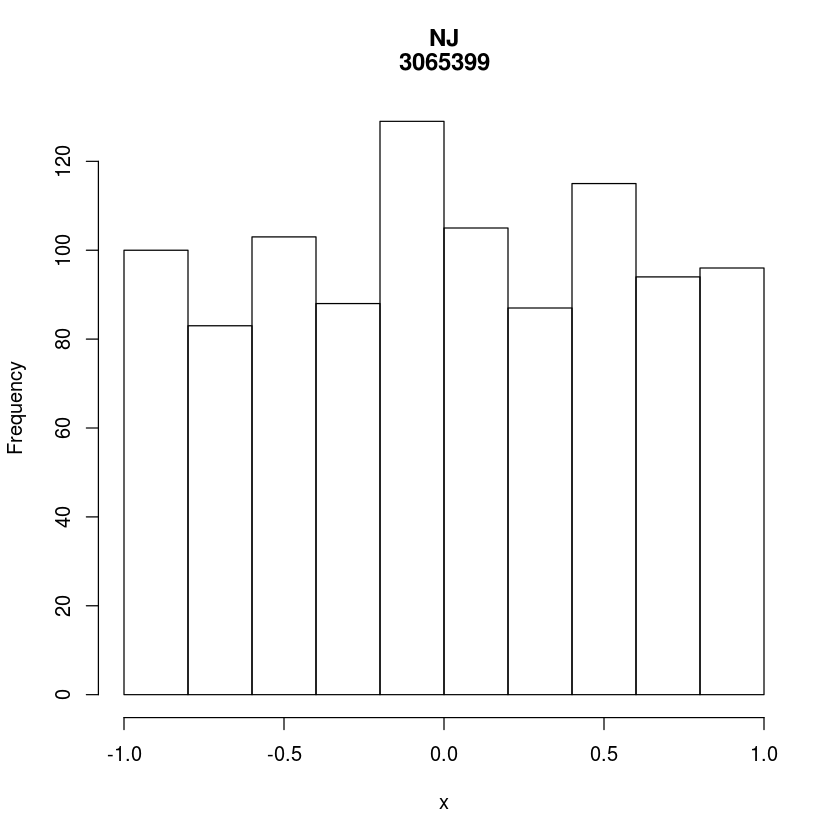

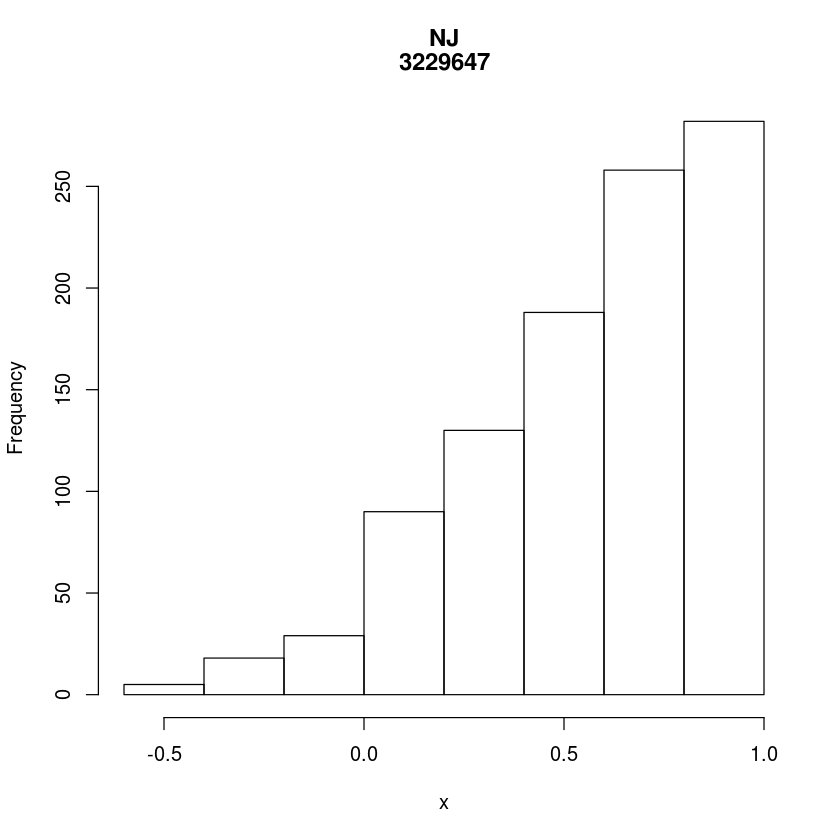

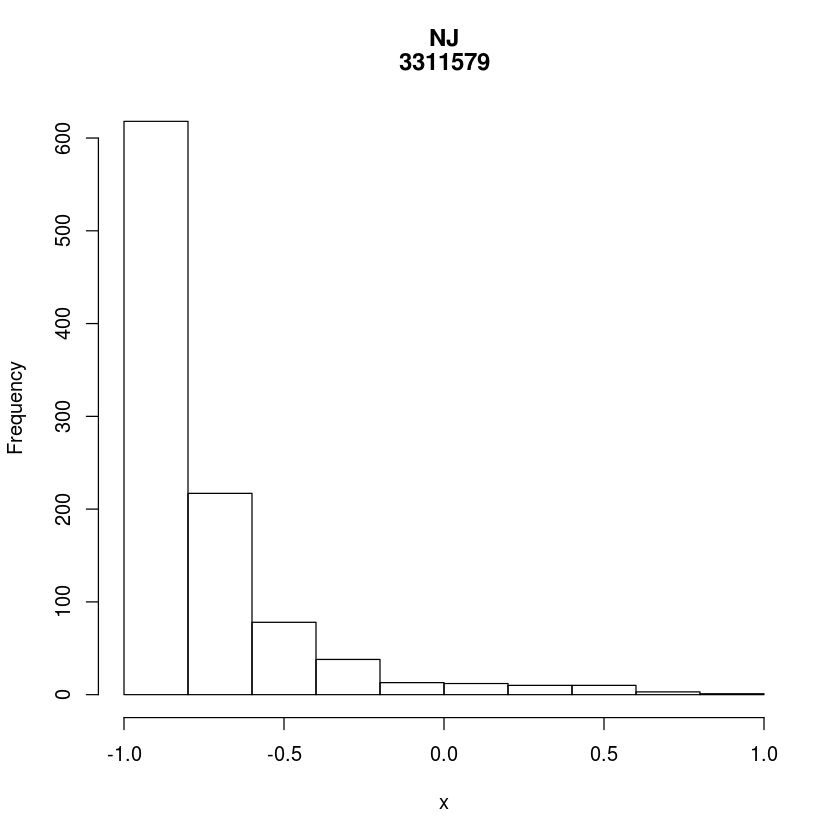

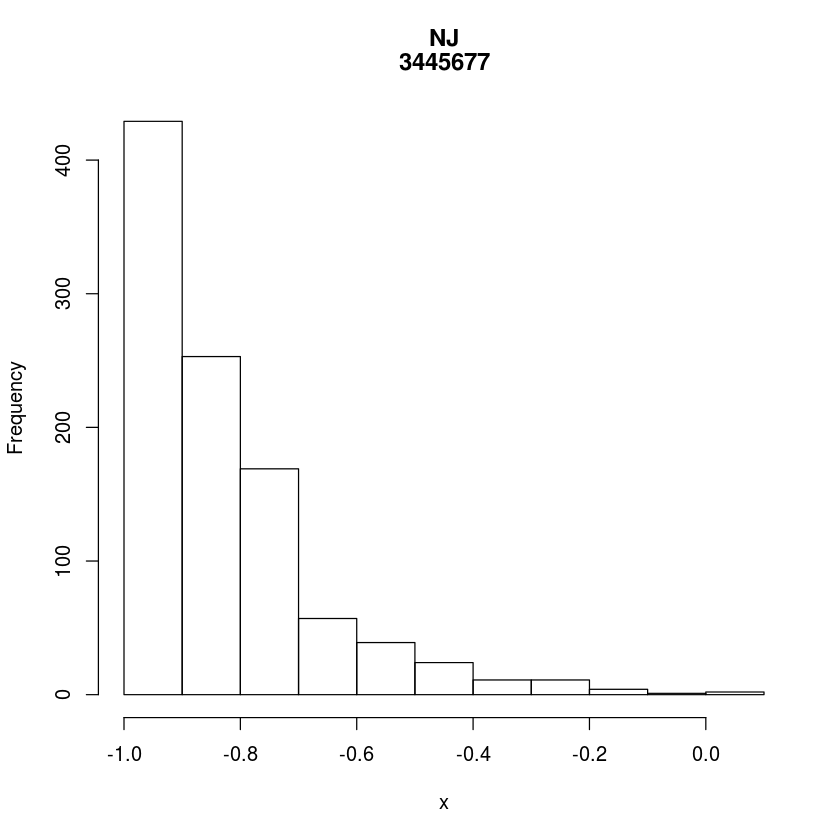

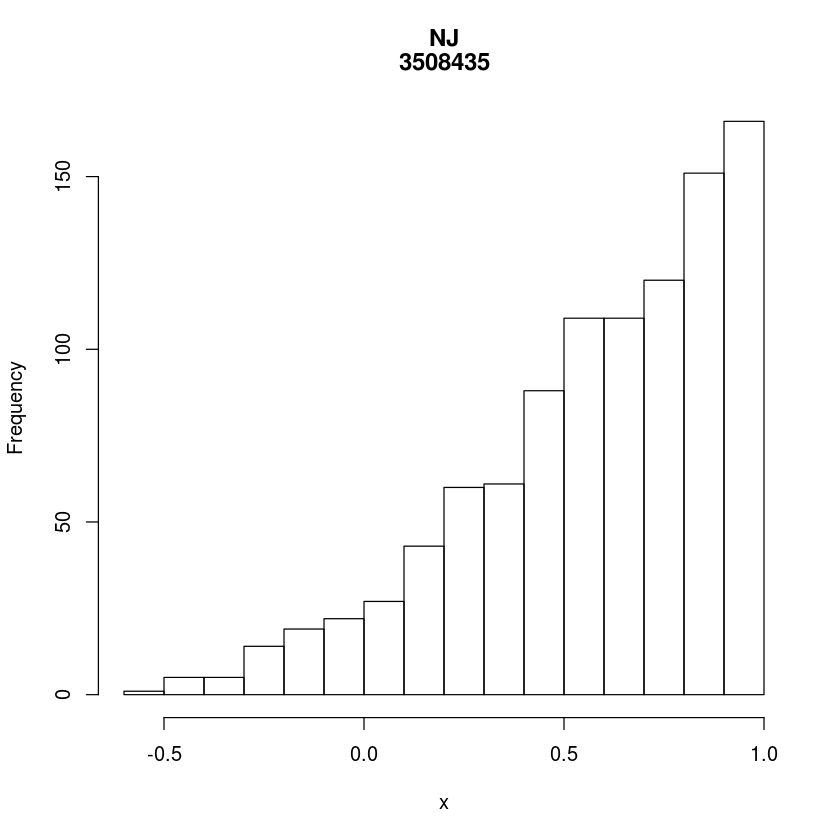

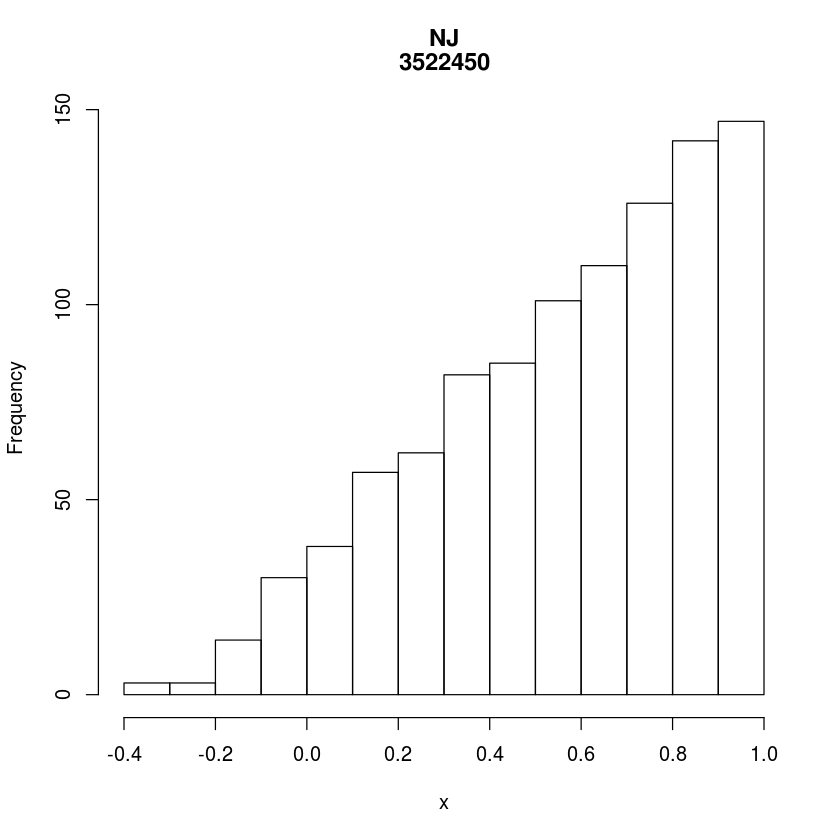

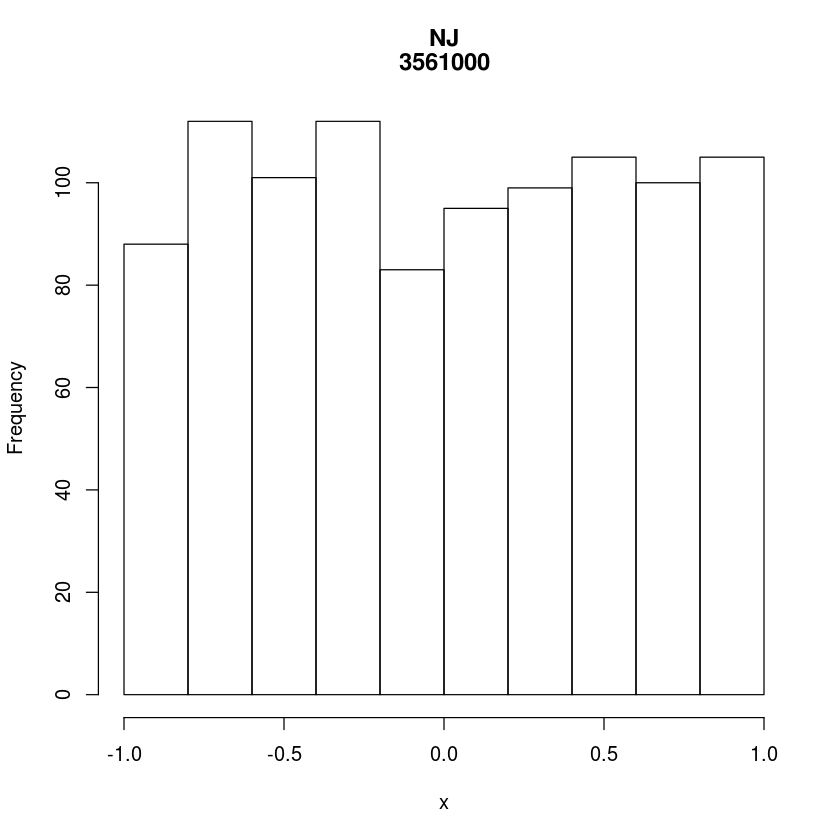

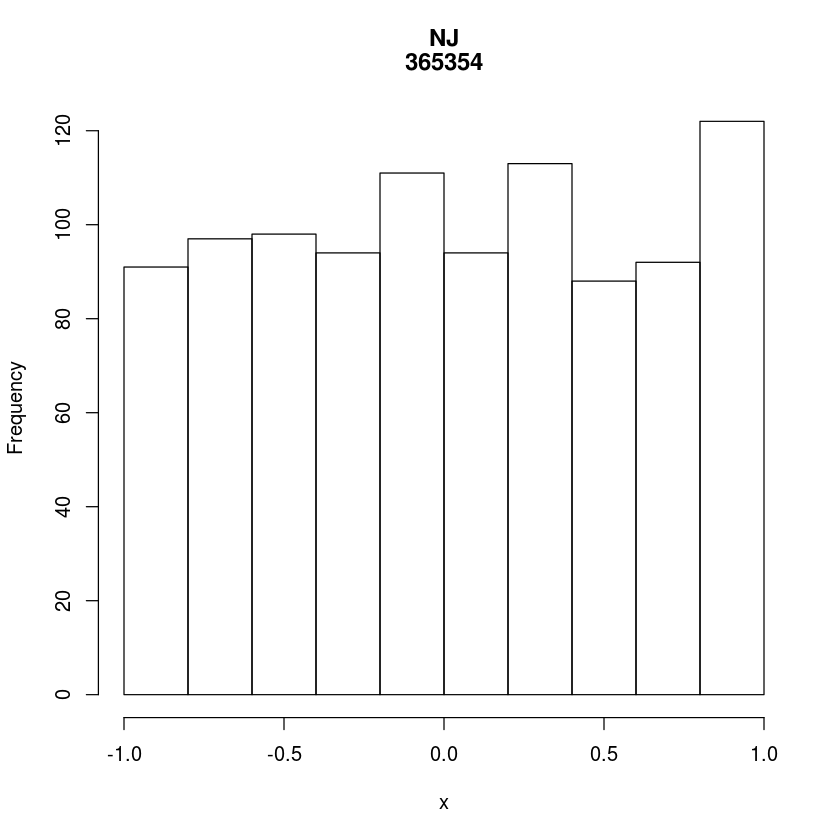

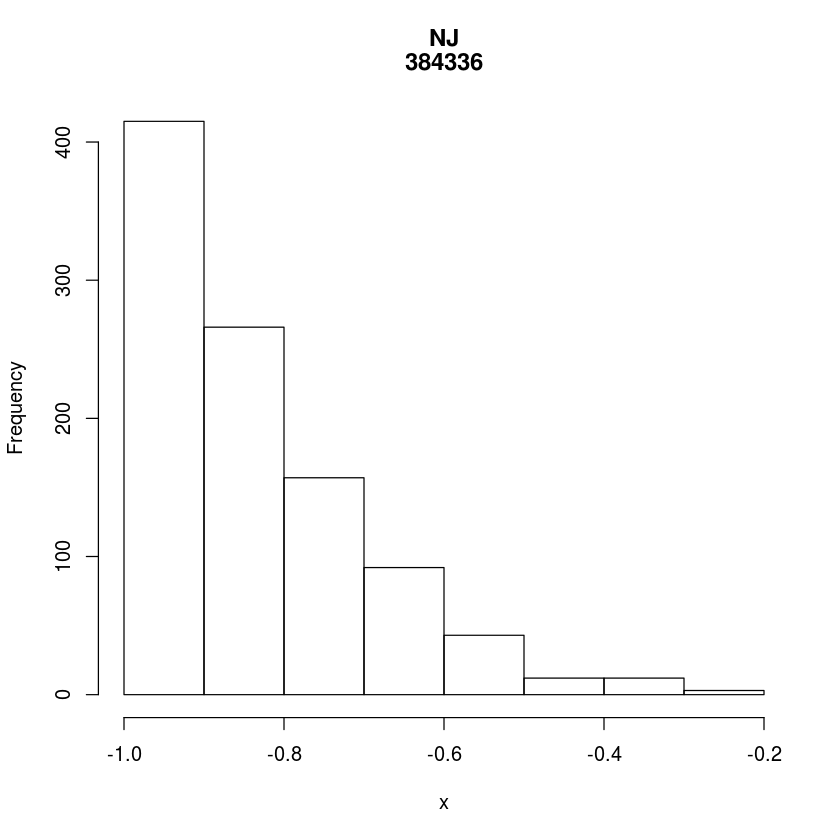

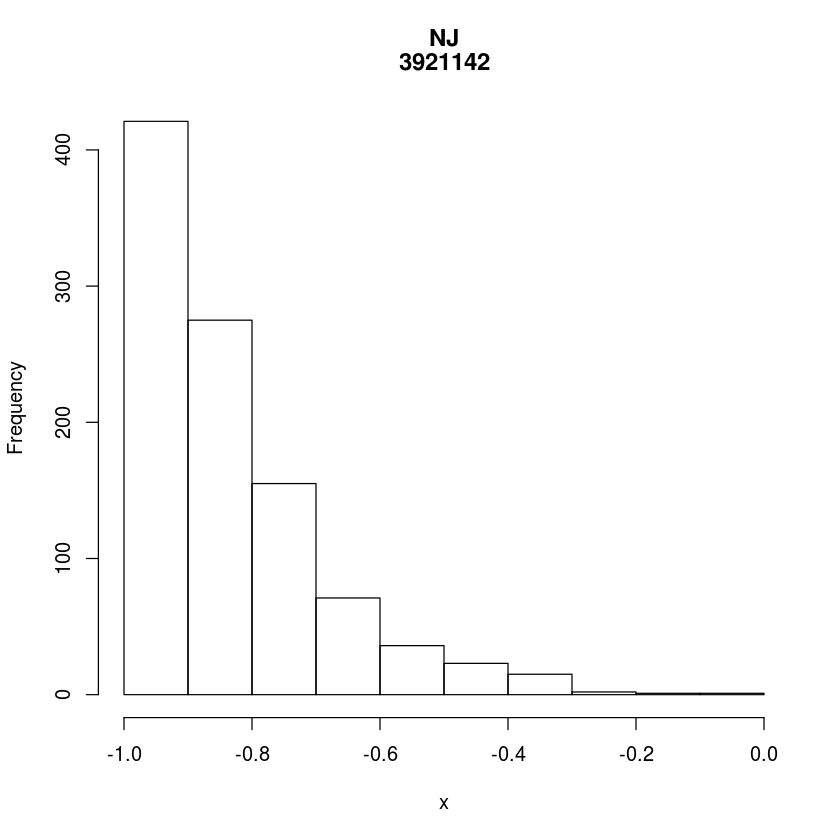

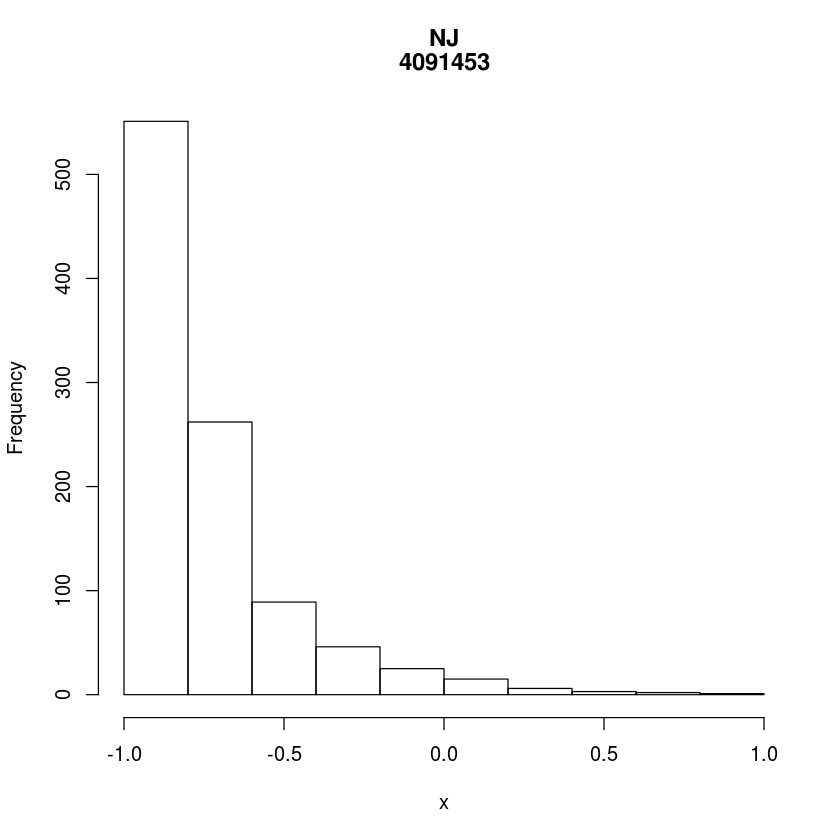

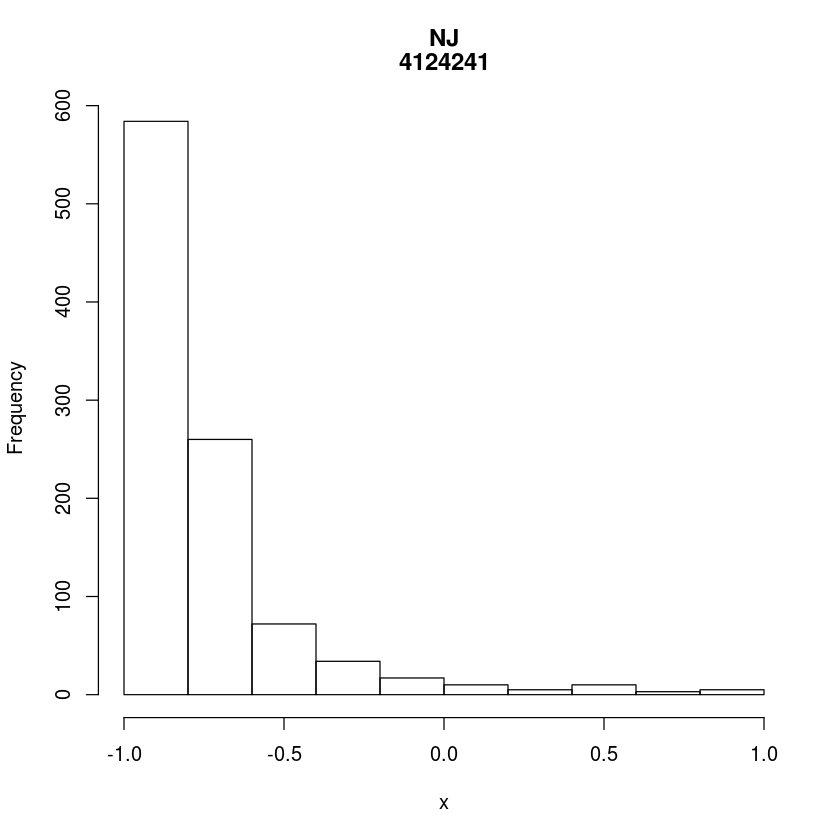

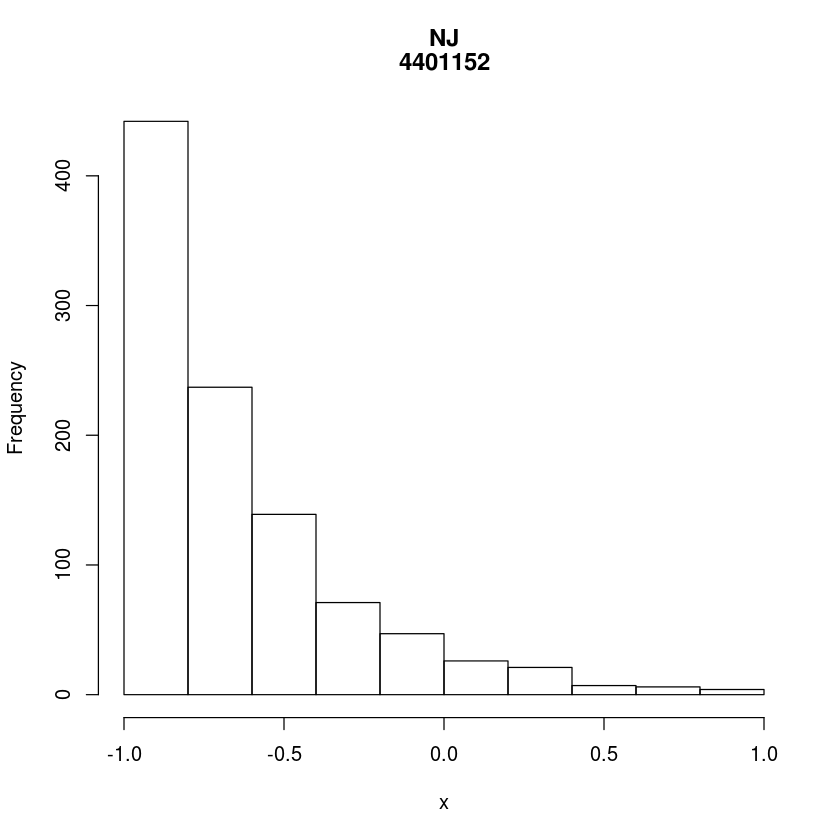

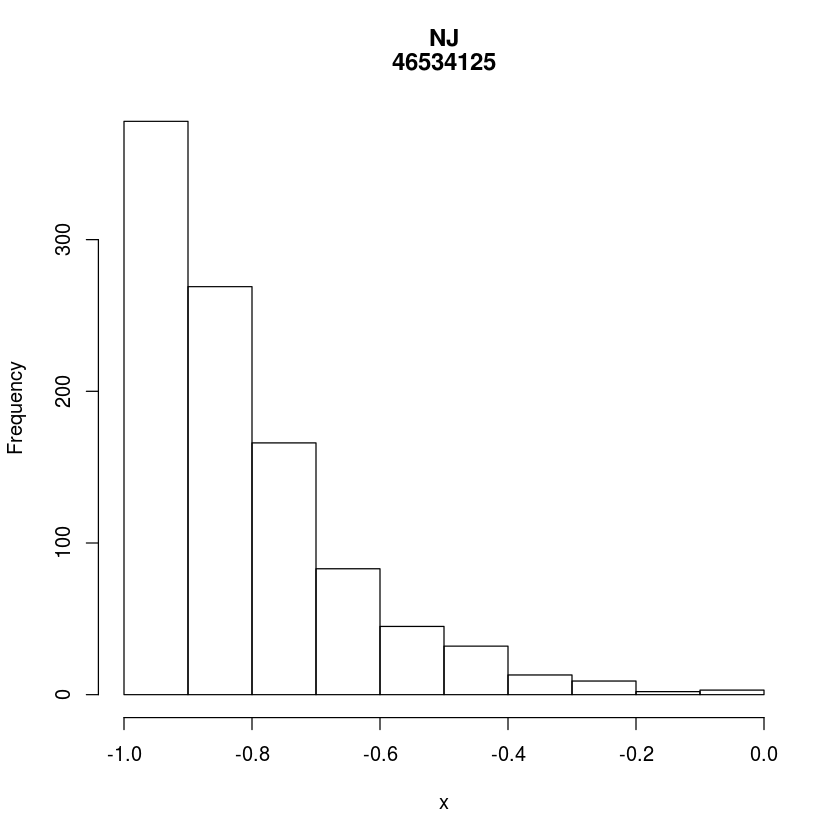

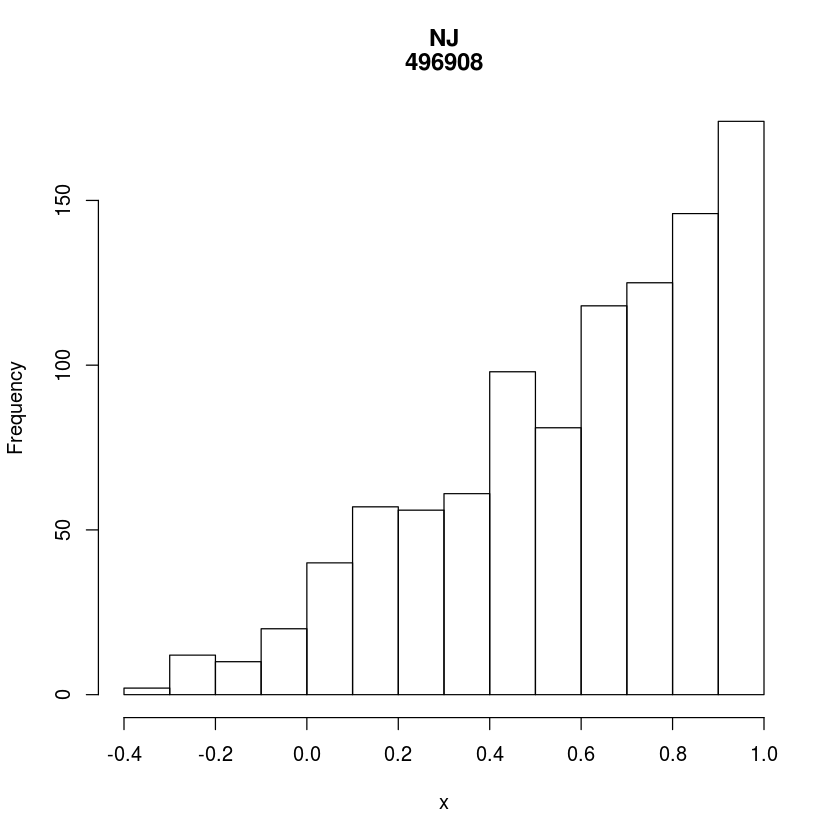

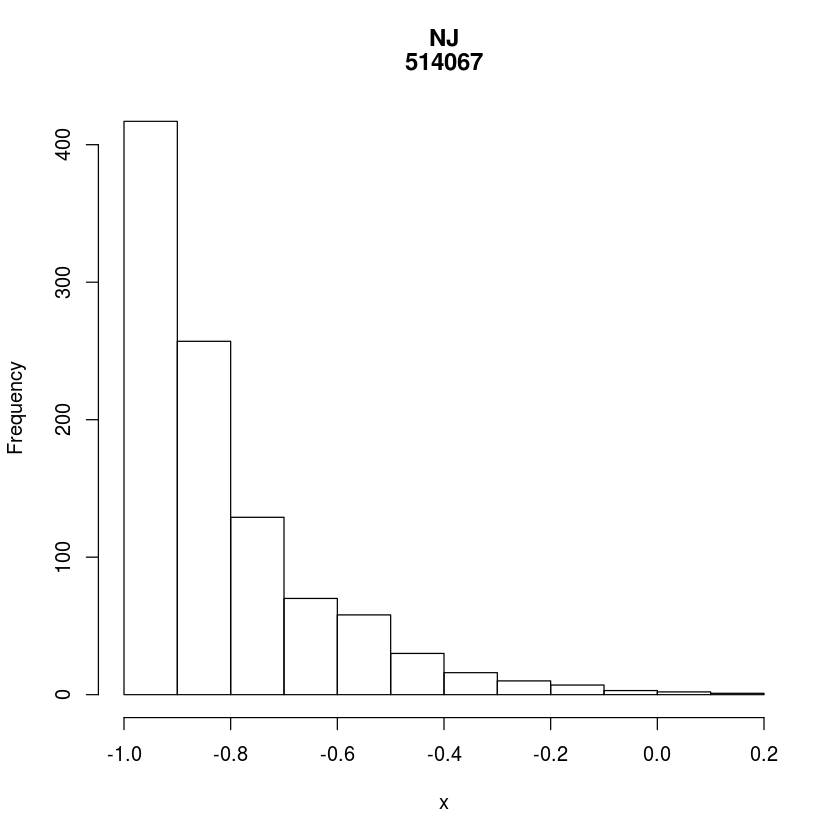

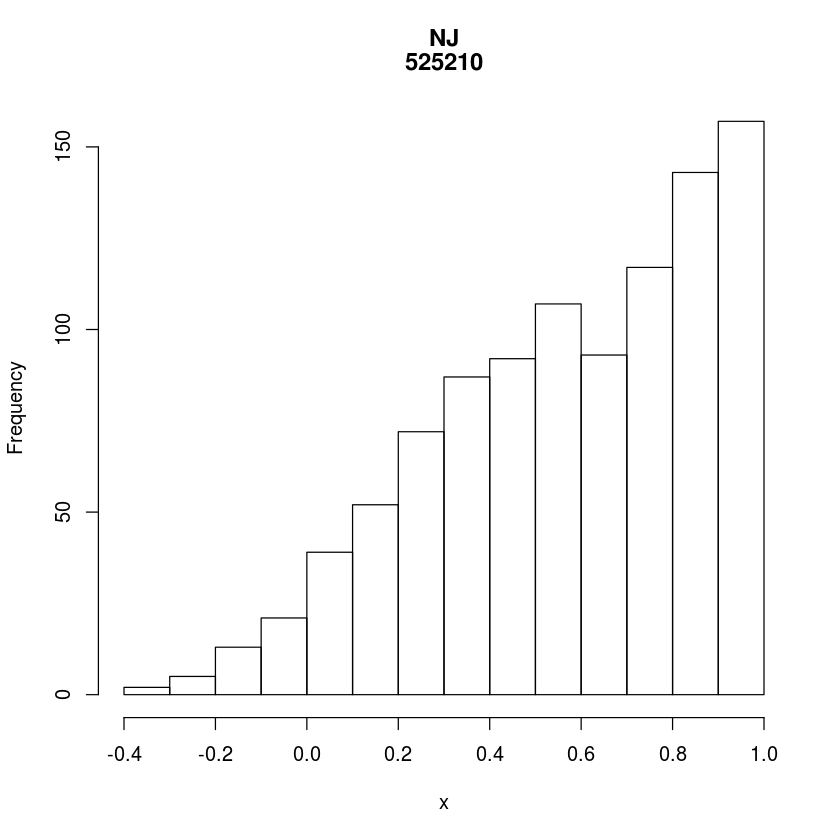

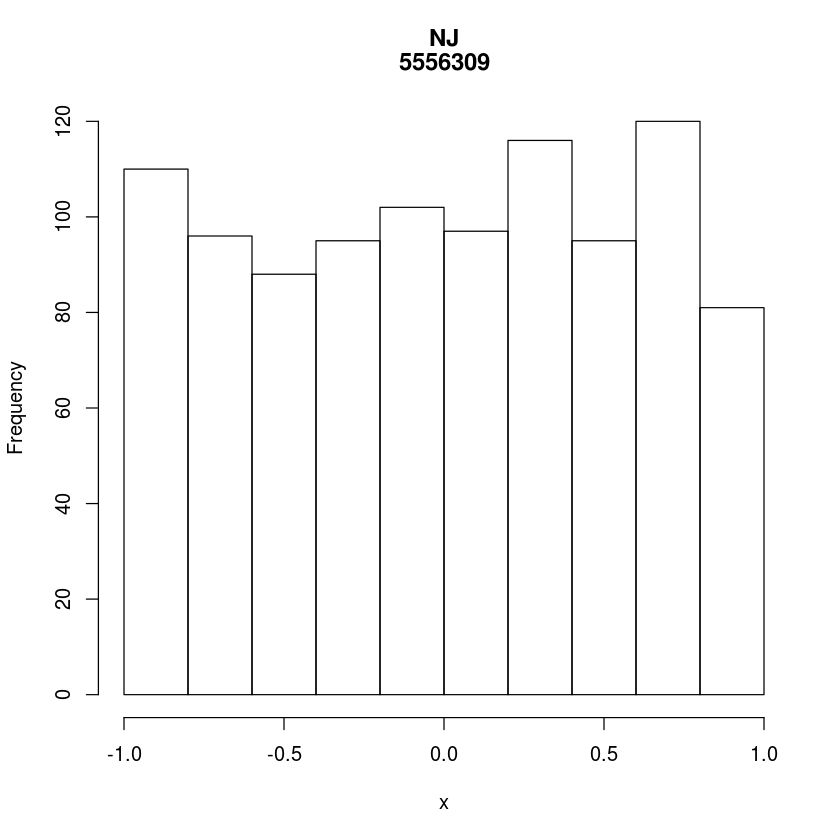

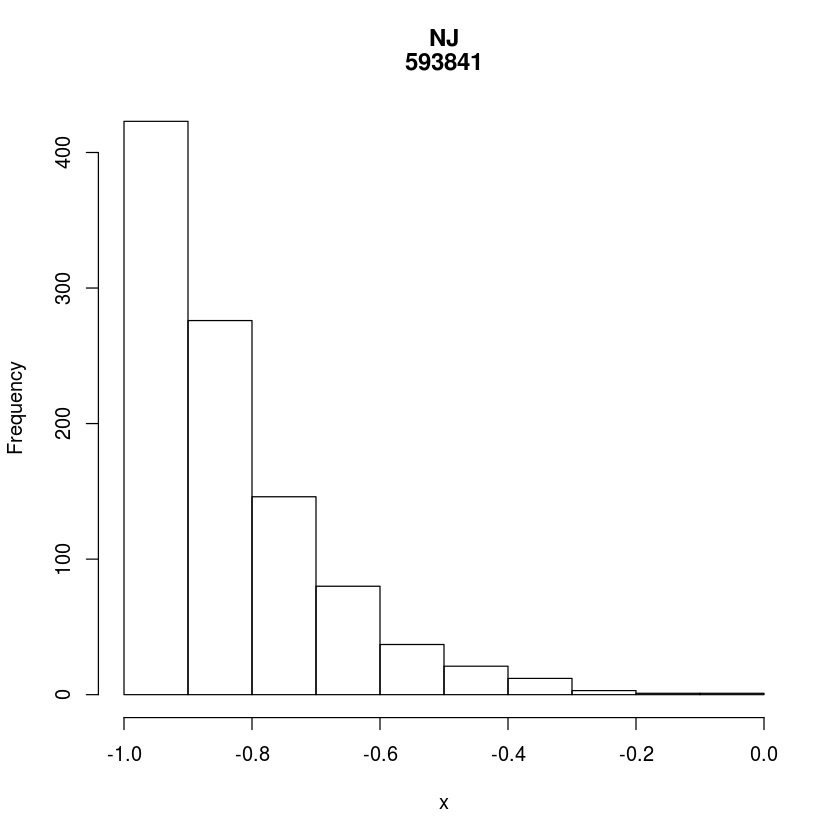

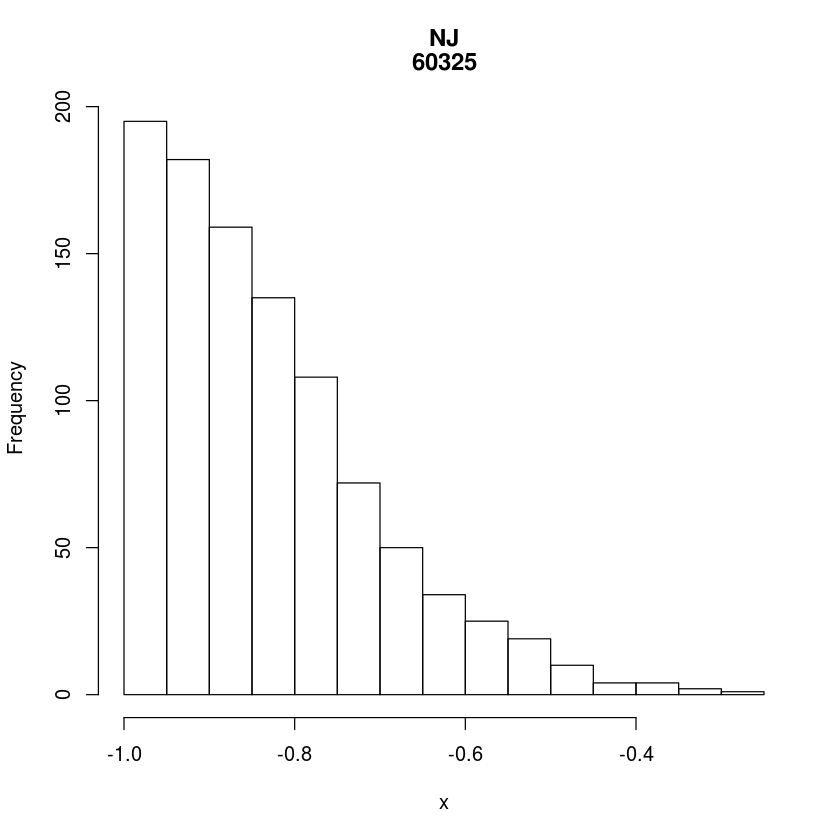

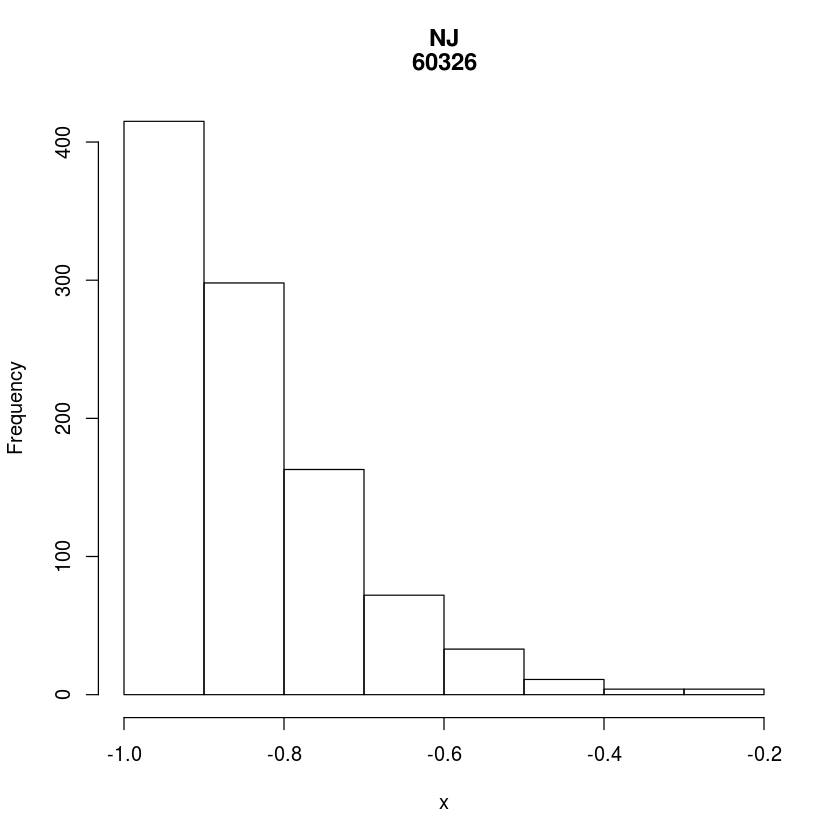

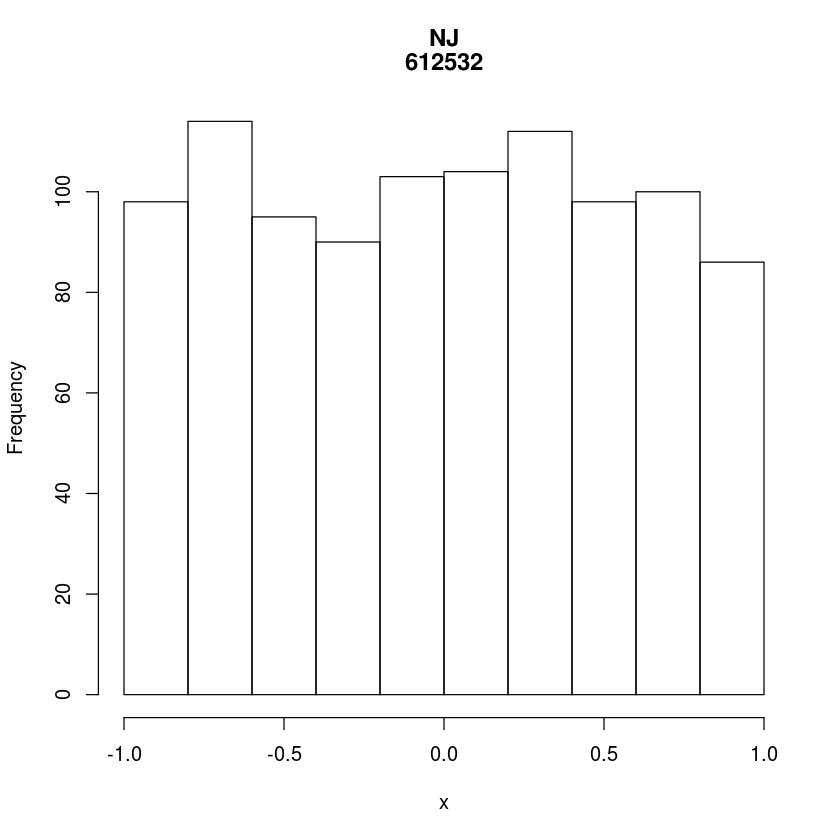

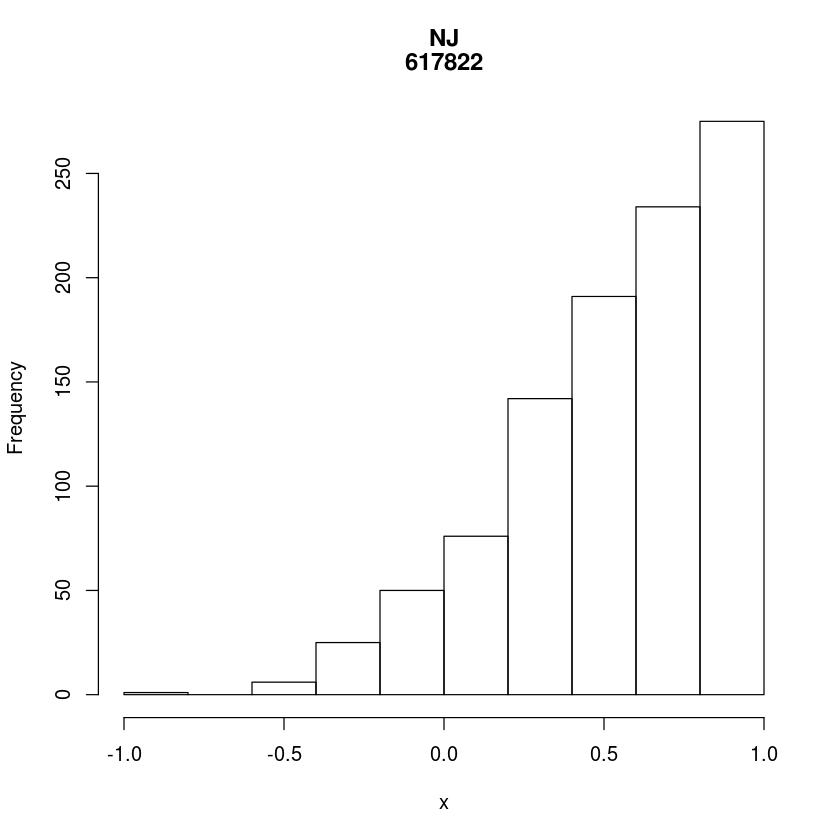

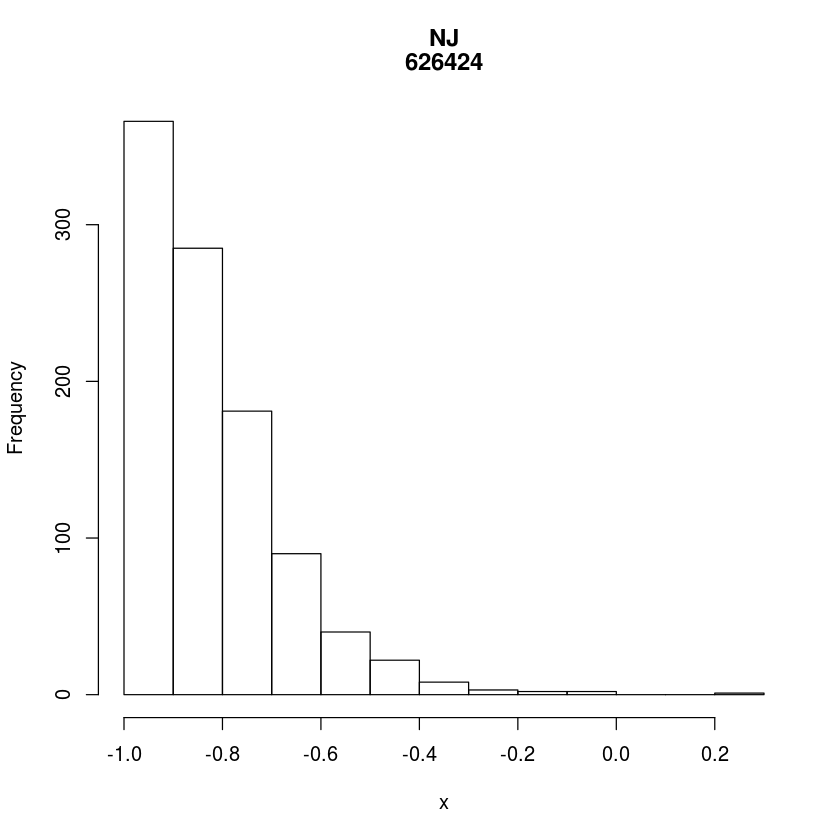

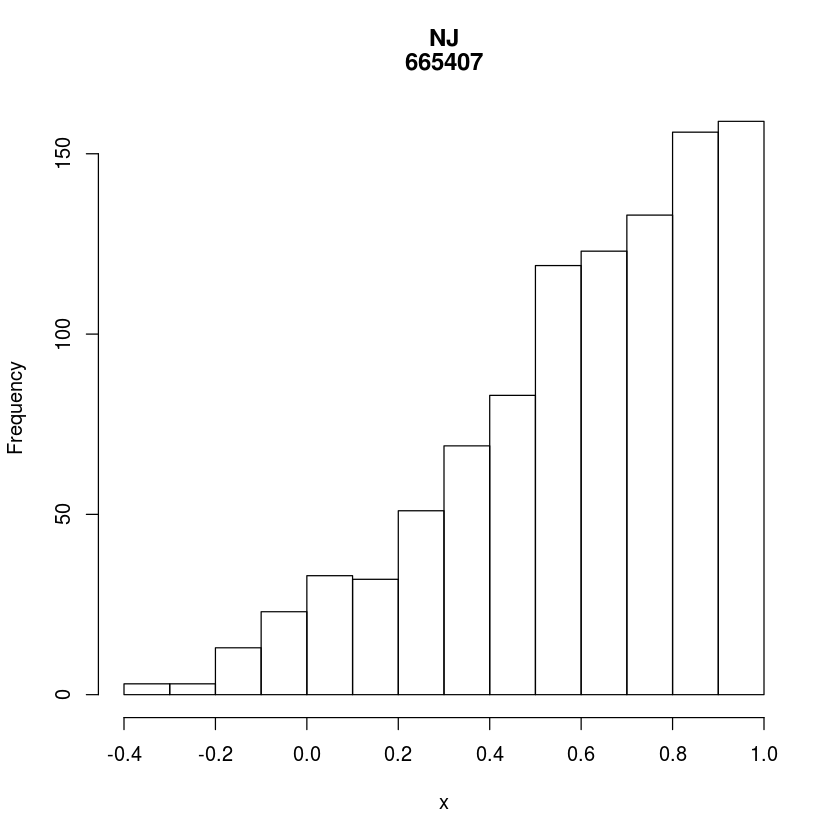

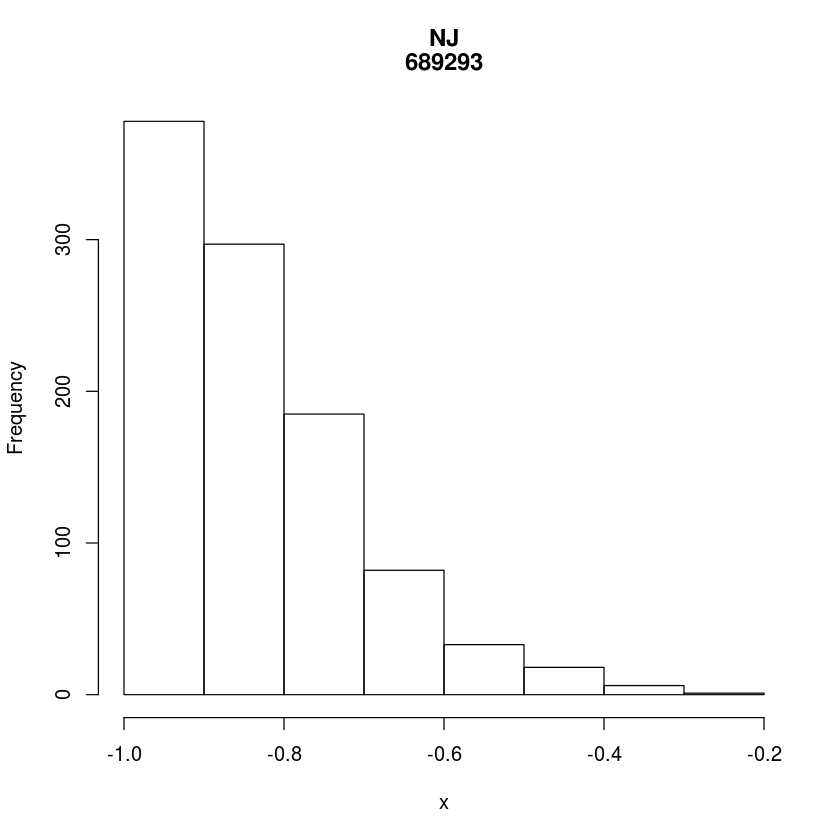

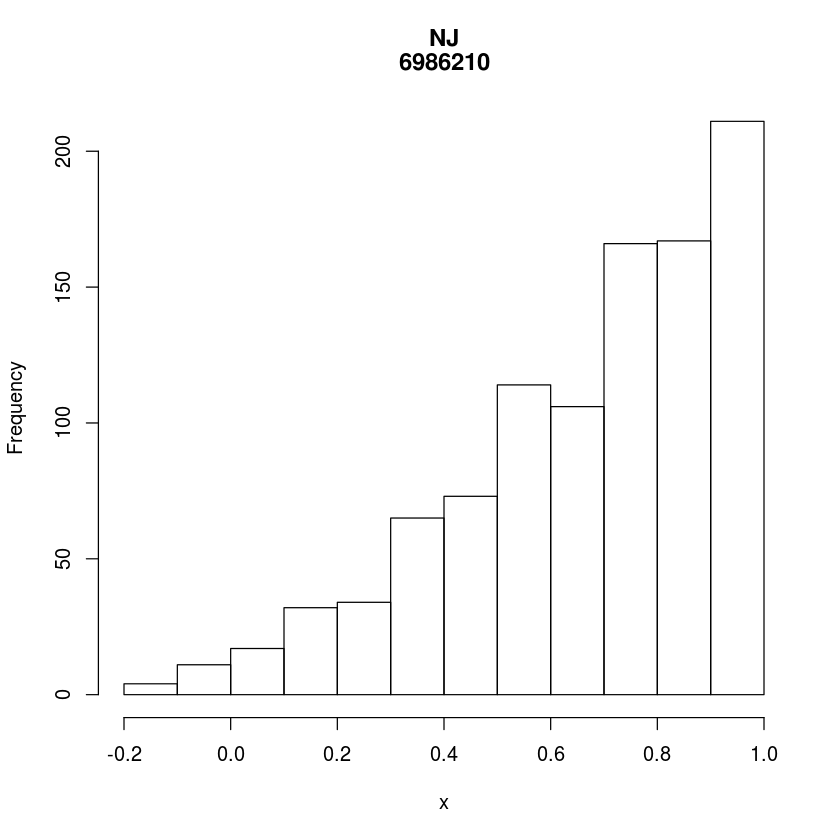

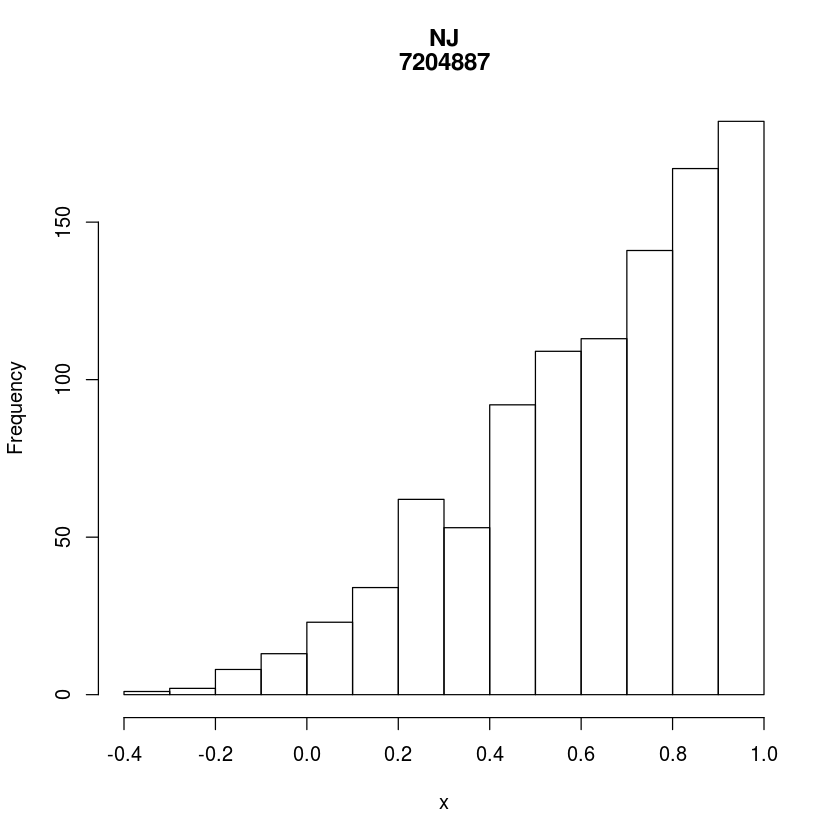

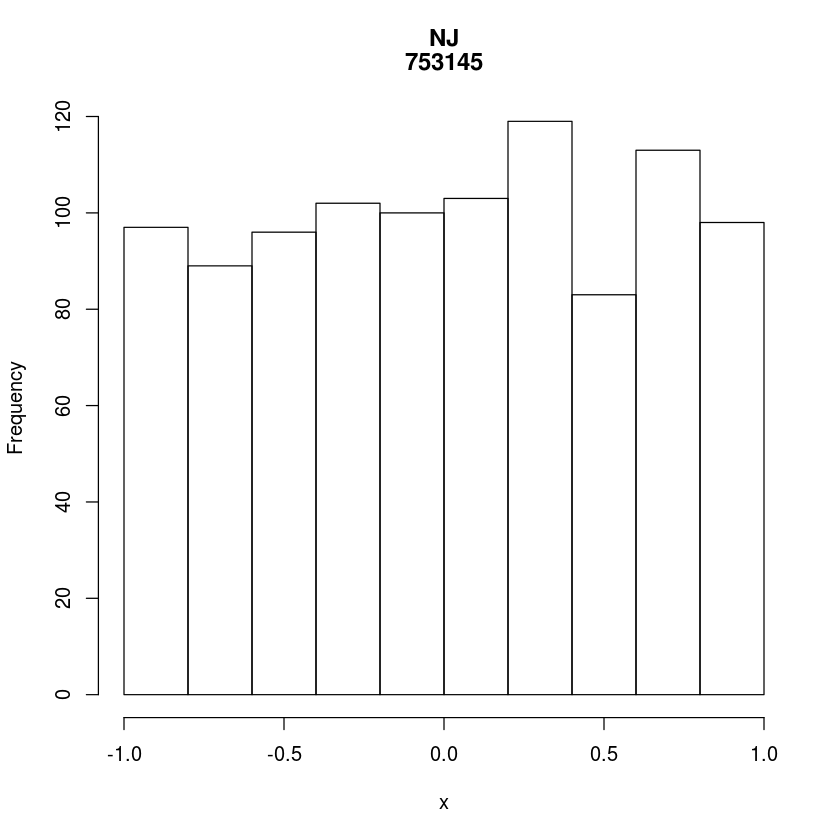

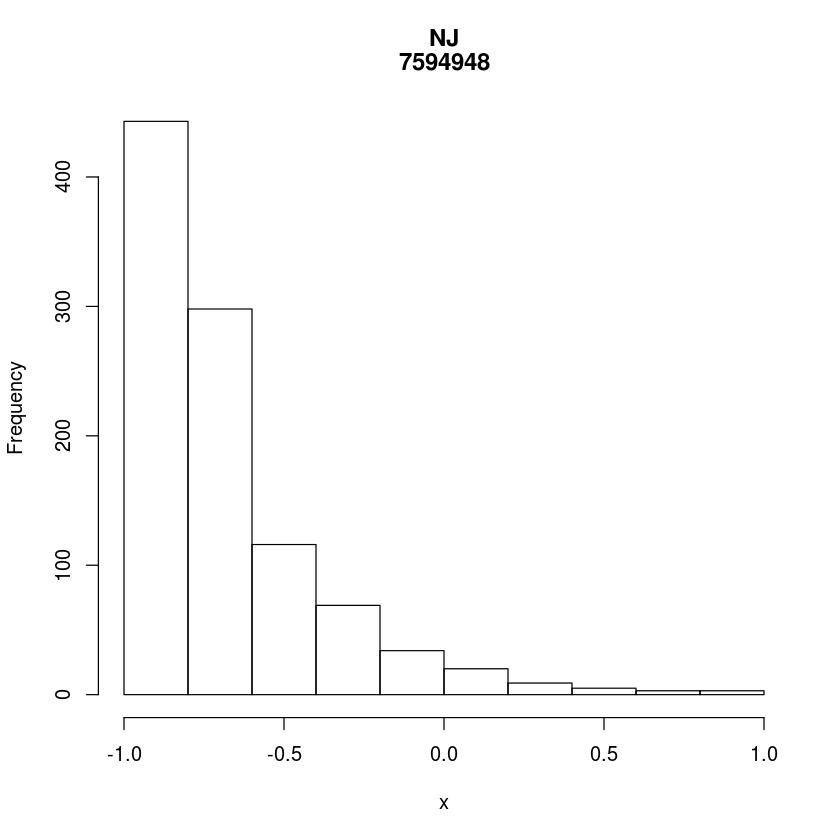

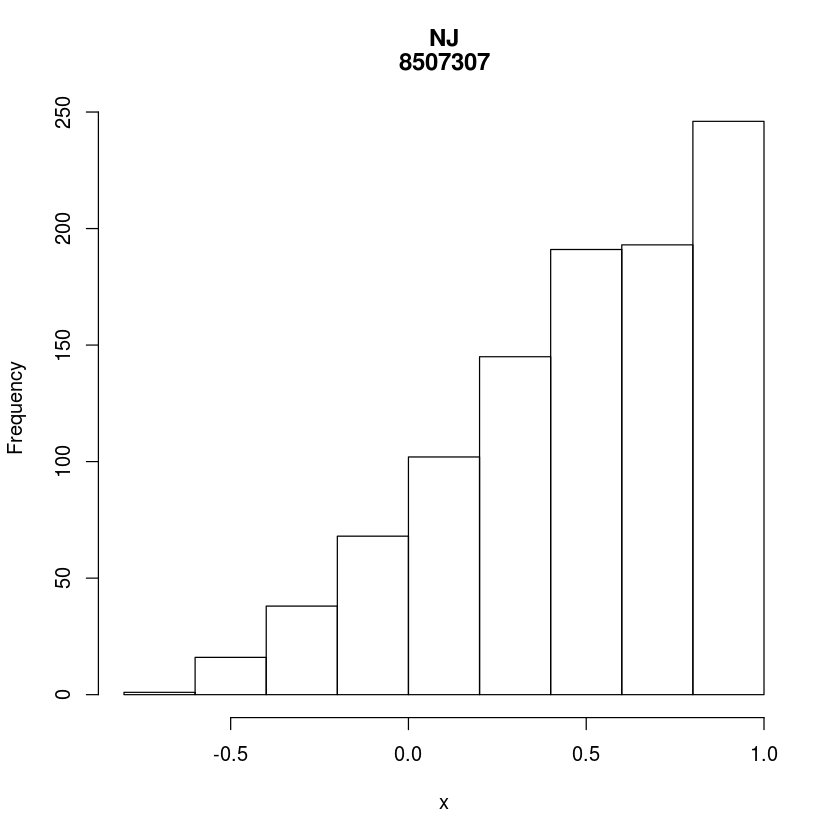

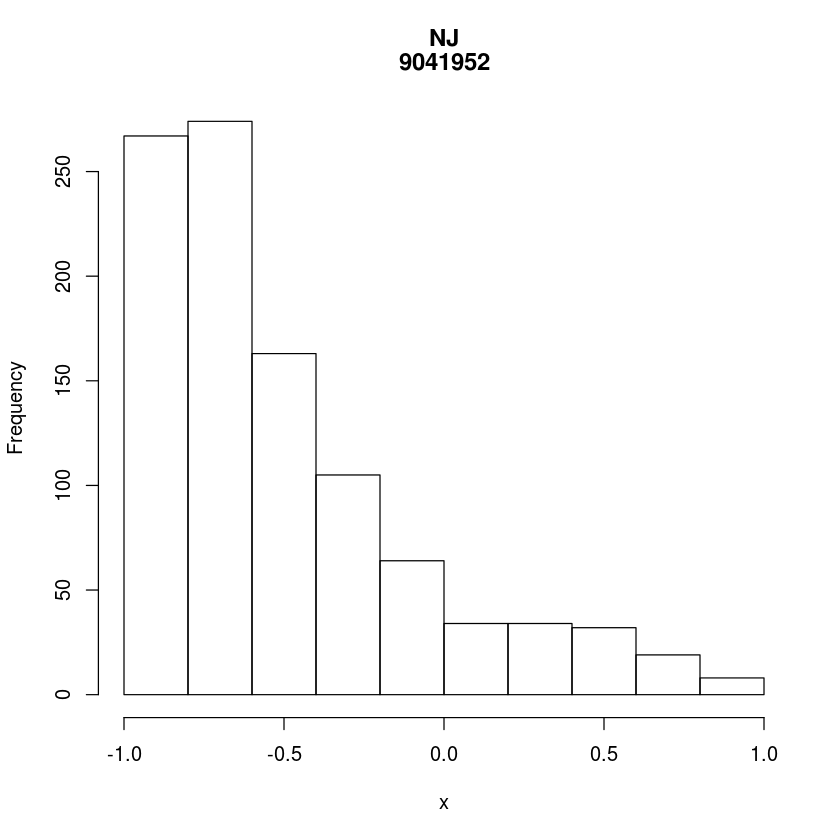

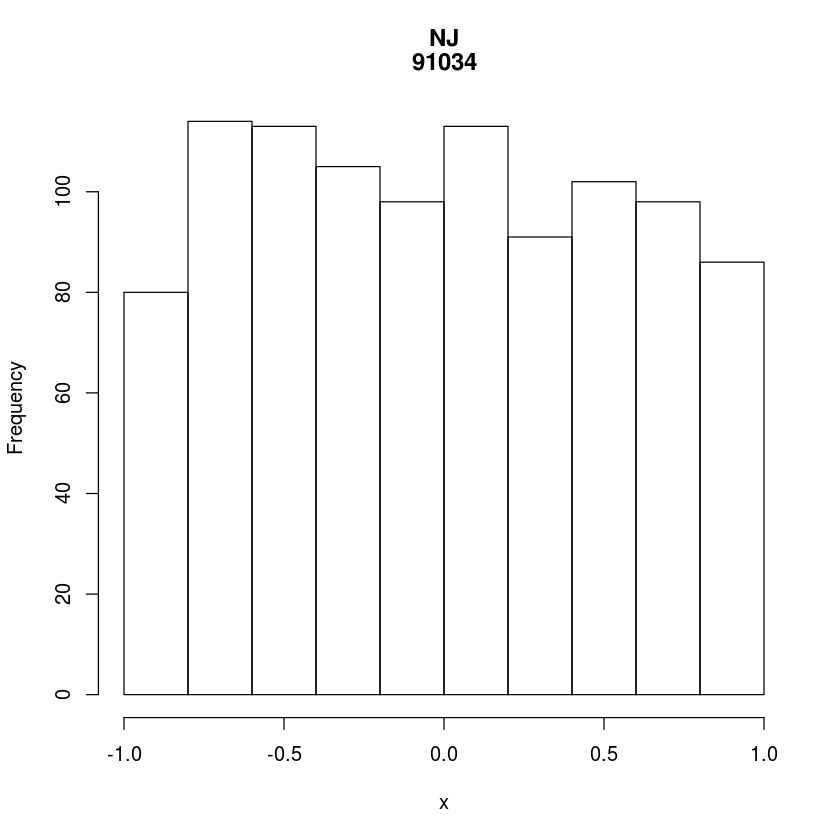

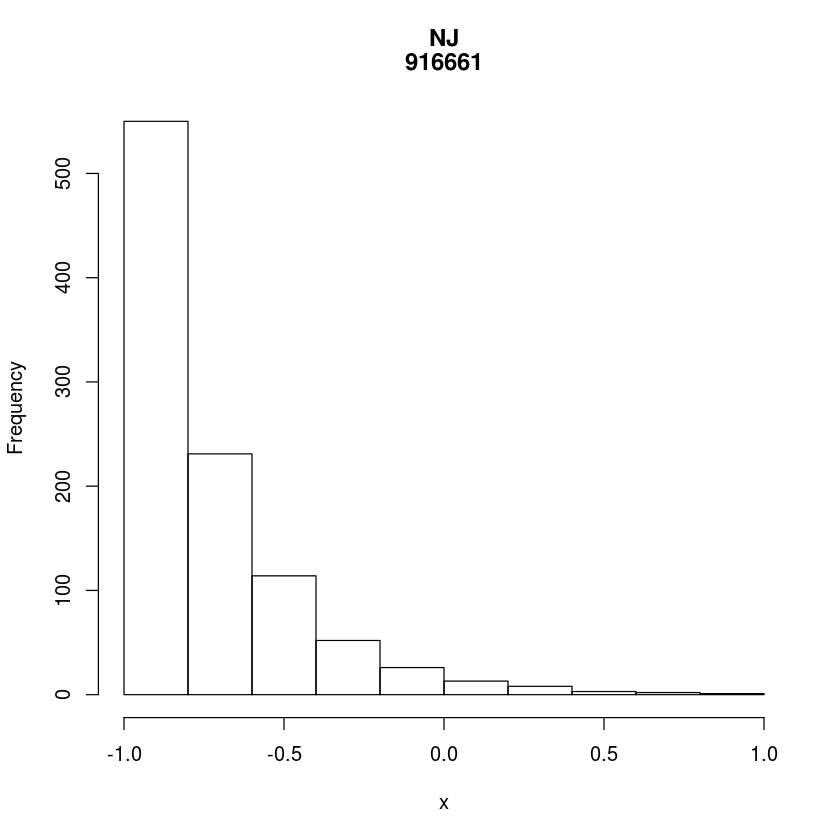

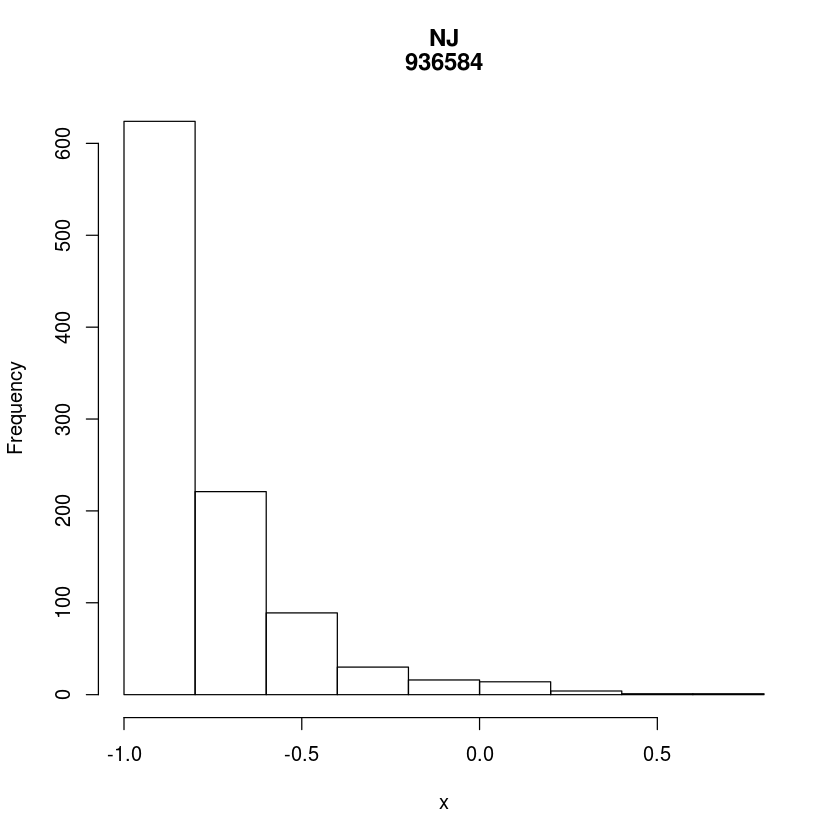

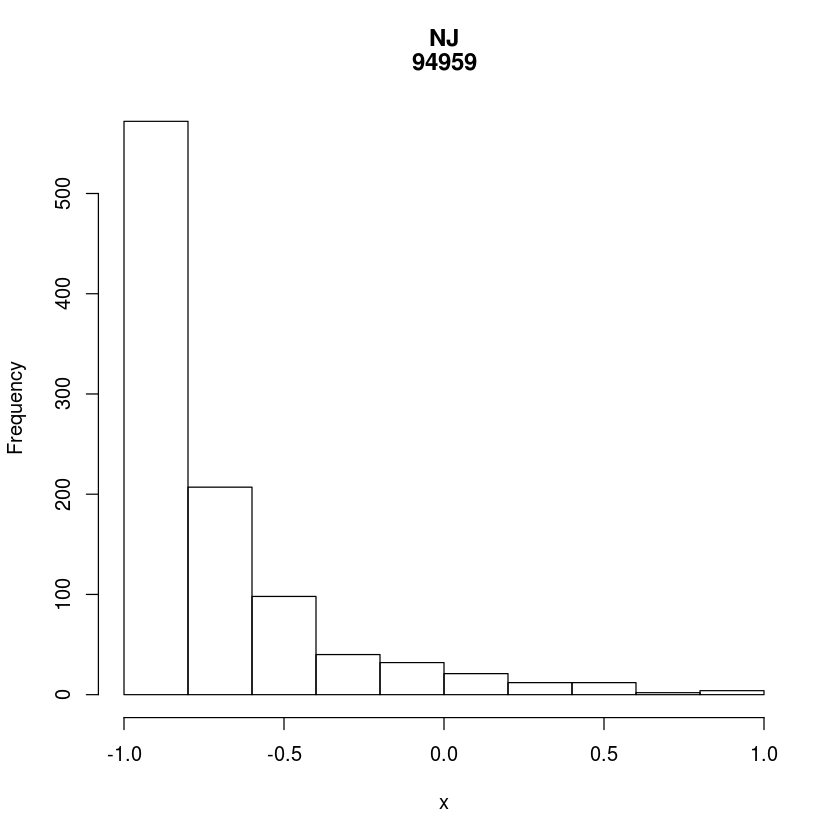

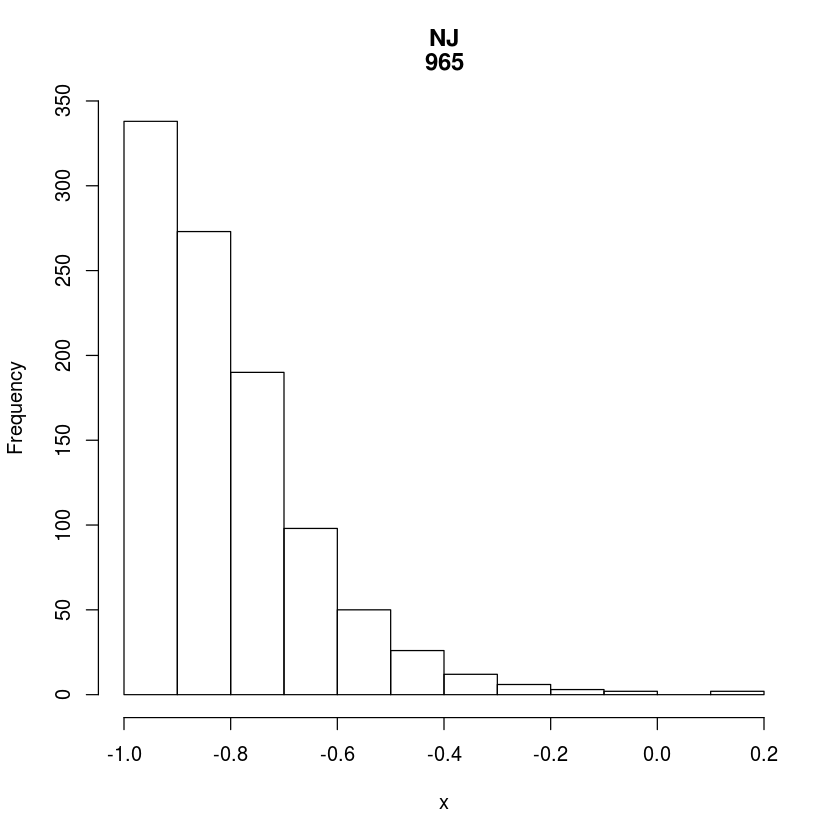

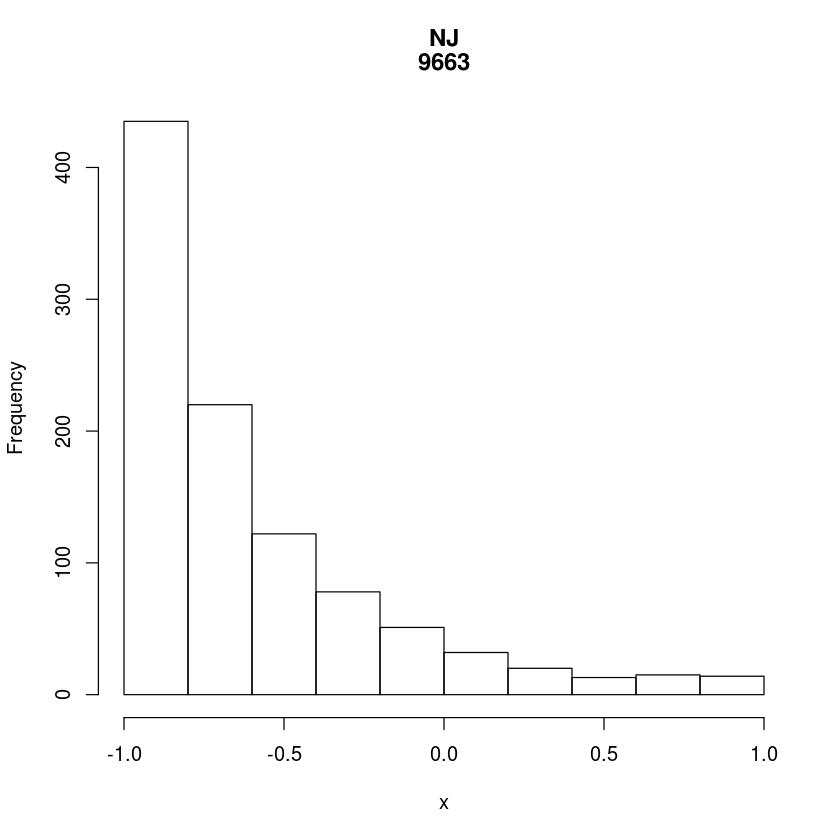

[,1]                                                                
breaks   -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0          
counts   91, 105, 98, 104, 109, 93, 100, 115, 87, 98                         
density  0.455, 0.525, 0.490, 0.520, 0.545, 0.465, 0.500, 0.575, 0.435, 0.490
mids     -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9               
xname    x                                                                   
equidist TRUE                                                                
         [,2]                                                                                         
breaks   -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0          
counts   1, 4, 9, 17, 24, 32, 40, 56, 71, 82, 107, 123, 140, 145, 149                                 
density  0.01, 0.04, 0.09, 0.17, 0.24, 0.32, 0.40, 0.56, 0.71, 0.82, 1.07, 1.23, 1.40, 1.45, 1.49     
mids     -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                                            
equidist TRUE                                                                                         
         [,3]                                                                                                          
breaks   -1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55, -0.50, -0.45, -0.40, -0.35, -0.30       
counts   212, 240, 153, 112, 81, 67, 49, 31, 18, 19, 7, 4, 6, 1                                                        
density  4.24, 4.80, 3.06, 2.24, 1.62, 1.34, 0.98, 0.62, 0.36, 0.38, 0.14, 0.08, 0.12, 0.02                            
mids     -0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.675, -0.625, -0.575, -0.525, -0.475, -0.425, -0.375, -0.325
xname    x                                                                                                             
equidist TRUE                                                                                                          
         [,4]                                                                
breaks   -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0          
counts   573, 245, 96, 43, 19, 12, 4, 3, 3, 2                                
density  2.865, 1.225, 0.480, 0.215, 0.095, 0.060, 0.020, 0.015, 0.015, 0.010
mids     -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9               
xname    x                                                                   
equidist TRUE                                                                
         [,5]                                                                                  
breaks   -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3        
counts   374, 256, 144, 105, 45, 26, 23, 14, 6, 3, 2, 0, 2                                     
density  3.74, 2.56, 1.44, 1.05, 0.45, 0.26, 0.23, 0.14, 0.06, 0.03, 0.02, 0.00, 0.02          
mids     -0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25
xname    x                                                                                     
equidist TRUE                                                                                  
         [,6]                                                                                         
breaks   -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0          
counts   1, 4, 10, 19, 23, 53, 50, 48, 67, 77, 106, 109, 137, 145, 151                                
density  0.01, 0.04, 0.10, 0.19, 0.23, 0.53, 0.50, 0.48, 0.67, 0.77, 1.06, 1.09, 1.37, 1.45, 1.51     
mids     -0.45, -0.35, -0.25, -0.15, -0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95
xname    x                                                                                            
equidist TRUE                                                     

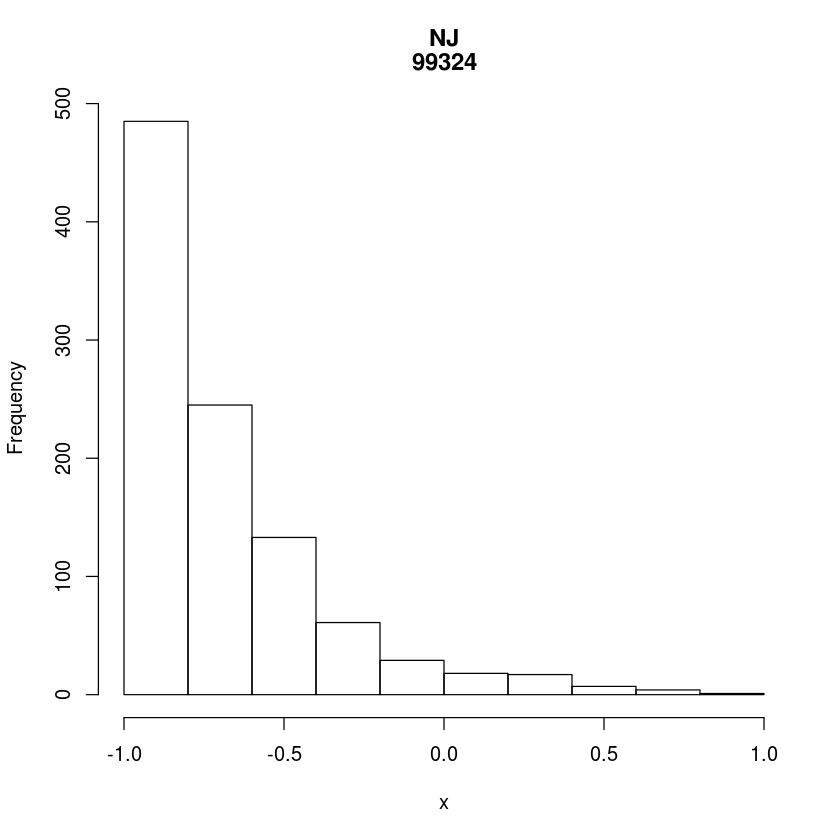

In [237]:
mapply(function(x, y) {
hist(x, main=c("NJ", y[1,4]))}, sNJ, tNJ_f2s)

A biplot of median or mean s vs. the change in allele frequency would be helpful. I’d expect higher s estimates for larger frequency changes, though this is also somewhat dependent on initial allele frequencies (perhaps color the dots by initial allele freq?). 



In [20]:
#calculate mean s value 
meansNJ=t(as.data.frame(mapply(function(x, y) {
cbind(median(x), as.character(y[1,4]))}, sNJ, tNJ_f2s)))
row.names(meansNJ)=NULL
meansNJ=as.data.frame(meansNJ)
colnames(meansNJ)=c("mean", "Position")
meansNJ$mean=as.numeric(as.character(meansNJ$mean))

In [21]:
meansNY=t(as.data.frame(mapply(function(x, y) {
c(median(x), as.character(y[1,4]))}, sNY, tNY_f2s)))
row.names(meansNY)=NULL
meansNY=as.data.frame(meansNY)
colnames(meansNY)=c("mean", "Position")
meansNY$mean=as.numeric(as.character(meansNY$mean))

In [22]:
#mafs for significant snps
mafsNJNY50SigoutVT=read.csv("/data/sarahgw/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT_nr.csv")

In [23]:
#mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_E.x", "Maf2_U.x", "Maf2_E.y", "Maf2_U.y", "Maf2_E.VT", "Maf2_U.VT", "diff.x", "diff.y", "diff.VT")]
#colnames(mafsSimp)=c("Scaffold", "Position", "NJ_Post", "NJ_Pre", "NY_Post", "NY_Pre", "VT_Post", "VT_Pre", "NJ_diff", "NY_diff", "VT_diff")

In [24]:
mafsSimp=mafsNJNY50SigoutVT[c("Scaffold", "Position", "Maf2_U.x", "Maf2_U.y",  "Maf2_U.VT", "diff.x", "diff.y", "diff.VT")]
colnames(mafsSimp)=c("Scaffold", "Position",  "NJ_Pre",  "NY_Pre",  "VT_Pre", "NJ_diff", "NY_diff", "VT_diff")
mafsSimp[abs(mafsSimp$NY_diff)>0.7,]

Scaffold Position NJ_Pre   NY_Pre   VT_Pre   NJ_diff   NY_diff   VT_diff  
1  GL429767 16839644 0.665153 0.925564 0.433736 -0.617749 -0.705524  0.010050
8  GL429772 14993622 0.746480 0.863641 0.461392 -0.561531 -0.713684 -0.004424
44 GL429998    99324 0.640445 0.800678 0.401198 -0.567629 -0.755151  0.056708
47 GL430029  1661413 0.152913 0.044739 0.368284  0.563131  0.819578 -0.064558
49 GL430101   496908 0.324946 0.000003 0.211981  0.505373  0.917935  0.240994

In [25]:
#rearrange to graph 
mafsSimp=pivot_longer(mafsSimp,
  cols = 3:8,
  names_to = c("Site", "Time"),
  names_pattern = "(.*)_(.*)",
  values_to = "maf"
)

Warning message:
“Assigning non-quosure objects to quosure lists is deprecated as of rlang 0.3.0.
Please coerce to a bare list beforehand with `as.list()`
This warning is displayed once per session.”Warning message:
“Quosure lists can't be concatenated with objects other than quosures as of rlang 0.3.0.
Please call `as.list()` on the quosure list first.
This warning is displayed once per session.”

In [26]:
mafsSimp=pivot_wider(mafsSimp, names_from = Time, values_from = maf)

In [27]:
mafsSimp$Position=as.factor(as.character(mafsSimp$Position))

In [28]:
meanmafsNJ=merge(meansNJ, mafsSimp[mafsSimp$Site=="NJ",], by="Position")

In [29]:
meanmafsNY=merge(meansNY, mafsSimp[mafsSimp$Site=="NY",], by="Position")

In [30]:
head(meanmafsNY)

Position mean       Scaffold Site Pre      diff     
1 11932     0.6534485 GL430166 NY   0.172547  0.509016
2 1241213   0.5265699 GL429927 NY   0.240988  0.617383
3 1396110  -0.8791212 GL430008 NY   0.786277 -0.524482
4 1484586  -0.8715668 GL429955 NY   0.500034 -0.500032
5 14993622 -0.8623084 GL429772 NY   0.863641 -0.713684
6 1661413   0.6930437 GL430029 NY   0.044739  0.819578

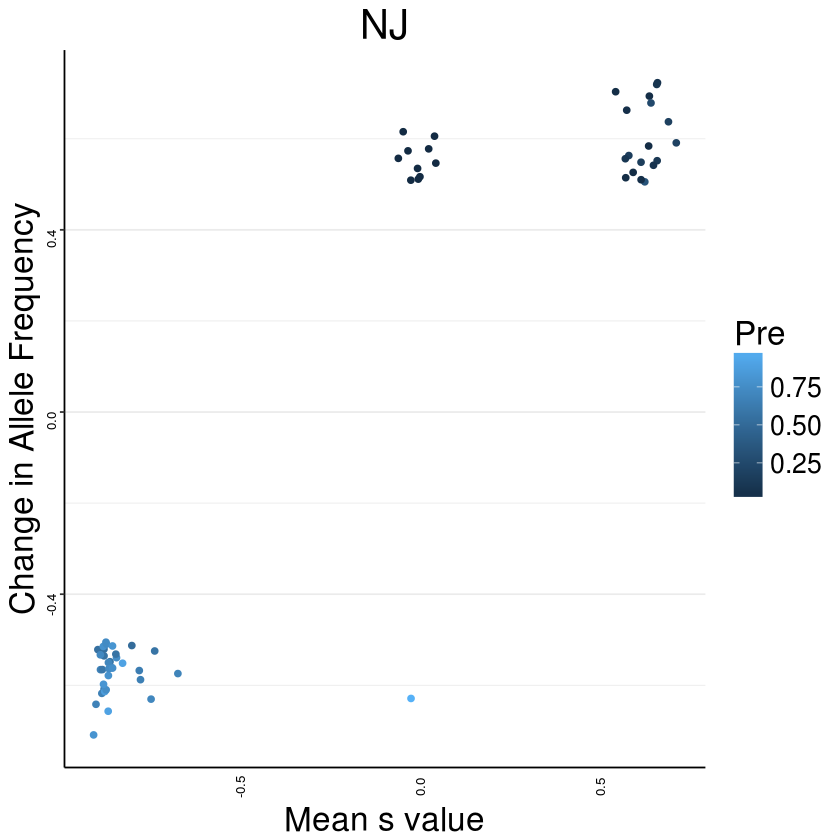

In [31]:
ggplot(meanmafsNJ, aes(x=mean, y=(diff))) +
ggtitle("NJ") +
    geom_point(aes(color=Pre)) +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

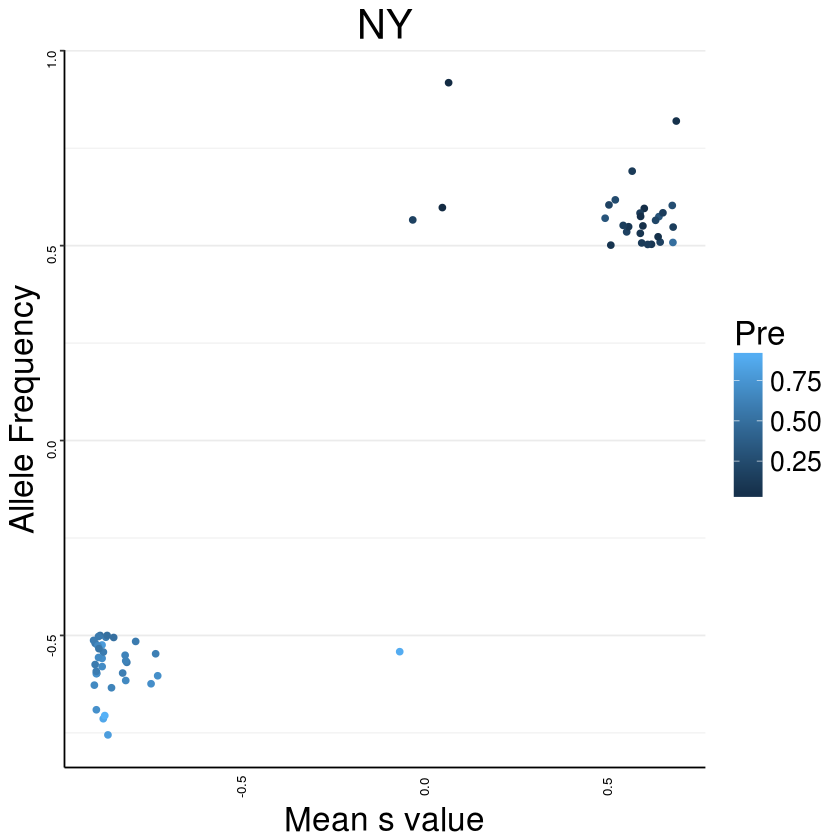

In [31]:
ggplot(meanmafsNY, aes(x=mean, y=(diff))) +
    geom_point(aes(color=Pre)) +
    ggtitle("NY") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

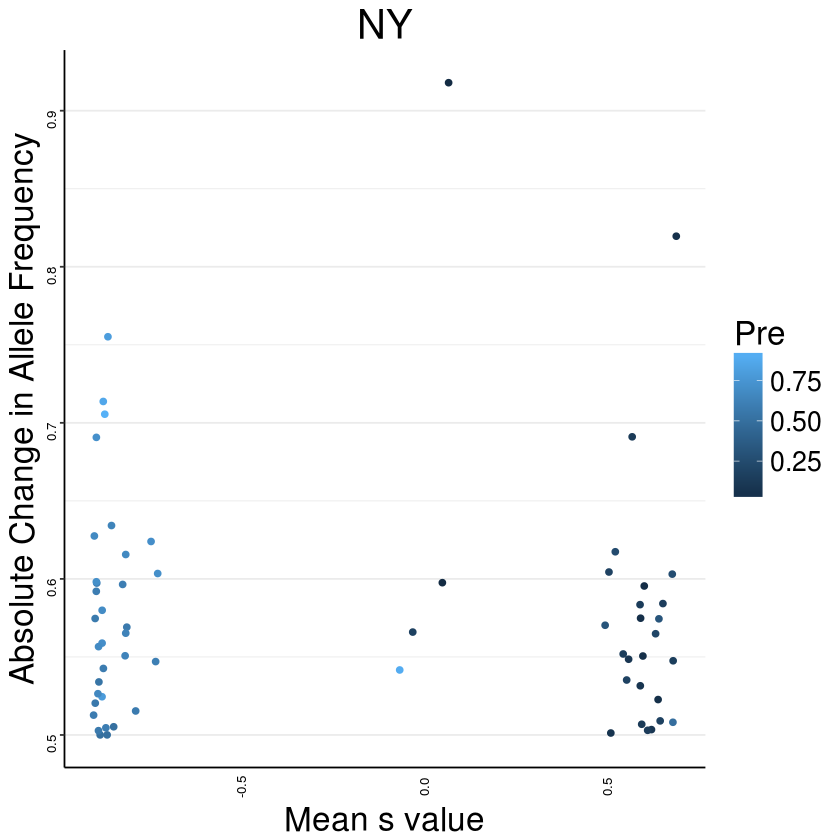

In [32]:
ggplot(meanmafsNY, aes(x=mean, y=abs(diff))) +
    geom_point(aes(color=Pre)) +
    ggtitle("NY") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Absolute Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

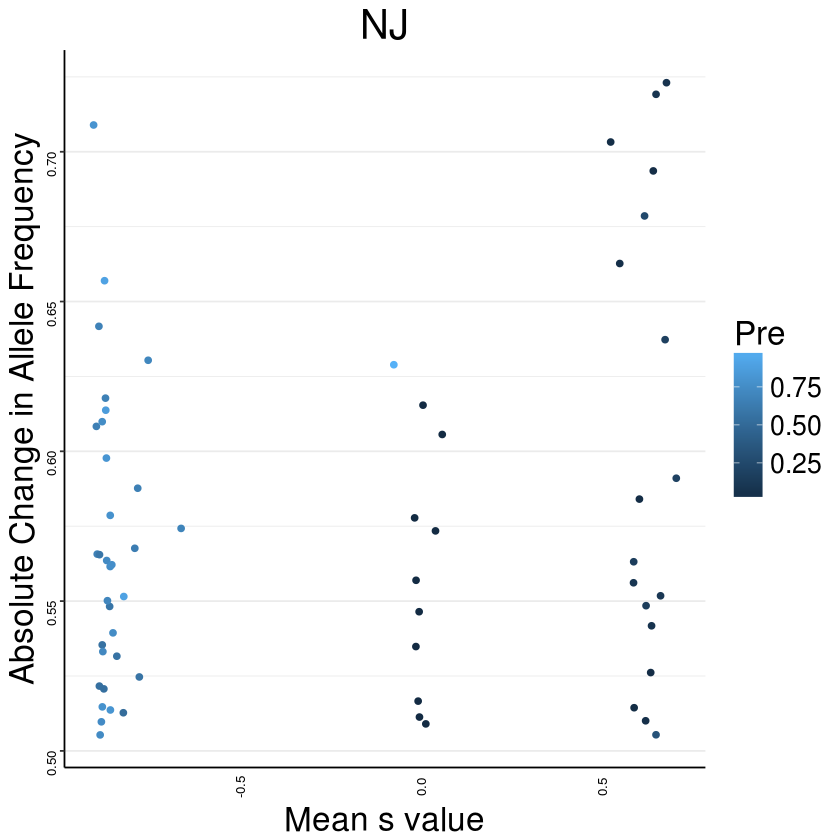

In [33]:
ggplot(meanmafsNJ, aes(x=mean, y=abs(diff))) +
ggtitle("NJ") +
    geom_point(aes(color=Pre)) +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    #geom_line()+
    theme_bw() +
    xlab("Mean s value")+
    ylab("Absolute Change in Allele Frequency")+
    theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

Make plots of each step in the simulations

In [34]:
NY_sig[7]

[[1]]
         SNP    MAF_U    MAF_E nInd_U nInd_E
1   16839644 0.642422 0.083863      8     11
2   16839644 0.722371 0.000002      8     11
3   16839644 0.751581 0.153481      8     11
4   16839644 0.999996 0.314141      8     11
5   16839644 0.736438 0.077841      8     11
6   16839644 0.725314 0.165657      8     11
7   16839644 0.793464 0.096927      8     11
8   16839644 0.834622 0.089101      8     11
9   16839644 0.673634 0.263007      8     11
10  16839644 0.909517 0.388060      8     11
11  16839644 0.889931 0.089101      8     11
12  16839644 0.648761 0.168434      8     11
13  16839644 0.783922 0.267807      8     11
14  16839644 0.919679 0.159507      8     11
15  16839644 0.916426 0.177582      8     11
16  16839644 0.916198 0.360629      8     11
17  16839644 0.912650 0.257959      8     11
18  16839644 0.575379 0.166037      8     11
19  16839644 0.816450 0.079012      8     11
20  16839644 0.581038 0.286320      8     11
21  16839644 0.590367 0.168907      8     11
22  16839644 0.838155 0.071255      8     11
23  16839644 0.999998 0.463346      8     11
24  16839644 0.756918 0.072567      8     11
25  16839644 0.999999 0.403661      8     11
26  16839644 0.999998 0.150931      8     11
27  16839644 0.742416 0.204421      8     11
28  16839644 0.517578 0.178564      8     11
29  16839644 0.715513 0.185115      8     11
30  16839644 0.917976 0.272366      8     11
31  16839644 0.771052 0.169386      8     11
32  16839644 0.769435 0.156468      8     11
33  16839644 0.850198 0.265493      8     11
34  16839644 0.823730 0.159375      8     11
35  16839644 0.916426 0.165658      8     11
36  16839644 0.905128 0.079195      8     11
37  16839644 0.815238 0.159375      8     11
38  16839644 0.914338 0.249209      8     11
39  16839644 0.802294 0.161892      8     11
40  16839644 0.777856 0.073595      8     11
41  16839644 0.662103 0.156938      8     11
42  16839644 0.732700 0.548578      8     11
43  16839644 0.811972 0.160189      8     11
44  16839644 0.667850 0.000002      8     11
45  16839644 0.695184 0.403666      8     11
46  16839644 0.999997 0.138635      8     11
47  16839644 0.914338 0.000003      8     11
48  16839644 0.905129 0.162671      8     11
49  16839644 0.914580 0.077682      8     11
50  16839644 0.912651 0.156265      8     11
51  16839644 0.722379 0.283723      8     11
52  16839644 0.912650 0.071382      8     11
53  16839644 0.798669 0.000002      8     11
54  16839644 0.816675 0.196350      8     11
55  16839644 0.830506 0.178473      8     11
56  16839644 0.627458 0.148076      8     11
57  16839644 0.841537 0.162671      8     11
58  16839644 0.783512 0.156468      8     11
59  16839644 0.642422 0.083863      8     11
60  16839644 0.909232 0.343176      8     11
61  16839644 0.794947 0.067813      8     11
62  16839644 0.906606 0.263006      8     11
63  16839644 0.825126 0.497393      8     11
64  16839644 0.496880 0.074982      8     11
65  16839644 0.890432 0.165350      8     11
66  16839644 0.999998 0.070119      8     11
67  16839644 0.690819 0.395878      8     11
68  16839644 0.820994 0.161942      8     11
69  16839644 0.758002 0.143189      8     11
70  16839644 0.922698 0.281995      8     11
71  16839644 0.999996 0.271163      8     11
72  16839644 0.610121 0.071285      8     11
73  16839644 0.903121 0.000001      8     11
74  16839644 0.898476 0.168588      8     11
75  16839644 0.529401 0.000002      8     11
76  16839644 0.916198 0.063626      8     11
77  16839644 0.653531 0.185018      8     11
78  16839644 0.999999 0.068994      8     11
79  16839644 0.638413 0.079179      8     11
80  16839644 0.917976 0.175776      8     11
81  16839644 0.999998 0.342266      8     11
82  16839644 0.772950 0.068879      8     11
83  16839644 0.904629 0.074956      8     11
84  16839644 0.717374 0.067803      8     11
85  16839644 0.803771 0.079195      8     11
86  16839644 0.999999 0.067813      8     11
87  16839644 0.642408 0.178564      8     11
88  16839644 0.999998 0.174712    

In [72]:
##function to count the 1000 closest simulated f2s to the 100 bs f2s to create distribution to sample from
wfs_bs_s_count=function(bs, sim){
    ##pull out bs f2s
    f2bsvalues=bs[3]
    #print(NROW(f2bsvalues))
    simfull=as.data.frame(sim)
    #create column of 0s to count 
    simfull$count=0
    for (i in 1:NROW(f2bsvalues)){
        f2bs=f2bsvalues[i,]
        #print(f2bs)
        #order by closest values
        simfull$diff=abs(simfull$V2 - f2bs)
        #print(diff)
        simfull=simfull[order(simfull$diff),]
        #add a 1 to first 1000 rows
        simfull$count[1:1000]=simfull$count[1:1000] + 1
    }

    out=c(simfull)
return(out)
}

In [33]:
f2s=replicate(100, mapply(wfs_byf1_variablene_s,  testbs[,2], MoreArgs = list(gen=2, c(424, 296), h=0.5, smin=-1, smax=1), SIMPLIFY=FALSE))

ERROR: Error in mapply(wfs_byf1_variablene_s, testbs[, 2], MoreArgs = list(gen = 2, : object 'testbs' not found


In [91]:
head(f2s)

[,1]                                [,2]                            
[1,] 0.64242200, 0.64864865, 0.06266411  0.6424220, 0.7297297, 0.4908483 
[2,] 0.7223710, 0.3040541, -0.8460294    0.7223710, 0.8006757, 0.6099035 
[3,] 0.7515810, 0.6756757, -0.3183372    0.7515810, 0.6621622, -0.3703363
[4,] 0.99999600, 1.00000000, -0.03554084 0.9999960, 1.0000000, 0.6550847 
[5,] 0.7364380, 0.2398649, -0.9343224    0.7364380, 0.8141892, 0.6859168 
[6,] 0.7253140, 0.7939189, 0.9877857     0.7253140, 0.5000000, -0.6066906
     [,3]                             [,4]                            
[1,] 0.6424220, 0.3074324, -0.8057910 0.6424220, 0.3817568, -0.5919110
[2,] 0.7223710, 0.2837838, -0.9160508 0.7223710, 0.7837838, 0.6105089 
[3,] 0.7515810, 0.4628378, -0.7235747 0.7515810, 0.8175676, 0.8813793 
[4,] 0.9999960, 1.0000000, -0.2189953 0.9999960, 1.0000000, 0.3118244 
[5,] 0.7364380, 0.4087838, -0.7744878 0.7364380, 0.4324324, -0.7476088
[6,] 0.7253140, 0.8378378, 0.7885606  0.7253140, 0.8479730, 0.9686926 
     [,5]                               [,6]                               
[1,] 0.6424220, 0.6689189, 0.2092466    0.64242200, 0.71283784, 0.02623131 
[2,] 0.7223710, 0.3445946, -0.8521764   0.7223710, 0.4628378, -0.6124171   
[3,] 0.7515810, 0.6418919, -0.5531543   0.7515810, 0.7500000, -0.0745494   
[4,] 0.9999960, 1.0000000, -0.0692087   0.99999600, 1.00000000, -0.01521287
[5,] 0.7364380, 0.8412162, 0.7365069    0.7364380, 0.7871622, 0.2493956    
[6,] 0.72531400, 0.72635135, 0.04825696 0.7253140, 0.6790541, -0.1837004   
     [,7]                                [,8]                              
[1,] 0.6424220, 0.7398649, 0.7929534     0.64242200, 0.64189189, 0.06689878
[2,] 0.7223710, 0.6554054, -0.3523635    0.7223710, 0.7533784, 0.2141832   
[3,] 0.7515810, 0.8243243, 0.4877804     0.7515810, 0.6993243, -0.0386646  
[4,] 0.99999600, 1.00000000, 0.04869634  0.999996, 1.000000, -0.428096     
[5,] 0.7364380, 0.7601351, 0.1296076     0.7364380, 0.6081081, -0.4280380  
[6,] 0.72531400, 0.77702703, -0.07804459 0.7253140, 0.8006757, 0.3144497   
     [,9]                             [,10]                            [,11]
[1,] 0.6424220, 0.6283784, 0.1445400  0.6424220, 0.5912162, -0.2022823 ⋯    
[2,] 0.7223710, 0.7601351, 0.2169831  0.7223710, 0.7027027, -0.2153687 ⋯    
[3,] 0.7515810, 0.8344595, 0.6955385  0.7515810, 0.8310811, 0.4609496  ⋯    
[4,] 0.9999960, 1.0000000, -0.6161769 0.999996, 1.000000, -0.590198    ⋯    
[5,] 0.7364380, 0.5472973, -0.5252568 0.7364380, 0.7905405, 0.5357041  ⋯    
[6,] 0.7253140, 0.5202703, -0.5618623 0.7253140, 0.8209459, 0.5757238  ⋯    
     [,12]                            [,13]                           
[1,] 0.6424220, 0.7702703, 0.4965523  0.6424220, 0.8040541, 0.8282464 
[2,] 0.7223710, 0.3412162, -0.8446704 0.7223710, 0.8074324, 0.4200147 
[3,] 0.7515810, 0.8074324, 0.1801166  0.7515810, 0.8682432, 0.8670214 
[4,] 0.9999960, 1.0000000, -0.3974598 0.9999960, 1.0000000, 0.9523416 
[5,] 0.7364380, 0.6824324, -0.1457367 0.7364380, 0.6418919, -0.4305222
[6,] 0.7253140, 0.1959459, -0.9877355 0.7253140, 0.8277027, 0.7838698 
     [,14]                            [,15]                             
[1,] 0.6424220, 0.4864865, -0.2876645 0.6424220, 0.4864865, -0.4348243  
[2,] 0.7223710, 0.3581081, -0.8000490 0.7223710, 0.5709459, -0.4709612  
[3,] 0.7515810, 0.8006757, 0.2777533  0.7515810, 0.8141892, 0.6591727   
[4,] 0.9999960, 1.0000000, -0.1324949 0.9999960, 1.0000000, 0.8948181   
[5,] 0.7364380, 0.8479730, 0.8465755  0.73643800, 0.69932432, 0.06424328
[6,] 0.7253140, 0.5945946, -0.3528481 0.7253140, 0.7128378, 0.1042132   
     [,16]                            [,17]                             
[1,] 0.6424220, 0.5675676, -0.2487409 0.64242200, 0.70608108, 0.06317771
[2,] 0.7223710, 0.4391892, -0.7223163 0.7223710, 0.7466216, -0.1119305  
[3,] 0.7515810, 0.7905405, 0.4171186  0.7515810, 0.6858108, -0.2389387  
[4,] 0.999996, 1.000000, 0.204966     0.9999960, 1.0000000, -0.3187662  
[5,] 0.7364380

In [39]:
testbs=as.data.frame(NY_sig[7])

In [73]:
NY_f2s=lapply(NY_sig[7], wfs_bs_simp, ne=c(424, 296), gen=2)
NY_f2s=lapply(NY_f2s, t)
NY_f2s=lapply(NY_f2s, as.data.frame)
tNY_f2s=lapply(NY_f2s, FUN=function(x){x$SNP=x[10001,1]; x})

In [138]:
head(tNY_f2s)

[[1]]
                 V1           V2            V3      SNP
V1     6.424220e-01 6.148649e-01  2.633074e-01 16839644
V2     7.223710e-01 2.871622e-01 -8.830077e-01 16839644
V3     7.515810e-01 8.209459e-01  7.592082e-01 16839644
V4     9.999960e-01 1.000000e+00  8.234378e-01 16839644
V5     7.364380e-01 7.500000e-01  4.318376e-01 16839644
V6     7.253140e-01 6.047297e-01 -4.879547e-01 16839644
V7     7.934640e-01 8.851351e-01  8.549708e-01 16839644
V8     8.346220e-01 5.202703e-01 -7.741537e-01 16839644
V9     6.736340e-01 6.621622e-01  2.029151e-01 16839644
V10    9.095170e-01 8.581081e-01 -3.690529e-01 16839644
V11    8.899310e-01 8.682432e-01 -3.537975e-01 16839644
V12    6.487610e-01 6.925676e-01  1.573417e-01 16839644
V13    7.839220e-01 7.837838e-01 -2.538415e-02 16839644
V14    9.196790e-01 9.493243e-01  6.904610e-01 16839644
V15    9.164260e-01 9.155405e-01 -1.355158e-01 16839644
V16    9.161980e-01 5.337838e-01 -8.628598e-01 16839644
V17    9.126500e-01 9.527027e-01  6.993785e-01 16839644
V18    5.753790e-01 7.466216e-01  7.324130e-01 16839644
V19    8.164500e-01 8.885135e-01  5.317692e-01 16839644
V20    5.810380e-01 7.398649e-01  9.091570e-01 16839644
V21    5.903670e-01 5.033784e-01 -4.195202e-01 16839644
V22    8.381550e-01 7.297297e-01 -4.823477e-01 16839644
V23    9.999980e-01 1.000000e+00 -4.349183e-01 16839644
V24    7.569180e-01 6.013514e-01 -5.043103e-01 16839644
V25    9.999990e-01 1.000000e+00 -9.865531e-01 16839644
V26    9.999980e-01 1.000000e+00  9.127693e-01 16839644
V27    7.424160e-01 7.939189e-01  3.285739e-01 16839644
V28    5.175780e-01 5.000000e-01 -5.386941e-02 16839644
V29    7.155130e-01 8.310811e-01  4.452282e-01 16839644
V30    9.179760e-01 4.358108e-01 -9.051469e-01 16839644
V31    7.710520e-01 8.108108e-01  2.573214e-01 16839644
V32    7.694350e-01 8.513514e-01  8.796275e-01 16839644
V33    8.501980e-01 2.635135e-01 -9.555649e-01 16839644
V34    8.237300e-01 8.310811e-01  1.929872e-01 16839644
V35    9.164260e-01 9.459459e-01  2.367660e-01 16839644
V36    9.051280e-01 9.189189e-01 -1.505811e-01 16839644
V37    8.152380e-01 7.736486e-01 -4.263170e-01 16839644
V38    9.143380e-01 8.074324e-01 -4.685034e-01 16839644
V39    8.022940e-01 8.682432e-01  6.734712e-01 16839644
V40    7.778560e-01 7.702703e-01 -1.244625e-01 16839644
V41    6.621030e-01 8.243243e-01  6.994930e-01 16839644
V42    7.327000e-01 7.331081e-01 -3.911359e-02 16839644
V43    8.119720e-01 8.885135e-01  3.371614e-01 16839644
V44    6.678500e-01 8.209459e-01  7.288058e-01 16839644
V45    6.951840e-01 2.162162e-01 -9.488428e-01 16839644
V46    9.999970e-01 1.000000e+00  1.603696e-01 16839644
V47    9.143380e-01 5.979730e-01 -8.142274e-01 16839644
V48    9.051290e-01 8.851351e-01 -2.483935e-01 16839644
V49    9.145800e-01 6.317568e-01 -7.970284e-01 16839644
V50    9.126510e-01 6.891892e-01 -7.223263e-01 16839644
V51    7.223790e-01 7.128378e-01 -9.025742e-02 16839644
V52    9.126500e-01 9.256757e-01 -7.390180e-02 16839644
V53    7.986690e-01 3.513514e-01 -8.896360e-01 16839644
V54    8.166750e-01 3.006757e-01 -8.869389e-01 16839644
V55    8.305060e-01 8.716216e-01 -7.627993e-02 16839644
V56    6.274580e-01 7.094595e-01  4.804716e-01 16839644
V57    8.415370e-01 7.432432e-01 -4.074479e-01 16839644
V58    7.835120e-01 6.689189e-01 -5.670357e-01 16839644
V59    6.424220e-01 7.466216e-01  4.244291e-01 16839644
V60    9.092320e-01 8.378378e-01 -2.069477e-01 16839644
V61    7.949470e-01 9.054054e-01  9.312417e-01 16839644
V62    9.066060e-01 9.290541e-01  4.553181e-01 16839644
V63    8.251260e-01 8.783784e-01  9.262209e-01 16839644
V64    4.968800e-01 6.486486e-01  4.864608e-01 16839644
V65    8.904320e-01 9.189189e-01  8.389061e-01 16839644
V66    9.999980e-01 1.000000e+00 -4.089009e-01 16839644
V67    6.908190e-01 6.790541e-01  3.076661e-01 16839644
V68    8.209940e-01 8.310811e-01 -2.716420e-01 16839644
V69    7.580020e-01 8.006757e-01  2.098283e-01 16839644
V70    9.226980e-01 9.425676e-01  8.244965e-01 16839644
V71    9.999960e-0

In [69]:
head(NY_sig[7])

[[1]]
         SNP    MAF_U    MAF_E nInd_U nInd_E
1   16839644 0.642422 0.083863      8     11
2   16839644 0.722371 0.000002      8     11
3   16839644 0.751581 0.153481      8     11
4   16839644 0.999996 0.314141      8     11
5   16839644 0.736438 0.077841      8     11
6   16839644 0.725314 0.165657      8     11
7   16839644 0.793464 0.096927      8     11
8   16839644 0.834622 0.089101      8     11
9   16839644 0.673634 0.263007      8     11
10  16839644 0.909517 0.388060      8     11
11  16839644 0.889931 0.089101      8     11
12  16839644 0.648761 0.168434      8     11
13  16839644 0.783922 0.267807      8     11
14  16839644 0.919679 0.159507      8     11
15  16839644 0.916426 0.177582      8     11
16  16839644 0.916198 0.360629      8     11
17  16839644 0.912650 0.257959      8     11
18  16839644 0.575379 0.166037      8     11
19  16839644 0.816450 0.079012      8     11
20  16839644 0.581038 0.286320      8     11
21  16839644 0.590367 0.168907      8     11
22  16839644 0.838155 0.071255      8     11
23  16839644 0.999998 0.463346      8     11
24  16839644 0.756918 0.072567      8     11
25  16839644 0.999999 0.403661      8     11
26  16839644 0.999998 0.150931      8     11
27  16839644 0.742416 0.204421      8     11
28  16839644 0.517578 0.178564      8     11
29  16839644 0.715513 0.185115      8     11
30  16839644 0.917976 0.272366      8     11
31  16839644 0.771052 0.169386      8     11
32  16839644 0.769435 0.156468      8     11
33  16839644 0.850198 0.265493      8     11
34  16839644 0.823730 0.159375      8     11
35  16839644 0.916426 0.165658      8     11
36  16839644 0.905128 0.079195      8     11
37  16839644 0.815238 0.159375      8     11
38  16839644 0.914338 0.249209      8     11
39  16839644 0.802294 0.161892      8     11
40  16839644 0.777856 0.073595      8     11
41  16839644 0.662103 0.156938      8     11
42  16839644 0.732700 0.548578      8     11
43  16839644 0.811972 0.160189      8     11
44  16839644 0.667850 0.000002      8     11
45  16839644 0.695184 0.403666      8     11
46  16839644 0.999997 0.138635      8     11
47  16839644 0.914338 0.000003      8     11
48  16839644 0.905129 0.162671      8     11
49  16839644 0.914580 0.077682      8     11
50  16839644 0.912651 0.156265      8     11
51  16839644 0.722379 0.283723      8     11
52  16839644 0.912650 0.071382      8     11
53  16839644 0.798669 0.000002      8     11
54  16839644 0.816675 0.196350      8     11
55  16839644 0.830506 0.178473      8     11
56  16839644 0.627458 0.148076      8     11
57  16839644 0.841537 0.162671      8     11
58  16839644 0.783512 0.156468      8     11
59  16839644 0.642422 0.083863      8     11
60  16839644 0.909232 0.343176      8     11
61  16839644 0.794947 0.067813      8     11
62  16839644 0.906606 0.263006      8     11
63  16839644 0.825126 0.497393      8     11
64  16839644 0.496880 0.074982      8     11
65  16839644 0.890432 0.165350      8     11
66  16839644 0.999998 0.070119      8     11
67  16839644 0.690819 0.395878      8     11
68  16839644 0.820994 0.161942      8     11
69  16839644 0.758002 0.143189      8     11
70  16839644 0.922698 0.281995      8     11
71  16839644 0.999996 0.271163      8     11
72  16839644 0.610121 0.071285      8     11
73  16839644 0.903121 0.000001      8     11
74  16839644 0.898476 0.168588      8     11
75  16839644 0.529401 0.000002      8     11
76  16839644 0.916198 0.063626      8     11
77  16839644 0.653531 0.185018      8     11
78  16839644 0.999999 0.068994      8     11
79  16839644 0.638413 0.079179      8     11
80  16839644 0.917976 0.175776      8     11
81  16839644 0.999998 0.342266      8     11
82  16839644 0.772950 0.068879      8     11
83  16839644 0.904629 0.074956      8     11
84  16839644 0.717374 0.067803      8     11
85  16839644 0.803771 0.079195      8     11
86  16839644 0.999999 0.067813      8     11
87  16839644 0.642408 0.178564      8     11
88  16839644 0.999998 0.174712    

In [124]:
NY_f2scount=mapply(wfs_bs_s_count, NY_sig[7], tNY_f2s, SIMPLIFY=FALSE)

In [125]:
NY_f2scount=as.data.frame(NY_f2scount)
#NY_f2scount$diff=NULL
head(NY_f2scount)

V1       V2        V3         SNP      count diff       
1 0.717374 0.1993243 -0.9968251 16839644 89    0.001498676
2 0.642422 0.1993243 -0.9385883 16839644 89    0.001498676
3 0.642422 0.1993243 -0.9339035 16839644 89    0.001498676
4 0.682478 0.1993243 -0.9283156 16839644 89    0.001498676
5 0.594259 0.1993243 -0.9567133 16839644 89    0.001498676
6 0.642422 0.1993243 -0.9599194 16839644 89    0.001498676

In [126]:
NY_f2scount$f2bs=rep(as.vector(testbs$MAF_E),len=10001)

In [127]:
NY_f2scount=as.data.frame(NY_f2scount)
colnames(NY_f2scount)=c("f1bs", "f2sim", "s", "SNP", "count", "diff", "f2bs")
NY_f2scount=NY_f2scount[order(NY_f2scount$s, decreasing = TRUE),]
NY_f2scount$sim=1:nrow(NY_f2scount)

probs=NY_f2scount

In [128]:
head(NY_f2scount)

f1bs         f2sim        s            SNP      count diff        
10001 1.683964e+07 1.683964e+07 1.683964e+07 16839644 0     1.683964e+07
8840  9.051290e-01 9.695946e-01 9.999519e-01 16839644 0     7.687716e-01
6706  7.364380e-01 8.750000e-01 9.999084e-01 16839644 0     6.741770e-01
6757  8.237300e-01 8.783784e-01 9.998136e-01 16839644 0     6.775554e-01
3145  6.101210e-01 6.925676e-01 9.997594e-01 16839644 0     4.917446e-01
7790  9.126510e-01 9.222973e-01 9.994514e-01 16839644 0     7.214743e-01
      f2bs     sim
10001 0.083863 1  
8840  0.073595 2  
6706  0.165657 3  
6757  0.162671 4  
3145  0.403666 5  
7790  0.368151 6

In [120]:
unique(NY_f2scount$f1bs)

[1] 1.683964e+07 9.051290e-01 7.364380e-01 8.237300e-01 6.101210e-01
 [6] 9.126510e-01 7.986690e-01 9.031210e-01 9.126500e-01 6.621030e-01
[11] 7.778560e-01 9.143380e-01 7.694350e-01 7.949470e-01 9.164260e-01
[16] 8.957860e-01 9.999980e-01 7.364310e-01 7.569180e-01 9.161980e-01
[21] 8.166750e-01 8.037710e-01 7.155130e-01 8.305060e-01 8.209940e-01
[26] 8.164500e-01 8.119720e-01 8.904320e-01 8.152380e-01 7.424160e-01
[31] 9.179760e-01 8.381550e-01 8.984760e-01 8.346220e-01 8.251260e-01
[36] 6.736340e-01 9.999970e-01 6.678500e-01 7.835120e-01 9.092320e-01
[41] 5.175780e-01 5.942590e-01 7.710520e-01 5.294010e-01 4.968800e-01
[46] 6.535310e-01 5.810380e-01 6.274580e-01 7.223710e-01 7.839220e-01
[51] 6.908190e-01 9.066060e-01 7.103520e-01 6.424080e-01 7.173740e-01
[56] 9.196790e-01 7.729500e-01 8.501980e-01 6.951840e-01 7.253140e-01
[61] 6.824780e-01 6.487610e-01 7.515810e-01 9.999960e-01 7.580020e-01
[66] 9.051280e-01 5.903670e-01 6.384130e-01 9.999990e-01 6.424220e-01
[71] 9.046290e-01 5.753790e-01 9.145800e-01 7.934640e-01 8.415370e-01
[76] 8.899310e-01 9.095170e-01 7.835070e-01 8.164470e-01 9.226980e-01
[81] 8.022940e-01 6.853560e-01 7.327000e-01 7.223790e-01 9.088080e-01

In [121]:
unique(NY_f2scount$f2bs)

[1] 0.083863 0.073595 0.165657 0.162671 0.403666 0.368151 0.168907 0.185115
 [9] 0.314141 0.079195 0.257958 0.178564 0.280519 0.286320 0.171187 0.388060
[17] 0.283723 0.175776 0.160189 0.161892 0.156468 0.000002 0.143189 0.068879
[25] 0.196465 0.265493 0.168588 0.342266 0.267807 0.249209 0.177582 0.067803
[33] 0.148076 0.077841 0.072567 0.395878 0.159375 0.165658 0.497393 0.071255
[41] 0.281995 0.067813 0.153481 0.071382 0.074982 0.159507 0.263007 0.343176
[49] 0.070119 0.076652 0.156938 0.089101 0.200823 0.071285 0.000001 0.548578
[57] 0.068994 0.169386 0.174712 0.463346 0.161942 0.178473 0.257959 0.185018
[65] 0.271163 0.166037 0.360629 0.000003 0.079179 0.156265 0.403661 0.074956
[73] 0.204421 0.263006 0.272366 0.196350 0.063626 0.168434 0.138635 0.150931
[81] 0.077682 0.171561 0.096927 0.079012 0.165350 0.239392

In [129]:
NY_f2scount=pivot_longer(NY_f2scount,
  cols = c(1:3,7),
  names_to = "Stat",
  values_to = "value"
)

In [130]:
head(NY_f2scount)

SNP      count diff         sim Stat  value       
1 16839644 0     1.683964e+07 1   f1bs  1.683964e+07
2 16839644 0     1.683964e+07 1   f2sim 1.683964e+07
3 16839644 0     1.683964e+07 1   s     1.683964e+07
4 16839644 0     1.683964e+07 1   f2bs  8.386300e-02
5 16839644 0     7.687716e-01 2   f1bs  9.051290e-01
6 16839644 0     7.687716e-01 2   f2sim 9.695946e-01

Warning message:
“Removed 3 rows containing missing values (geom_point).”

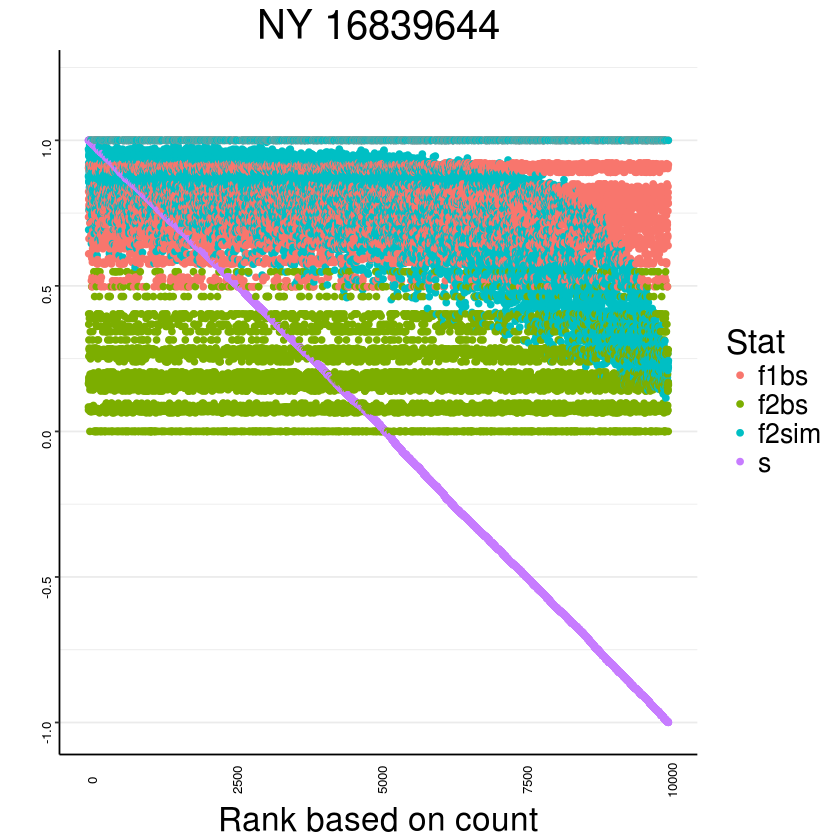

In [131]:
ggplot(NY_f2scount, aes(x=sim, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 16839644") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Rank based on count")+
    ylab("")+
    ylim(-1,1.2)+
   # xlim(0,1000)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

Warning message:
“Removed 3 rows containing missing values (geom_point).”

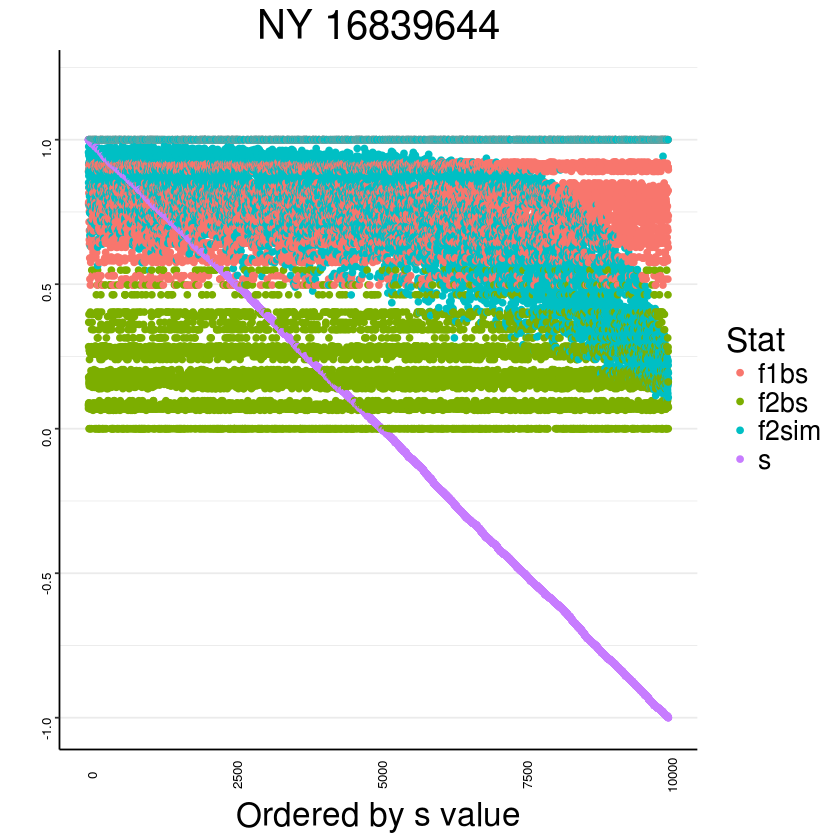

In [136]:
ggplot(NY_f2scount, aes(x=sim, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 16839644") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Ordered by s value")+
    ylab("")+
    ylim(-1,1.2)+
   # xlim(0,1000)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )

In [68]:
class(probs)

[1] "data.frame"

In [132]:
#sNY=lapply(probs, function(x){sample(x$sim, 1000, replace = FALSE, prob = x$count)})
sNY=sample(probs$sim, 1000, replace=FALSE, prob=probs$count)

In [133]:
head(NY_f2scount)

SNP      count diff         sim Stat  value       
1 16839644 0     1.683964e+07 1   f1bs  1.683964e+07
2 16839644 0     1.683964e+07 1   f2sim 1.683964e+07
3 16839644 0     1.683964e+07 1   s     1.683964e+07
4 16839644 0     1.683964e+07 1   f2bs  8.386300e-02
5 16839644 0     7.687716e-01 2   f1bs  9.051290e-01
6 16839644 0     7.687716e-01 2   f2sim 9.695946e-01

In [134]:
NY_f2scount_top=NY_f2scount[NY_f2scount$sim %in% sNY,]

In [135]:
head(NY_f2scount_top)

SNP      count diff      sim  Stat  value    
1 16839644 1     0.4039067  149 f1bs  0.5753790
2 16839644 1     0.4039067  149 f2sim 0.6047297
3 16839644 1     0.4039067  149 s     0.9730357
4 16839644 1     0.4039067  149 f2bs  0.0791790
5 16839644 3     0.3430959 2588 f1bs  0.4968800
6 16839644 3     0.3430959 2588 f2sim 0.5439189

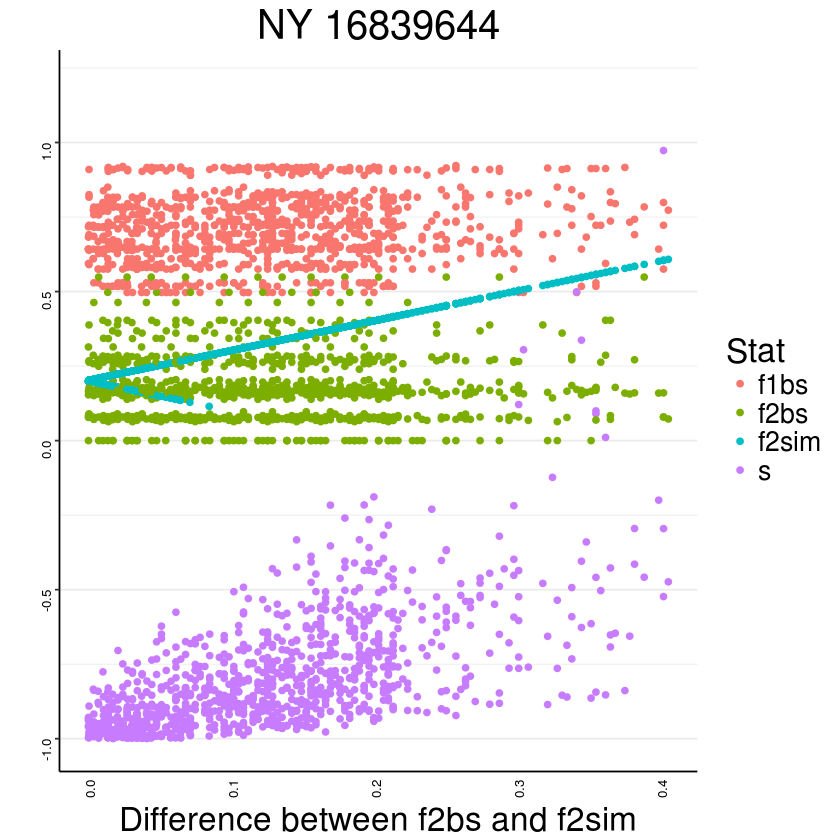

In [137]:
ggplot(NY_f2scount_top, aes(x=diff, y=(value))) +
    geom_point(aes(color=Stat)) +
    ggtitle("NY 16839644") +
    #scale_color_manual(values=c("cornflowerblue", "darkorange"))+
    theme_bw() +
    xlab("Difference between f2bs and f2sim")+
    ylab("")+
    ylim(-1,1.2)+
   # xlim(0,1000)+
    theme(legend.position="right", panel.border = element_blank(), 
          plot.title = element_text(hjust = 0.5),
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=8, angle=90),
          text = element_text(size=20)
    )